<a target="_blank" href="https://colab.research.google.com/github/mrdbourke/zero-to-mastery-ml/blob/master/section-4-unstructured-data-projects/end-to-end-dog-vision-v2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Dog Vision 🐕👁️ | Clasificador de Razas de Perros

## Introducción

**Dog Vision** es un proyecto de visión por computadora diseñado para clasificar imágenes de perros en diferentes razas. Utiliza **aprendizaje profundo** (deep learning) y **aprendizaje por transferencia** (transfer learning) con TensorFlow/Keras. Este proyecto tiene como objetivo construir una red neuronal capaz de identificar 120 razas de perros distintas y, al mismo tiempo, mejorar la precisión lograda en investigaciones anteriores (22% de precisión media).

## Objetivos del proyecto

- Aprender los fundamentos de TensorFlow, deep learning y transfer learning.
- Superar el rendimiento del artículo de investigación original (22% de precisión media en la clasificación de razas de perros).
- Construir un proyecto completo para el portafolio, aplicando buenas prácticas de machine learning y diseño de flujos de trabajo.

## Detalles del proyecto

**Dominio:** Visión por computadora.

**Datos:** [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) (120 razas, más de 20,000 imágenes).

**Tipo de problema:** Clasificación multiclase (120 clases diferentes).

**Ejecución:** El proyecto está diseñado para ejecutarse de principio a fin en [Google Colab](https://colab.research.google.com/), aprovechando el acceso gratuito a GPUs para acelerar el entrenamiento. También puede ejecutarse localmente, aunque esto requiere una configuración adicional.

## Metodología: El flujo de trabajo en 6 pasos

En este proyecto, seguiremos un flujo de trabajo estándar para machine learning, adaptado a tareas de visión por computadora con deep learning. Cada paso está documentado cuidadosamente para brindar claridad y estructura:

### 1. Definición del problema
El problema es **clasificar imágenes de perros según su raza.** Esto implica construir un modelo capaz de identificar correctamente una de las 120 razas de perros en el dataset.

### 2. Datos
Trabajaremos con el [conjunto de datos Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/), que contiene **más de 20,000 imágenes de perros divididas en 120 razas**. Este dataset es un subconjunto del famoso conjunto de datos ImageNet, utilizado frecuentemente como estándar en visión por computadora.

### 3. Evaluación
El objetivo es superar la precisión media reportada en el artículo original (22%). Esto servirá como punto de referencia para medir nuestro progreso.

> **Tip práctico:** Intenta buscar resultados de otros investigadores o proyectos similares y establece un objetivo para superarlos. Esto te ayudará a evaluar la efectividad de tu modelo y a practicar la mejora iterativa.

### 4. Características
Utilizando aprendizaje profundo, no será necesario diseñar manualmente características específicas (como bordes o texturas). En su lugar, las redes neuronales aprenderán automáticamente las características relevantes del conjunto de datos.

### 5. Modelado
El modelo principal será una **red neuronal convolucional (CNN) preentrenada, ajustada a través de aprendizaje por transferencia**. Esto nos permitirá aprovechar el conocimiento adquirido en conjuntos de datos grandes (como ImageNet) y aplicarlo a nuestro problema.

### 6. Experimentos
Probaremos diferentes configuraciones, como:

- Entrenar un modelo con solo el 10% de los datos para obtener una línea base.
- Entrenar el modelo con el 100% de los datos para maximizar su rendimiento.
- Comparar los tiempos de entrenamiento y precisión con y sin GPU.

In [ ]:
# Quick timestamp
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2025-01-24 09:19:39.833456


## 1. Preparación del entorno (Google Colab)

Google Colab es una plataforma basada en la nube que ofrece GPUs gratuitas para acelerar el entrenamiento de modelos de aprendizaje profundo. Este proyecto está diseñado para ejecutarse en [Google Colab](https://colab.research.google.com/), pero también puede adaptarse para ejecutarse localmente.

### Por qué usar una GPU

El entrenamiento de redes neuronales involucra una gran cantidad de cálculos matemáticos, principalmente multiplicaciones de matrices. Una GPU (Graphics Processing Unit) es mucho más eficiente que una CPU para realizar estas operaciones, lo que acelera considerablemente el tiempo de entrenamiento.

> **Nota**: Aunque este proyecto puede completarse sin GPU, usar una aceleración por hardware reducirá significativamente los tiempos de entrenamiento. Puedes experimentar ejecutando los modelos con y sin GPU para observar la diferencia.

### Configuración inicial

1. Abrir Google Colab y crear un nuevo notebook
2. Habilitar el uso de GPU: Ve a `Entorno de ejecución > Cambiar tipo de entorno de ejecución > Acelerador de hardware > GPU`. Esto reiniciará el entorno de ejecución y habilitará la aceleración por GPU.
3. Verifica que TensorFlow tenga acceso a la GPU. Si la GPU está habilitada correctamente, veremos algo como `GPU:0` en la salida.


> **Nota:** Si quieres ejecutar TensorFlow localmente, puedes seguir la [guía de instalación de TensorFlow](https://www.tensorflow.org/install?hl=es)

### Primeros pasos: Importación de bibliotecas

Para empezar, importaremos las bibliotecas principales que utilizaremos en el proyecto.

> **Nota:** TensorFlow y Keras vienen preinstalados en Google Colab, lo que simplifica mucho el proceso de configuración.

In [ ]:
import tensorflow as tf
print(f"Versión de TensorFlow: {tf.__version__}")

Versión de TensorFlow: 2.17.1


In [ ]:
# Importar otras bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Verificar si TensorFlow tiene acceso a una GPU
device_list = tf.config.list_physical_devices()
if "GPU" in [device.device_type for device in device_list]:
  print(f"[INFO] TensorFlow tiene GPU disponible para usar.")
  print(f"[INFO] Dispositivos accesibles:\n{device_list}")
else:
  print(f"[INFO] TensorFlow no tiene GPU disponible para usar. Los modelos pueden tardar un poco en entrenarse.")
  print(f"[INFO] Dispositivos accesibles:\n{device_list}")

[INFO] TensorFlow tiene GPU disponible para usar.
[INFO] Dispositivos accesibles:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## ¿Qué vamos a construir?

El objetivo es construir **Dog Vision**, una red neuronal que clasifique imágenes de perros según su raza. El **flujo de trabajo** incluye:

1. Preparación del dataset: Cargar y explorar los datos (análisis exploratorio).
2. Preprocesamiento de datos: Dividir el dataset en conjuntos de entrenamiento y prueba, y transformar las imágenes en tensores.
3. Modelado inicial:
  - Crear un modelo base con el 10% de los datos.
  - Entrenar y evaluar el modelo.
4. Aprendizaje por transferencia:
  - Usar una red CNN preentrenada (como EfficientNet o ResNet).
  - Ajustar el modelo para mejorar los resultados.
5. Evaluación final:
  - Medir la precisión en el conjunto de prueba.
  - Visualizar métricas y resultados.
6. Predicciones personalizadas:
  - El modelo para clasificar imágenes nuevas y personalizadas.

## 2. Obtención de datos

Para este proyecto, utilizaremos el conjunto de datos Stanford Dogs Dataset (también conocido como ImageNet Dogs), que consiste en imágenes de perros organizadas en 120 razas diferentes. Este dataset es un subconjunto de ImageNet y es ideal para practicar la categorización fina de imágenes.

**Opciones para obtener el dataset:**
* [Sitio web original del proyecto](http://vision.stanford.edu/aditya86/ImageNetDogs/): Disponible para descarga directa.
* TensorFlow Datasets: Disponible bajo el nombre [`stanford_dogs`](https://www.tensorflow.org/datasets/catalog/stanford_dogs).
* Kaggle: Disponible como un [conjunto de datos descargable](https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset).

Para practicar el formateo y la preparación de un dataset para un problema de aprendizaje profundo, **descargaremos el Stanford Dogs Dataset desde su sitio web original.**

El dataset incluye los siguientes archivos principales:

- [Imágenes](https://www.google.com/url?q=http%3A%2F%2Fvision.stanford.edu%2Faditya86%2FImageNetDogs%2Fimages.tar): Archivo comprimido `images.tar` (757 MB) que contiene las imágenes.
- [Anotaciones](https://www.google.com/url?q=http%3A%2F%2Fvision.stanford.edu%2Faditya86%2FImageNetDogs%2Fannotation.tar): Archivo comprimido `annotation.tar` (21 MB) con las anotaciones de cada imagen.
- [Listas de divisiones](https://www.google.com/url?q=http%3A%2F%2Fvision.stanford.edu%2Faditya86%2FImageNetDogs%2Flists.tar): Archivo comprimido `lists.tar` (0.5 MB) que contiene las listas de imágenes para los conjuntos de entrenamiento y prueba.

Tendremos una estructura de archivos como esta:
```
data/
├── images.tar          # Imágenes de los perros
├── annotation.tar      # Anotaciones de las imágenes
└── lists.tar           # Divisiones de entrenamiento y prueba
```

💡 Recuerda que **los datos cargados en la sesión se eliminan si la conexión se interrumpe**. Para evitar descargar los datos cada vez que se reinicia la sesión, seguiremos estos pasos:

- Descargar los datos una vez desde el sitio web original.
- Guardar los datos en Google Drive, ya que Google Colab se integra fácilmente con este servicio.
- Verificar si los datos ya existen en Google Drive. Si están disponibles, los importaremos directamente a la sesión de Colab.
- Si los datos no existen en Google Drive, los descargaremos desde el sitio web original y los copiaremos a Google Drive para uso futuro.

### Conexión de Google Colab con Google Drive

Existen dos opciones principales para conectar Google Colab con Google Drive:
1. Hacer clic en **"Mount Drive"** desde el menú **"Files"** en la lado izquierdo de Colab.
2. Montar programáticamente Google Drive con el siguiente código:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Descargue el conjunto de datos en divisiones de entrenamiento y prueba utilizando TensorFlow Datasets
# import tensorflow_datasets as tfds
# ds_train, ds_test = tfds.load('stanford_dogs', split=['train', 'test'])

In [ ]:
from pathlib import Path
from google.colab import drive

# 1. Montar Google Drive (esto abrirá una ventana emergente para iniciar sesión/autenticarse)
# Nota: Este paso es específicamente para Google Colab, si estás trabajando localmente, puede que necesites una configuración diferente.
drive.mount("/content/drive")

# 2. Configurar constantes
TARGET_DRIVE_PATH = Path("drive/MyDrive/tensorflow/dog_vision_data")
TARGET_FILES = ["images.tar", "annotation.tar", "lists.tar"]
TARGET_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs"

# 3. Configurar ruta local de destino para guardar
local_dir = Path("dog_vision_data")

# 4. Verificar si los archivos de destino existen en Google Drive. Si existen, copy them to Google Colab
if all((TARGET_DRIVE_PATH / file).is_file() for file in TARGET_FILES):
  print(f"[INFO] Copiando los archivos de Dog Vision desde Google Drive al directorio local...")
  print(f"[INFO] SCarpeta de origen: {TARGET_DRIVE_PATH} -> Carpeta de destino: {local_dir}")
  !cp -r {TARGET_DRIVE_PATH} .
  print("[INFO] ¡Todo listo para continuar!")

else:
  # 5. Si no existen en Google Drive, descargarlos desde la URL de destino
  print(f"[INFO] Archivos de destino no encontrados en Google Drive.")
  print(f"[INFO] Descargando los archivos de destino... esto no debería tomar mucho tiempo...")
  for file in TARGET_FILES:
    # wget es la abreviatura de "world wide web get", que significa "obtener un archivo de la web"
    # -nc o --no-clobber = no descargar archivos que ya existen localmente
    # -P = guardar el archivo en un directorio especificado, en nuestro caso, local_dir
    !wget -nc {TARGET_URL}/{file} -P {local_dir} # the "!" means to execute the command on the command line rather than in Python

  print(f"[INFO] Guardando los archivos de destino en Google Drive, para que puedan ser cargados más tarde...")

  # 6. Asegurarse de que el directorio de destino en Google Drive exista
  TARGET_DRIVE_PATH.mkdir(parents=True, exist_ok=True)

  # 7. Copiar los archivos descargados a Google Drive (para usarlos más tarde y no tener que volver a descargarlos)
  !cp -r {local_dir}/* {TARGET_DRIVE_PATH}/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Copiando los archivos de Dog Vision desde Google Drive al directorio local...
[INFO] SCarpeta de origen: drive/MyDrive/tensorflow/dog_vision_data -> Carpeta de destino: dog_vision_data
[INFO] ¡Todo listo para continuar!


¡Datos descargados!

Esto puede parecer un poco laborioso, pero es un paso importante en cualquier proyecto de deep learning: obtener los datos con los que trabajar.

Ahora, queremos inspeccionar el contenido de `local_dir` (es decir, `dog_vision_data`).

Primero, podemos asegurarnos de que existe con el método [`Path.exists()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.exists) y luego iterar a través de su contenido con [`Path.iterdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.iterdir) para imprimir el atributo [`.name`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.name) de cada archivo.

In [ ]:
if local_dir.exists():
  print(str(local_dir) + "/")
  for item in local_dir.iterdir():
    print("  ", item.name)

dog_vision_data/
   lists.tar
   annotation.tar
   images.tar


Una vez que los datos se han descargado correctamente en el directorio `local_dir` (carpeta `dog_vision_data`), el siguiente paso es descomprimir los archivos `.tar` que contienen las imágenes, anotaciones y divisiones de entrenamiento/prueba.

### ¿Qué es un archivo .tar?

Un [archivo `.tar`](https://es.wikipedia.org/wiki/Tar) es un formato de archivo que agrupa múltiples archivos en un solo archivo de archivo, conocido como "tarball". **A diferencia de formatos como .zip, .tar no comprime los datos**, sino que simplemente combina los archivos en uno solo, facilitando su distribución o respaldo.

### Descrompresión de archivos `.tar`

Para descomprimir los archivos `images.tar`, `annotation.tar` y `lists.tar`, usaremos el comando `tar` (o [`!tar`](https://www.gnu.org/software/tar/manual/tar.html)) dentro de Google Colab. Este comando expande el contenido de cada archivo `.tar` en el directorio especificado.

**Flags utilizadas en el comando tar:**
- `-x`: indica a `tar` que debe extraer los archivos de entrada.
- `-f`: especifica que el siguiente argumento es el nombre del archivo `.tar`a procesar.

> Es posible combinar ambas banderas como `-xf` para simplificar el comando.

- `-xf`: extrae los archivos del archivo `.tar`.
- `-C dog_vision_data/`: expande el contenido dentro del directorio `dog_vision_data/`.

In [ ]:
# Untar images, notes/tags:
# -x = extract files from the zipped file
# -v = verbose
# -z = decompress files
# -f = tell tar which file to deal with
!tar -xf dog_vision_data/images.tar
!tar -xf dog_vision_data/annotation.tar
!tar -xf dog_vision_data/lists.tar

### ¿Qué archivos obtuvimos?

Podemos verificar en Google Colab inspeccionando la pestaña **"Files"** en el lado izquierdo.

O, usando Python, podemos inspeccionar el directorio con [`os.listdir(".")`](https://docs.python.org/3/library/os.html#os.listdir), donde `"."` significa "el directorio actual".

In [ ]:
import os

os.listdir(".") # "." significa "aquí" o "directorio actual"

['.config',
 'images_split',
 'dog_vision_data',
 'train_list.mat',
 'drive',
 'test_list.mat',
 'Images',
 'file_list.mat',
 'Annotation',
 'sample_data']

Archivos descomprimidos:

* `train_list.mat` - a list of all the training set images.
* `test_list.mat` - a list of all the testing set images.
* `Images/` - a folder containing all of the images of dogs.
* `Annotation/` - a folder containing all of the annotations for each image.
* `file_list.mat` - a list of all the files (training and test list combined).

Our next step is to go through them and see what we've got.

## 3. Exploración de los Datos

La exploración de datos es un paso crucial en cualquier proyecto de machine learning o deep learning. Antes de construir un modelo, es importante analizar y entender el conjunto de datos con el que trabajamos. Este paso ayuda a identificar posibles problemas, comprender las distribuciones y familiarizarse con las características del dataset.

### Pasos clave para explorar un conjunto de datos

1. **Revisar al menos 100 muestras aleatorias para obtener una "impresión general"**
2. **Visualizar, visualizar, visualizar**: La visualización es clave para la exploración de datos. Aunque es útil calcular estadísticas, ver los datos directamente puede revelar patrones o problemas que los números no muestran.
3. **Analizar distribuciones y estadísticas**: Evaluar métricas clave del dataset, como:
  - **Cantidad de muestras:** ¿Cuántas imágenes/textos/audios hay en total?
  - **Número de clases:** En un problema de clasificación, ¿cuántas clases existen? ¿Hay clases desbalanceadas?
  - **Tamaño y resolución de las imágenes:** ¿Son consistentes o hay variaciones significativas?
  - **Distribución de etiquetas por clase:** Identificar si algunas clases tienen muchas más muestras que otras. Las clases desbalanceadas pueden requerir técnicas como sobremuestreo, submuestreo o ajustes en las métricas de evaluación.

### Formato objetivo de los datos

Un formato común para problemas de clasificación es organizar los datos en carpetas, donde:
- Cada carpeta representa una clase.
- Las imágenes correspondientes a cada clase se almacenan dentro de su carpeta.

De esta forma tenemos una estructura clara que asocia cada muestra con su clase correspondiente.

**Ejemplo de formato de carpetas:**
```
dog_vision_data/
├── Golden_Retriever/
│   ├── img1.jpg
│   ├── img2.jpg
│   └── ...
├── Beagle/
│   ├── img1.jpg
│   ├── img2.jpg
│   └── ...
```

### Archivos de listas (`.mat`)

El dataset que utilizaremos incluye archivos `.mat` como `train_list.mat`, `test_list.mat` y `full_list.mat`. Estos archivos contienen información sobre las divisiones de los datos (entrenamiento y prueba) y la organización del conjunto de datos.

#### ¿Qué es un archivo `.mat`?

Un [archivo `.mat`](https://www.mathworks.com/help/matlab/import_export/mat-file-versions.html) es un formato utilizado por MATLAB para almacenar datos. Antes de que Python se popularizara en el ámbito de machine learning y deep learning, [MATLAB](https://www.mathworks.com/products/matlab.html) era ampliamente utilizado para construir modelos y gestionar datasets.

#### Abrir archivos `.mat` en Python
Aunque los archivos `.mat` son nativos de MATLAB, pueden abrirse fácilmente en Python utilizando la biblioteca `scipy`, que ya está preinstalada en Google Colab.

Podemos usar el **método `.loadmat()`para cargar archivos `.mat`** y `.keys()`para ver las claves disponibles en el archivo `.mat`.

In [ ]:
import scipy

# Abrir listas de entrenamiento y prueba .mat
train_list = scipy.io.loadmat("train_list.mat")
test_list = scipy.io.loadmat("test_list.mat")
file_list = scipy.io.loadmat("file_list.mat")

# Inspeccionar la salida y el tipo de train_list
train_list, type(train_list)

({'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct  9 08:36:13 2011',
  '__version__': '1.0',
  '__globals__': [],
  'file_list': array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
         [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
         [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
         ...,
         [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
         [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
         [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
        dtype=object),
  'annotation_list': array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
         [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
         [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
         ...,
         [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype=

Parece que obtenemos un diccionario con varios campos que podrían interesarnos.

Inspeccionar las claves del diccionario:

In [ ]:
train_list.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

Suponemos es que la clave `file_list` es lo que buscamos, ya que parece ser un gran array con los nombres de las imágenes (todos los archivos terminan en `.jpg`).

In [ ]:
# Verificar la longitud de la clave file_list
print(f"Número de archivos en la lista de entrenamiento: {len(train_list['file_list'])}")
print(f"Número de archivos en la lista de prueba: {len(test_list['file_list'])}")
print(f"Número de archivos en la lista completa: {len(file_list['file_list'])}")

Número de archivos en la lista de entrenamiento: 12000
Número de archivos en la lista de prueba: 8580
Número de archivos en la lista completa: 20580


¡Perfecto! Parece que estas listas contienen nuestras divisiones de entrenamiento, prueba, y la lista completa tiene todos los archivos del dataset.

Inspeccionemos el contenido de `train_list['file_list']`:

In [ ]:
train_list['file_list']

array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object)

Parece que tenemos un array de arrays.

#### Convertir los arrays a una lista de Python para facilitar su manejo

Podemos hacer esto extrayendo cada elemento individual a través de indexación y comprensión de listas.

In [ ]:
# Obtener un solo nombre de archivo
train_list['file_list'][0][0][0]

'n02085620-Chihuahua/n02085620_5927.jpg'

#### Obtener una lista de Python con todos los nombres de archivos:

In [ ]:
# Crear listas de Python con los nombres de los archivos
train_file_list = list([item[0][0] for item in train_list["file_list"]])
test_file_list = list([item[0][0] for item in test_list["file_list"]])
full_file_list = list([item[0][0] for item in file_list["file_list"]])

len(train_file_list), len(test_file_list), len(full_file_list)

(12000, 8580, 20580)

¡Genial!

¿Qué tal si vemos una muestra aleatoria de los nombres de archivo que extrajimos?

> **Nota:** Es útil inspeccionar muestras aleatorias (ya sean nombres de archivo, imágenes o fragmentos de texto.) para tener una idea del contenido del dataset y posibles errores.

Podemos ver muestras aleatorias de los datos usando el método [`random.sample()`](https://docs.python.org/3/library/random.html#random.sample) de Python.

In [ ]:
import random

random.sample(train_file_list, k=10)

['n02112350-keeshond/n02112350_8390.jpg',
 'n02085620-Chihuahua/n02085620_3651.jpg',
 'n02086079-Pekinese/n02086079_3174.jpg',
 'n02099429-curly-coated_retriever/n02099429_2186.jpg',
 'n02093754-Border_terrier/n02093754_7117.jpg',
 'n02093428-American_Staffordshire_terrier/n02093428_111.jpg',
 'n02099267-flat-coated_retriever/n02099267_721.jpg',
 'n02085936-Maltese_dog/n02085936_8756.jpg',
 'n02085782-Japanese_spaniel/n02085782_2255.jpg',
 'n02101006-Gordon_setter/n02101006_1506.jpg']

#### Verificar que no haya superposición entre los conjuntos de entrenamiento y prueba
Es fundamental asegurarse de que los archivos en el conjunto de entrenamiento no estén en el conjunto de prueba, ya que la regla número uno en machine learning es **mantener separados los datos de entrenamiento y prueba**.

Podemos verificar que no haya superposiciones convirtiendo train_file_list en un conjunto de Python [`set()`](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset) y usando el método [`intersection()`](https://docs.python.org/3/library/stdtypes.html#frozenset.intersection).

**Verificar superposición:**

In [ ]:
# ¿Cuántos archivos del conjunto de entrenamiento están también en el conjunto de prueba?
len(set(train_file_list).intersection(test_file_list))

0

¡Genial! No hay superposición.

#### Agregar una validación adicional con [`assert`](https://docs.python.org/3/reference/simple_stmts.html#the-assert-statement)

Podemos agregar una verificación con `assert` para asegurarnos de que no haya superposición. Si hay algún problema, el código levantará un error (por ejemplo, la longitud de la intersección es mayor que 0).

`assert` funciona de la siguiente manera: `assert expresión, mensaje_si_expresión_falla`.

Si el `assert` no genera ninguna salida, significa que los conjuntos están correctamente separados.

In [ ]:
# Asegurarse de que no haya superposición
assert len(set(train_file_list).intersection(test_file_list)) == 0, "Hay superposición entre los conjuntos de entrenamiento y prueba, por favor revisa los datos."

### Explorando la carpeta de Anotaciones

¿Qué tal si exploramos la carpeta `Annotation` a continuación?

Podemos hacer clic en la carpeta en el explorador de archivos a la izquierda para ver su contenido. Pero también podemos explorar el contenido de la carpeta con Python.

**Usar [`os.listdir()`](https://docs.python.org/3/library/os.html#os.listdir) para inspeccionar la carpeta:**

In [ ]:
os.listdir("Annotation")[:10]

['n02092339-Weimaraner',
 'n02100236-German_short-haired_pointer',
 'n02112018-Pomeranian',
 'n02105162-malinois',
 'n02097047-miniature_schnauzer',
 'n02113186-Cardigan',
 'n02096437-Dandie_Dinmont',
 'n02091244-Ibizan_hound',
 'n02111129-Leonberg',
 'n02096177-cairn']

Parece que hay archivos, cada uno con el nombre de una raza de perro, con varios archivos numerados dentro.

Cada uno de los archivos contiene una versión HTML de una anotación relacionada con una imagen.

Por ejemplo, `Annotation/n02085620-Chihuahua/n02085620_10074`:

```html
<annotation>
	<folder>02085620</folder>
	<filename>n02085620_10074</filename>
	<source>
		<database>ImageNet database</database>
	</source>
	<size>
		<width>333</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segment>0</segment>
	<object>
		<name>Chihuahua</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>25</xmin>
			<ymin>10</ymin>
			<xmax>276</xmax>
			<ymax>498</ymax>
		</bndbox>
	</object>
</annotation>
```

Los campos incluyen el nombre de la imagen, el tamaño de la imagen, la etiqueta del objeto y su ubicación (coordenadas del cuadro delimitador).

Si estuviéramos realizando [detección de objetos](https://en.wikipedia.org/wiki/Object_detection) (encontrar la ubicación de algo en una imagen), prestaríamos atención a las coordenadas `<bndbox>`.

Sin embargo, como estamos enfocados en la clasificación, nuestra principal consideración es el mapeo del nombre de la imagen al nombre de la clase.

Dado que estamos tratando con 120 clases de razas de perros, escribamos una función para verificar el número de subcarpetas en el directorio `Annotation`(debería haber 120 subcarpetas, una para cada raza de perro).

Para hacerlo, podemos utilizar la clase [`pathlib.Path`](https://docs.python.org/3/library/pathlib.html#basic-use) de Python, junto con [`Path.iterdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.iterdir) para recorrer el contenido de `Annotation` y [`Path.is_dir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.is_dir) para verificar si el elemento objetivo es un directorio.

In [ ]:
from pathlib import Path

def count_subfolders(directory_path: str) -> int:
    """
    Cuenta el número de subcarpetas en un directorio dado.

    Args:
    directory_path (str): La ruta al directorio en el que contar las subcarpetas.

    Returns:
    int: El número de subcarpetas en el directorio especificado.

    Ejemplos:
    >>> count_subfolders('/path/to/directory')
    3  # si hay 3 subcarpetas en el directorio especificado
    """
    return len([name for name in Path(directory_path).iterdir() if name.is_dir()])


directory_path = "Annotation"
folder_count = count_subfolders(directory_path)
print(f"Número de subcarpetas en el directorio {directory_path}: {folder_count}")

Número de subcarpetas en el directorio Annotation: 120


¡Perfecto!

Hay 120 subcarpetas de anotaciones, una para cada clase de perro que deseamos identificar.

Sin embargo, al inspeccionar más a fondo nuestras listas de archivos, parece que el nombre de la clase ya está incluido en la ruta de archivo.

In [ ]:
# Ver una única ruta de acceso al archivo de entrenamiento
train_file_list[2]

'n02085620-Chihuahua/n02085620_1502.jpg'

Con esta información sabemos que la imagen `n02085620_1502.jpg` debe contener un `Chihuahua`. Vamos a probar.

#### Cómo mostrar una imagen en Google Colab
Podemos usar [`IPython.display.Image()`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image), ya que Google Colab viene con IPython (Interactive Python) integrado.

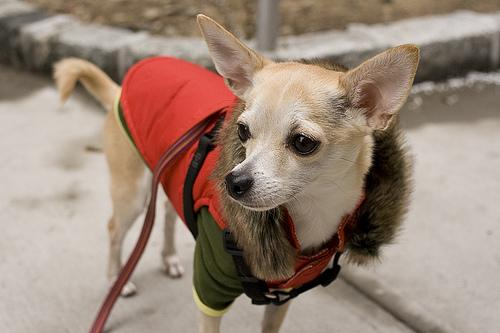

In [ ]:
from IPython.display import Image
Image(Path("Images", train_file_list[2]))

### Explorando la carpeta `Images`

Hemos explorado la carpeta Anotaciones, ahora revisemos nuestra carpeta `Images`.

Sabemos que los nombres de archivo de imagen tienen el formato `nombre_clase/nombre_imagen`, por ejemplo, `n02085620-Chihuahua/n02085620_5927.jpg`.

Para simplificar las cosas, vamos a crear lo siguiente:

1. Un mapeo de nombre de carpeta -> nombre de clase en forma de diccionario, por ejemplo, `{'n02113712-miniature_poodle': 'miniature_poodle',
'n02092339-Weimaraner': 'weimaraner',
'n02093991-Irish_terrier': 'irish_terrier'...}`. Esto nos ayudará cuando visualicemos nuestros datos desde su carpeta original.
2. Una lista de todos los nombres de clase de perro únicos con formato simple, por ejemplo, `['affenpinscher',
'afghan_hound',
'african_hunting_dog',
'airedale',
'american_staffordshire_terrier'...]`.

Comencemos obteniendo una lista de todas las carpetas en el directorio `Images` con `os.listdir()`.

In [ ]:
# Obtener una lista de todas las carpetas de imágenes
image_folders = os.listdir("Images")
image_folders[:10]

['n02092339-Weimaraner',
 'n02100236-German_short-haired_pointer',
 'n02112018-Pomeranian',
 'n02105162-malinois',
 'n02097047-miniature_schnauzer',
 'n02113186-Cardigan',
 'n02096437-Dandie_Dinmont',
 'n02091244-Ibizan_hound',
 'n02111129-Leonberg',
 'n02096177-cairn']

In [ ]:
# Imprimir el número de carpetas en `image_folders`
print(f"Número de carpetas en Images: {len(image_folders)}")

Número de carpetas en Images: 120


Genial!

Ahora hagamos un diccionario que asigne el nombre de la carpeta a una versión simplificada del nombre de la clase, por ejemplo:

```
{'n02085782-Japanese_spaniel': 'japanese_spaniel',
'n02106662-German_shepherd': 'german_shepherd',
'n02093256-Staffordshire_bullterrier': 'staffordshire_bullterrier',
...}
```


In [ ]:
# Crear folder name -> class name dict
folder_to_class_name_dict = {}
for folder_name in image_folders:
  # Convertir el nombre de la carpeta en nombre_clase
  # Por ejemplo "n02089078-black-and-tan_coonhound" -> "black_and_tan_coonhound"
  # Dividiremos el primer "-" y uniremos el resto de la cadena con "_" y luego lo bajaremos
  class_name = "_".join(folder_name.split("-")[1:]).lower()
  folder_to_class_name_dict[folder_name] = class_name

# Asegurarse de que haya 120 entradas en el diccionario.
assert len(folder_to_class_name_dict) == 120

Se creó la asignación de nombre de carpeta a nombre de clase, veamos los primeros 10.

In [ ]:
list(folder_to_class_name_dict.items())[:10]

[('n02092339-Weimaraner', 'weimaraner'),
 ('n02100236-German_short-haired_pointer', 'german_short_haired_pointer'),
 ('n02112018-Pomeranian', 'pomeranian'),
 ('n02105162-malinois', 'malinois'),
 ('n02097047-miniature_schnauzer', 'miniature_schnauzer'),
 ('n02113186-Cardigan', 'cardigan'),
 ('n02096437-Dandie_Dinmont', 'dandie_dinmont'),
 ('n02091244-Ibizan_hound', 'ibizan_hound'),
 ('n02111129-Leonberg', 'leonberg'),
 ('n02096177-cairn', 'cairn')]

Podemos obtener una lista de nombres de perros únicos obteniendo los `values()` del `folder_to_class_name_dict` y convirtiéndolos en una lista:

In [ ]:
dog_names = sorted(list(folder_to_class_name_dict.values()))
dog_names[:10]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle']

¡Perfecto!

Ahora tenemos:

1. `folder_to_class_name_dict`  - una asignación del nombre de la carpeta al nombre de la clase.
2. `dog_names` - una lista de todas las razas de perros únicas con las que estamos trabajando.

### Visualiza un grupo de imágenes aleatorias

¿Qué tal si seguimos el lema de los exploradores de datos de visualizar, visualizar, visualizar y ver algunas imágenes aleatorias?

Para ayudarnos a visualizar, vamos a crear una función que tome una lista de rutas de imagen y luego seleccione aleatoriamente 10 de esas rutas para mostrar.

La función hará lo siguiente:
1. Coger una lista seleccionada de rutas de imagen.
2. Crear una cuadrícula de gráficos matplotlib (por ejemplo, 2x5 = 10 gráficos para trazar).
3. Mostrar aleatoriamente 10 rutas de imagen de la lista de rutas de imagen de entrada (usando `random.sample()`).
4. Recorrer los ejes aplanados a través de `axes.flat`, que es una referencia al atributo [`numpy.ndarray.flat`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flat.html).
5. Extraer la ruta de muestra de la lista de muestras.
6. Obtener el título de la muestra de la carpeta principal de la ruta usando [`Path.parent.stem`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.parent) y luego extraer el nombre formateado de la raza de perro indexando `folder_to_class_name_dict`.
7. Leer la imagen con [`plt.imread()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html) y la mostrar en el target `ax` con [`ax.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
8. Establecer el título del gráfico con el nombre de la carpeta principal con [`ax.set_title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html) y quitar las marcas de los ejes con [`ax.axis("off")`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axis.html) (esto crea gráficos bonitos).
9. Mostrar el gráfico con `plt.show()`.

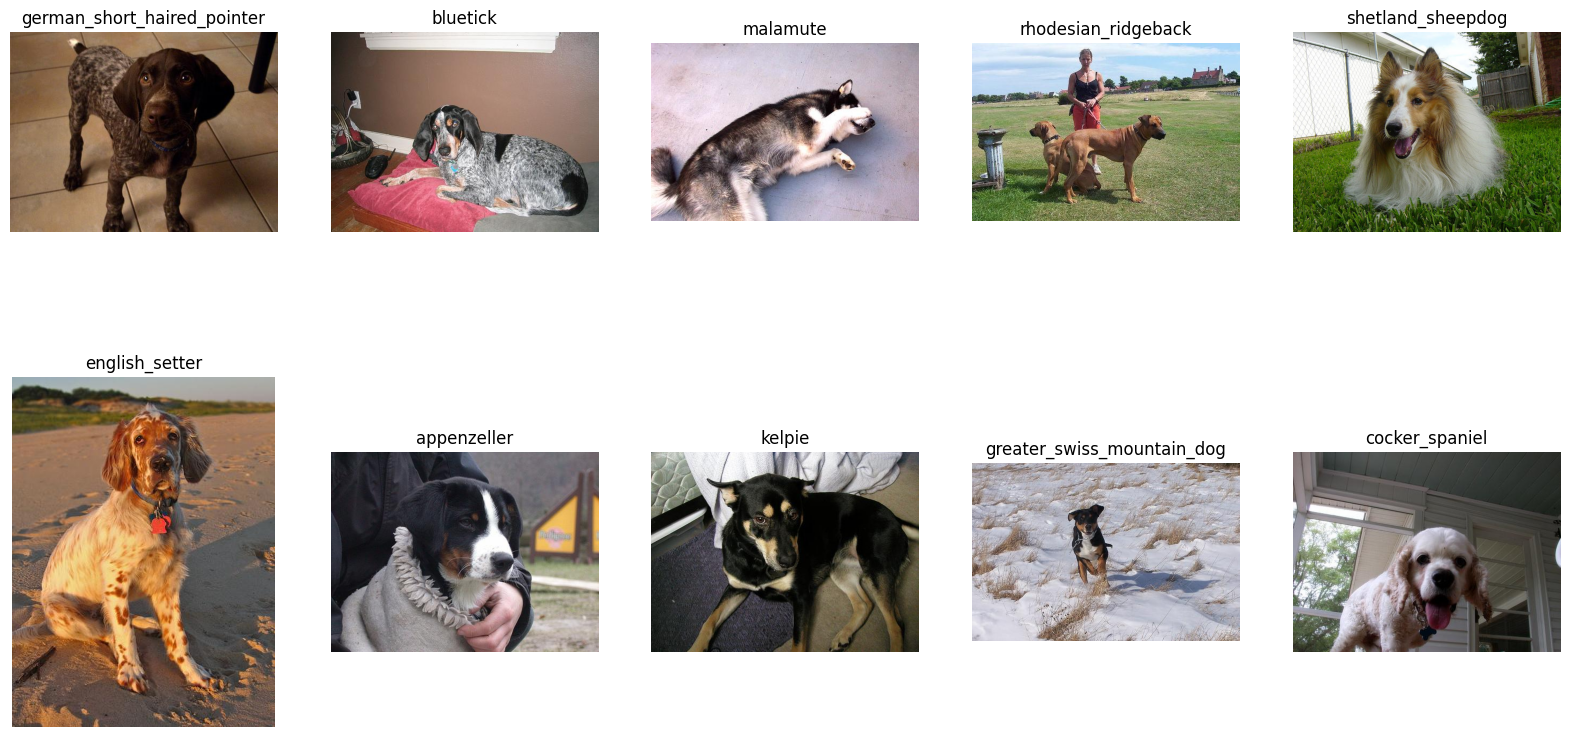

In [ ]:
import random

from pathlib import Path
from typing import List

import matplotlib.pyplot as plt

# 1. Coger una lista seleccionada de rutas de imagen.
def plot_10_random_images_from_path_list(path_list: List[Path],
                                         extract_title: bool=True) -> None:
  # 2. Crear una cuadrícula de gráficos
  fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

  # 3. Mostrar aleatoriamente 10 rutas de imagen
  samples = random.sample(path_list, 10)

  # 4. Iterar a través de los ejes aplanados y las rutas de muestra correspondientes
  for i, ax in enumerate(axes.flat):

    # 5. Obtener la ruta de muestra de destino (e.g. "Images/n02087394-Rhodesian_ridgeback/n02087394_1161.jpg")
    sample_path = samples[i]

    # 6. Extraer el nombre del directorio principal para usarlo como título (si es necesario)
    # (e.g. n02087394-Rhodesian_ridgeback/n02087394_1161.jpg -> n02087394-Rhodesian_ridgeback -> rhodesian_ridgeback)
    if extract_title:
      sample_title = folder_to_class_name_dict[sample_path.parent.stem]
    else:
      sample_title = sample_path.parent.stem

    # 7. Leer el archivo de imagen y trazarlo en el eje correspondiente.
    ax.imshow(plt.imread(sample_path))

    # 8. Establecer el título del eje y el giro del eje (para gráficos bonitos)
    ax.set_title(sample_title)
    ax.axis("off")

  # 9. Mostrar el gráfico
  plt.show()

plot_10_random_images_from_path_list(path_list=[Path("Images") / Path(file) for file in train_file_list])

En este punto podemos repetir las visualizaciones aleatorias hasta que hayamos visto más de 100 muestras. Esto nos puede ayudar a obtener una buena idea de los datos con los que estamos trabajando.

> **Pregunta:** ¿Cómo codificaríamos un sistema de reglas para diferenciar entre todas las razas de perros? Tal vez escribiríamos un algoritmo que analizara las formas o los colores. Por ejemplo, si un perro tiene pelaje negro, probablemente no sea un Golden Retriever. Podrías pensar: "Eso llevaría bastante tiempo...". Y tendrías razón. Entonces, ¿cómo lo haríamos?

¡Con machine learning, por supuesto!

### Explorando la distribución de los datos

Después de visualizar las muestras, otra forma valiosa de explorar los datos es verificando su **distribución**.

La distribución se refiere al "reparto" de los datos. En nuestro caso, ¿cuántas imágenes de perros tenemos por raza?

Una **distribución balanceada (equilibrada)** significaría tener aproximadamente el mismo número de imágenes para cada raza (por ejemplo, 100 imágenes por raza de perro).

#### Distribución ideal

Más allá de tener el mismo número de imágenes por raza, sería ideal que las imágenes de cada raza estén bien distribuidas. Por ejemplo:
- No queremos tener 100 copias de la misma imagen por raza.
- Queremos que las imágenes de cada raza representen escenarios diferentes, con iluminación distinta, ángulos variados, etc.  

Esto es importante porque queremos que nuestro modelo pueda reconocer la raza de un perro sin importar el ángulo o las condiciones de la foto.

#### Contando imágenes por clase

Para averiguar cuántas imágenes tenemos por clase, escribiremos una función que cuente el número de imágenes por subcarpeta en un directorio determinado.

Queremos que la función haga lo siguiente:
1. **Recibir un directorio/carpeta objetivo.**
2. **Crear una lista de todas las subcarpetas** en el directorio objetivo.
3. **Inicializar una lista vacía (`image_class_counts`)** para almacenar las subcarpetas y sus conteos.
4. **Iterar a través de todas las subcarpetas:**
  - Obtener el nombre de la clase de la carpeta.
  - Contar el número de imágenes en la carpeta usando la longitud de la lista de rutas de imágenes (usaremos [`Path().rglob("*.jpg")`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.rglob), donde `*.jpg` significa "todos los archivos con la extensión .jpg").
  - Agregar un diccionario al `image_class_counts` en el formato:
    ```python
    {"class_name": class_name, "image_count": image_count}
    ```
    (Creamos una lista de diccionarios para convertirla fácilmente en un DataFrame de pandas).
5. **Devolver la lista `image_class_counts`.**

In [ ]:
# Crear un diccionario de recuentos de imágenes
from pathlib import Path
from typing import List, Dict

# 1. Recibe como entrada la ruta de un directorio específico
def count_images_in_subdirs(target_directory: str) -> List[Dict[str, int]]:
    """
    Cuenta el número de imágenes JPEG en cada subdirectorio del directorio dado.

    Se supone que cada subdirectorio representa una clase, y la función cuenta
    el número de archivos '.jpg' dentro de cada uno. El resultado es una lista de
    diccionarios con el nombre de la clase y el conteo de imágenes correspondiente.

    Args:
        target_directory (str): La ruta al directorio que contiene subdirectorios.

    Returns:
        List[Dict[str, int]]: Una lista de diccionarios con 'class_name' y 'image_count' para cada subdirectorio.

    Examples:
        >>> count_images_in_subdirs('/path/to/directory')
        [{'class_name': 'beagle', 'image_count': 50}, {'class_name': 'poodle', 'image_count': 60}]
    """
    # 2. Cree una lista de todos los subdirectorios en el directorio de destino (estos contienen nuestras imágenes)
    images_dir = Path(target_directory)
    image_class_dirs = [directory for directory in images_dir.iterdir() if directory.is_dir()]

    # 3. Cree una lista vacía para agregar recuentos de imágenes
    image_class_counts = []

    # 4. Iterar a través de todos los subdirectorios.
    for image_class_dir in image_class_dirs:

        # 5. Obtener el nombre de la clase del directorio de imágenes (por ejemplo, "Images/n02116738-African_hunting_dog" -> "n02116738-African_hunting_dog")
        class_name = image_class_dir.stem

        # 6. Contar el número de imágenes en el subdirectorio de destino
        image_count = len(list(image_class_dir.rglob("*.jpg")))  # obtener la longitud de todos los archivos con extensión de archivo .jpg

        # 7. Agregar un diccionario de nombre de clase y recuento de imágenes a la lista de recuento
        image_class_counts.append({"class_name": class_name,
                                   "image_count": image_count})

    # 8. Devolver la lista
    return image_class_counts

Vamos a ejecutar la función en nuestro directorio de destino `Images` y ver los primeros índices:

In [ ]:
image_class_counts = count_images_in_subdirs("Images")
image_class_counts[:3]

[{'class_name': 'n02092339-Weimaraner', 'image_count': 160},
 {'class_name': 'n02100236-German_short-haired_pointer', 'image_count': 152},
 {'class_name': 'n02112018-Pomeranian', 'image_count': 219}]

Dado que nuestra variable `image_class_counts` tiene la forma de una lista de diccionarios, podemos convertirla en un `DataFrame` de pandas.

Ordenemos el DataFrame por `"image_count"` para que las clases con más imágenes aparezcan en la parte superior, podemos hacerlo con [`DataFrame.sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

In [ ]:
# Crear un DataFrame
import pandas as pd
image_counts_df = pd.DataFrame(image_class_counts).sort_values(by="image_count", ascending=False)
image_counts_df.head()

class_name  image_count
28         n02085936-Maltese_dog          252
82        n02088094-Afghan_hound          239
60  n02092002-Scottish_deerhound          232
2           n02112018-Pomeranian          219
59             n02111889-Samoyed          218

Y limpiemos la columna `"class_name"` para que sea más legible mapeando los valores a nuestro `folder_to_class_name_dict`.

In [ ]:
# Hacer que la columna class_name sea más fácil de leer
image_counts_df["class_name"] = image_counts_df["class_name"].map(folder_to_class_name_dict)
image_counts_df.head()

class_name  image_count
28         maltese_dog          252
82        afghan_hound          239
60  scottish_deerhound          232
2           pomeranian          219
59             samoyed          218

Ahora que tenemos un "DataFrame" de recuentos de imágenes por clase, podemos hacerlos más visuales convirtiéndolos en un gráfico.

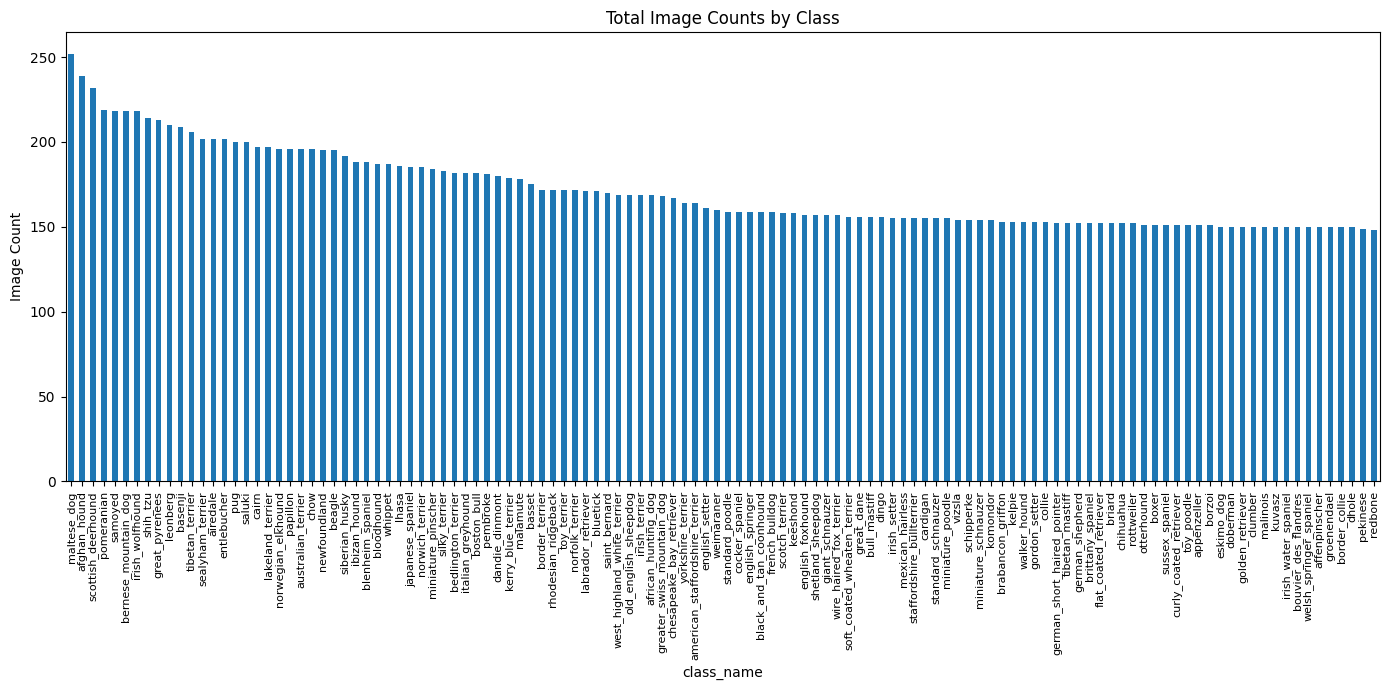

In [ ]:
# Convertir el DataFrame de recuento de imágenes en un gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
image_counts_df.plot(kind="bar",
                     x="class_name",
                     y="image_count",
                     legend=False,
                     ax=plt.gca()) # plt.gca() = "obtener el eje actual"

# Añadir personalización
plt.ylabel("Image Count")
plt.title("Total Image Counts by Class")
plt.xticks(rotation=90, # Rotar para mejor visualización
           fontsize=8)
plt.tight_layout()
plt.show()

¡Genial! Parece que nuestras clases son bastante equilibradas. Cada raza de perro tiene ~150 o más imágenes.

Podemos encontrar otras estadísticas rápidas sobre nuestros datos con [`DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html):

In [ ]:
image_counts_df.describe()

image_count
count   120.000000
mean    171.500000
std      23.220898
min     148.000000
25%     152.750000
50%     159.500000
75%     186.250000
max     252.000000

La tabla muestra una historia similar a la gráfica. Podemos ver que el número mínimo de imágenes por clase es 148, mientras que el número máximo de imágenes es 252.

Si una clase tuviera 10 veces menos imágenes que otra clase, podríamos considerar recopilar más datos para mejorar el equilibrio.

**Principales conclusiones:**

- Al trabajar en un problema de clasificación, idealmente, todas las clases tienen un número similar de muestras (sin embargo, en algunos problemas esto puede ser inalcanzable, como en la detección de fraudes, donde puede tener 1000 veces más muestras de "no fraude" que muestras de "fraude").
- Si quisieras agregar una nueva clase de raza de perro a las 120 existentes, idealmente tendrías al menos ~150 imágenes para ella (aunque como veremos con el aprendizaje por transferencia, la cantidad de imágenes requeridas podría ser menor siempre que sean de alta calidad).


### 4. Creación de directorios para los conjuntos de datos de entrenamiento y prueba

Después de explorar los datos, uno de los siguientes pasos más importantes es crear divisiones experimentales de los datos. Esto incluye organizar los datos en diferentes conjuntos:

| **Nombre del Conjunto**       | **Descripción**                                              | **Porcentaje típico de los datos** |
|-------------------------------|-------------------------------------------------------------|-------------------------------------|
| **Conjunto de Entrenamiento** | Un conjunto de datos para que el modelo aprenda.            | 70-80%                             |
| **Conjunto de Prueba**        | Un conjunto de datos para evaluar el modelo.                | 20-30%                             |
| **(Opcional) Conjunto de Validación** | Un conjunto de datos para ajustar el modelo.                   | 50% del conjunto de prueba          |
| **(Opcional) Conjunto de Entrenamiento Reducido** | Un subconjunto más pequeño del conjunto de entrenamiento para realizar experimentos rápidos. | 5-20% del conjunto de entrenamiento |

El conjunto de datos de perros **ya viene con divisiones especificadas** para entrenamiento y prueba. Por lo tanto, utilizaremos esas divisiones.

Además, crearemos un conjunto de entrenamiento más pequeño (un 10% aleatorio del conjunto de entrenamiento) para poder seguir el lema de los ingenieros de machine learning: **¡experimenta, experimenta, experimenta!**. Esto nos permitirá realizar experimentos más rápidos.

> **Nota:**
> Uno de los aspectos más importantes en machine learning es la capacidad de **experimentar rápidamente**. Esto implica:
> - Probar un nuevo modelo.
> - Ajustar hiperparámetros.
> - Cambiar la configuración de entrenamiento.

Al comenzar, es crucial reducir el tiempo entre experimentos para descubrir rápidamente qué *no funciona* y dedicar más tiempo a realizar experimentos más grandes con lo que *sí funciona*.


### Estructura de directorios objetivo

Estamos trabajando para lograr una estructura de directorios como la siguiente:

```
images_split/
├── train/
│   ├── class_1/
│   │   ├── train_image1.jpg
│   │   ├── train_image2.jpg
│   │   └── ...
│   ├── class_2/
│   │   ├── train_image1.jpg
│   │   ├── train_image2.jpg
│   │   └── ...
└── test/
    ├── class_1/
    │   ├── test_image1.jpg
    │   ├── test_image2.jpg
    │   └── ...
    ├── class_2/
    │   ├── test_image1.jpg
    │   ├── test_image2.jpg
    │   └── ...
...
```

Escribiremos un código para crear los siguientes directorios:
1. **`images/train/`**: Contendrá todas las imágenes de entrenamiento.
2. **`images/test/`**: Contendrá todas las imágenes de prueba.
3. Dentro de **`images/train/`** y **`images/test/`**, crearemos una carpeta para cada clase de raza de perro.

### Uso de `Path.mkdir()`

Podemos usar el método [`Path.mkdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir) para crear los directorios necesarios. Para las carpetas de las razas de perros, iteraremos sobre la lista de `dog_names` y crearemos una carpeta para cada clase dentro de los directorios **`images/train/`** y **`images/test/`**.

In [ ]:
from pathlib import Path

# Definir el directorio de destino para que vayan las divisiones de imágenes
images_split_dir = Path("images_split")

# Definir los directorios de entrenamiento y prueba
train_dir = images_split_dir / "train"
test_dir = images_split_dir / "test"

# Usar Path.mkdir con exist_ok=True asegura que el directorio se cree solo si no existe
train_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)
print(f"Directory {train_dir} is exists.")
print(f"Directory {test_dir} is exists.")

# Crear una carpeta para cada nombre de perro
for dog_name in dog_names:
  # Crear carpeta de directorio de entrenamiento
  train_class_dir = train_dir / dog_name
  train_class_dir.mkdir(parents=True, exist_ok=True)
  # print(f"Making directory: {train_class_dir}")

  # Crear carpeta de directorio de prueba
  test_class_dir = test_dir / dog_name
  test_class_dir.mkdir(parents=True, exist_ok=True)
  # print(f"Making directory: {test_class_dir}")

# Asegurarse de que haya 120 subcarpetas en cada una
assert count_subfolders(train_dir) == len(dog_names)
assert count_subfolders(test_dir) == len(dog_names)

Directory images_split/train is exists.
Directory images_split/test is exists.


¡Excelente!

Podemos consultar los directorios/carpetas de división de datos que creamos inspeccionándolos en el panel de archivos en Google Colab.

Alternativamente, podemos verificar los nombres de cada uno enumerando los subdirectorios dentro de ellos.

In [ ]:
# Ver los primeros 10 directorios en el directorio dividido de entrenamiento
sorted([str(dir_name) for dir_name in train_dir.iterdir() if dir_name.is_dir()])[:10]

['images_split/train/affenpinscher',
 'images_split/train/afghan_hound',
 'images_split/train/african_hunting_dog',
 'images_split/train/airedale',
 'images_split/train/american_staffordshire_terrier',
 'images_split/train/appenzeller',
 'images_split/train/australian_terrier',
 'images_split/train/basenji',
 'images_split/train/basset',
 'images_split/train/beagle']

Es posible que hayas visto que todos nuestros directorios de razas de perros están vacíos.

Cambiemos eso colocando algunas imágenes allí.

Para hacerlo, crearemos una función llamada `copy_files_to_target_dir()` que copiará imágenes del directorio `Images` a sus respectivos directorios dentro de `images/train` y `images/test`.

Más específicamente hará lo siguiente:
1. Coger una lista de archivos fuente para copia (por ejemplo, `train_file_list`) y un directorio de destino para copiar archivos.
2. Recorrer la lista de archivos fuente para copiar (usaremos [`tqdm`](https://github.com/tqdm/tqdm) que viene instalado con Google Colab para crear una barra de progreso de cuántos archivos se han copiado).
3. Convertir la ruta del archivo fuente a un objeto `Path`.
4. Dividir la ruta del archivo fuente y crear un objeto `Path` para la carpeta de destino (por ejemplo, "n02112018-Pomeranian" -> "pomeranian").
5. Obtener el nombre del archivo de destino (por ejemplo, "n02112018-Pomeranian/n02112018_6208.jpg" -> "n02112018_6208.jpg").
6. Crear una ruta de destino para que se copie el archivo fuente (por ejemplo,`images_split/train/pomeranian/n02112018_6208.jpg`).
7. Asegurese de que el directorio de destino exista, similar al paso que tomamos en la sección anterior (no puede copiar archivos a un directorio que no existe).
8. Imprimir el progreso de la copia (si es necesario).
9. Copiar el archivo fuente al destino usando [`shutil.copy2(src, dst)`](https://docs.python.org/3/library/shutil.html#shutil.copy2) de Python.

In [ ]:
from pathlib import Path
from shutil import copy2
from tqdm.auto import tqdm

# 1. Recibir una lista de archivos fuente para copiar y un directorio de destino
def copy_files_to_target_dir(file_list: list[str],
                             target_dir: str,
                             images_dir: str = "Images",
                             verbose: bool = False) -> None:
    """
    Copia una lista de archivos desde el directorio de imágenes a un directorio de destino.

    Parámetros:
    file_list (list[str]): Una lista de rutas de archivos a copiar.
    target_dir (str): La ruta del directorio de destino donde se copiarán los archivos.
    images_dir (str, opcional): La ruta del directorio donde actualmente se almacenan las imágenes. Por defecto es 'Images'.
    verbose (bool, opcional): Si se establece en True, la función imprimirá las rutas de los archivos mientras se copian. Por defecto es False.

    Retorna:
    None
    """
    # 2. Iterar a través de los archivos fuente
    for file in tqdm(file_list):

        # 3. Convertir la ruta del archivo en un objeto Path
        source_file_path = Path(images_dir) / Path(file)

        # 4. Dividir la ruta del archivo y crear un objeto Path para la carpeta de destino
        # Ejemplo: "n02112018-Pomeranian" -> "pomeranian"
        file_class_name = folder_to_class_name_dict[Path(file).parts[0]]

        # 5. Obtener el nombre del archivo de imagen objetivo
        file_image_name = Path(file).name

        # 6. Crear la ruta de destino
        destination_file_path = Path(target_dir) / file_class_name / file_image_name

        # 7. Asegurarse de que el directorio de destino existe (esto es una verificación de seguridad; no se puede copiar una imagen a una ruta que no existe)
        destination_file_path.parent.mkdir(parents=True, exist_ok=True)

        # 8. Imprimir el mensaje de copia si es necesario
        if verbose:
            print(f"[INFO] Copiando: {source_file_path} a {destination_file_path}")

        # 9. Copiar la ruta original a la ruta de destino
        copy2(src=source_file_path, dst=destination_file_path)

¡Función de copia creada!

Probémoslo copiando los archivos de `train_file_list` a `train_dir`.

In [ ]:
# Copiar imágenes de entrenamiento de Images a images_split/train/...
copy_files_to_target_dir(file_list=train_file_list,
                         target_dir=train_dir,
                         verbose=False) # establece esto en True para obtener un resultado del proceso de copia
                                        # (advertencia: esto generará una gran cantidad de texto)

  0%|          | 0/12000 [00:00<?, ?it/s]

Parece que nuestra función de copia copió 12000 imágenes de entrenamiento en sus respectivos directorios dentro de `images_split/train/`.

¿Qué tal si hacemos lo mismo con `test_file_list` y `test_dir`?

In [ ]:
copy_files_to_target_dir(file_list=test_file_list,
                         target_dir=test_dir,
                         verbose=False)

  0%|          | 0/8580 [00:00<?, ?it/s]

Genial! 8580 imágenes de prueba copiadas de `Images` a `images_split/test/`.

Escribamos un código para verificar que la cantidad de archivos en `train_file_list` sea la misma que la cantidad de archivos de imágenes en `train_dir` (y lo mismo para los archivos de prueba).

In [ ]:
# Obtener una lista de todas las rutas .jpg en los directorios de imágenes de train y test
train_image_paths = list(train_dir.rglob("*.jpg"))
test_image_paths = list(test_dir.rglob("*.jpg"))

# Comprobar que la cantidad de imágenes en los directorios de train y test sea igual a la cantidad de archivos en sus listas originales.
assert len(train_image_paths) == len(train_file_list)
assert len(test_image_paths) == len(test_file_list)

print(f"Número de imágenes en {train_dir}: {len(train_image_paths)}")
print(f"Número de imágenes en {test_dir}: {len(test_image_paths)}")

Número de imágenes en images_split/train: 12000
Número de imágenes en images_split/test: 8580


Y siguiendo el lema de los exploradores de datos de *¡visualizar, visualizar, visualizar!*, tracemos algunas imágenes aleatorias de la lista `train_image_paths`.

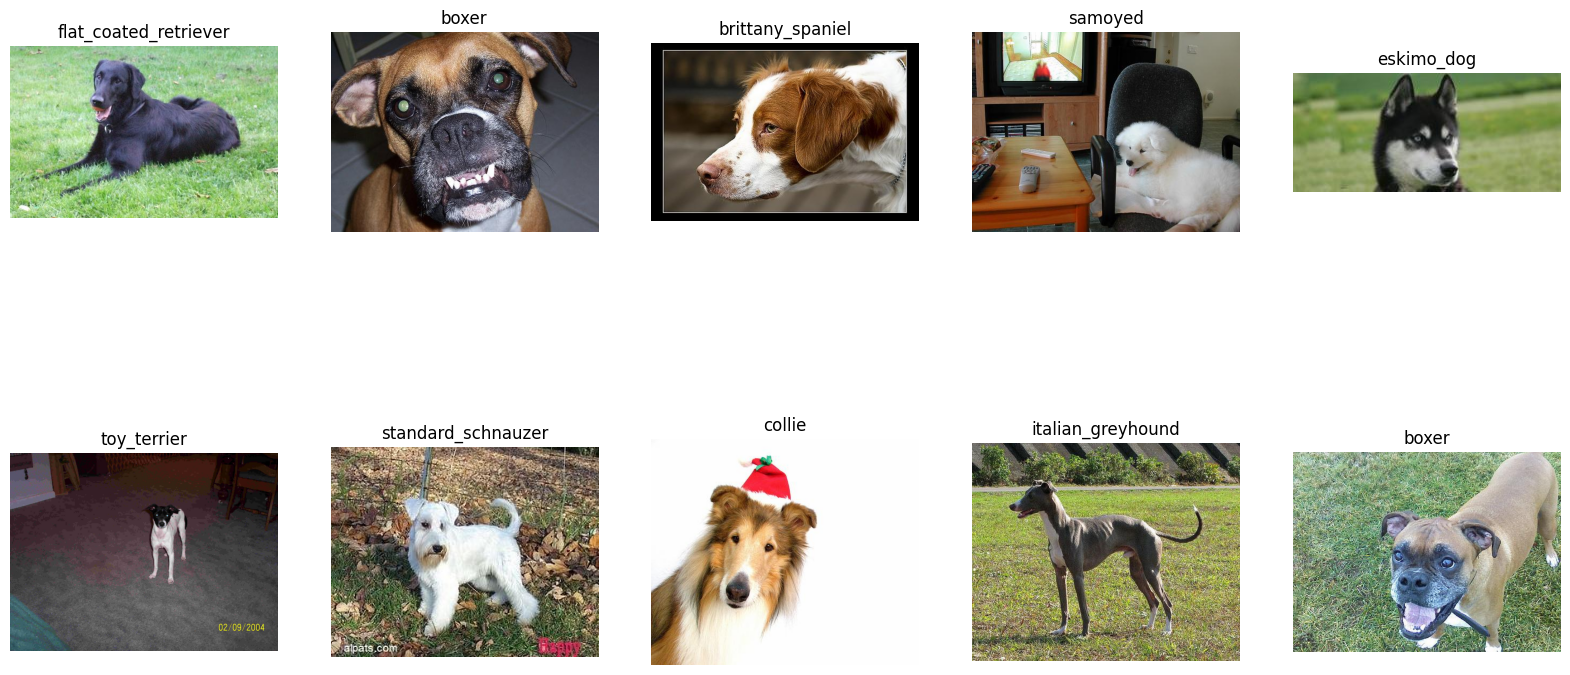

In [ ]:
# Traza 10 imágenes aleatorias de train_image_paths
plot_10_random_images_from_path_list(path_list=train_image_paths,
                                     extract_title=False) # No es necesario extraer el título ya que los directorios de imágenes ya tienen nombres simples.

### Creación de un conjunto de datos de entrenamiento con el 10% de las imágenes

Ya hemos dividido los datos en conjuntos de entrenamiento y prueba, entonces, ¿por qué querríamos hacer otra división?

Bueno, ¿recuerdas el lema de los ingenieros de machine learning?

> **¡Experimenta, experimenta, experimenta!**

Vamos a crear otra división de entrenamiento que contenga un 10% aleatorio (aproximadamente 1,200 imágenes, ya que el conjunto de entrenamiento original tiene 12,000 imágenes) de los datos del conjunto de entrenamiento original.

**¿Por qué hacemos esto?**

Aunque los modelos de machine learning generalmente funcionan mejor con más datos, tener más datos significa tiempos de cómputo más largos. Y tiempos de cómputo más largos significan que el tiempo entre nuestros experimentos aumenta.

Esto no es lo que queremos al principio de un proyecto.

> El objetivo al inicio de cualquier proyecto de machine learning:
> **Reducir el tiempo entre experimentos tanto como sea posible.**

**¿Por qué?** Porque al ejecutar más experimentos puedes descubrir qué no funciona.

Y cuando descubres qué no funciona, puedes acercarte más a lo que **sí funciona.**

Una vez que encuentres algo que funcione, puedes comenzar a escalar tus experimentos:

- Usar más datos
- Entrenar modelos más grandes
- Aumentar los tiempos de entrenamiento

(Veremos estos conceptos más adelante).

Para crear este conjunto, copiaremos un 10% aleatorio del conjunto de entrenamiento existente en una nueva carpeta llamada `images_split/train_10_percent`, logrando una estructura como esta:

```
images_split/
├── train/
│   ├── class_1/
│   │   ├── train_image1.jpg
│   │   ├── train_image2.jpg
│   │   └── ...
│   ├── class_2/
│   │   ├── train_image1.jpg
│   │   ├── train_image2.jpg
│   │   └── ...
├── train_10_percent/ <--- NEW!
│   ├── class_1/
│   │   ├── random_train_image42.jpg
│   │   └── ...
│   ├── class_2/
│   │   ├── random_train_image106.jpg
│   │   └── ...
└── test/
    ├── class_1/
    │   ├── test_image1.jpg
    │   ├── test_image2.jpg
    │   └── ...
    ├── class_2/
    │   ├── test_image1.jpg
    │   ├── test_image2.jpg
    │   └── ...
```

Vamos a comenzar creando esa carpeta.


In [ ]:
# Crear el directorio train_10_percent
train_10_percent_dir = images_split_dir / "train_10_percent"
train_10_percent_dir.mkdir(parents=True, exist_ok=True)


Ahora deberíamos tener 3 carpetas divididas dentro de `images_split`.

In [ ]:
os.listdir(images_split_dir)

['test', 'train', 'train_10_percent']

¡Genial!

Ahora vamos a crear una lista de rutas de archivos de muestras de entrenamiento aleatorias usando [`random.sample()`](https://docs.python.org/3/library/random.html#random.sample) de Python. Queremos que la longitud total de la lista sea igual al 10% de la división de entrenamiento original.

Para que las cosas sean reproducibles, usaremos una semilla aleatoria (esto no es 100% necesario, solo hace que obtengamos el mismo 10% de las rutas de imágenes de entrenamiento cada vez)

In [ ]:
import random

# Establecer una semilla aleatoria
random.seed(42)

# Obtener una muestra del 10% de las rutas de imágenes de entrenamiento
train_image_paths_random_10_percent = random.sample(population=train_image_paths,
                                                    k=int(0.1*len(train_image_paths)))

# Comprobar cuántas rutas de imágenes tenemos
print(f"Número original de rutas de imágenes de entrenamiento: {len(train_image_paths)}")
print(f"Número de rutas de imágenes de entrenamiento del 10%: {len(train_image_paths_random_10_percent)}")
print("Primeras 5 rutas de imágenes de entrenamiento aleatorias del 10%:")
train_image_paths_random_10_percent[:5]

Número original de rutas de imágenes de entrenamiento: 12000
Número de rutas de imágenes de entrenamiento del 10%: 1200
Primeras 5 rutas de imágenes de entrenamiento aleatorias del 10%:


[PosixPath('images_split/train/tibetan_terrier/n02097474_3226.jpg'),
 PosixPath('images_split/train/kerry_blue_terrier/n02093859_1397.jpg'),
 PosixPath('images_split/train/pomeranian/n02112018_9028.jpg'),
 PosixPath('images_split/train/airedale/n02096051_3660.jpg'),
 PosixPath('images_split/train/giant_schnauzer/n02097130_4336.jpg')]

¡Rutas de imágenes de entrenamiento aleatorias 10% adquiridas!

Copiémoslas al directorio `images_split/train_10_percent` usando código similar a nuestra función `copy_files_to_target_dir()`.

In [ ]:
# Copiar entrenamiento del 10% de las imágenes desde images_split/train/ a images_split/train_10_percent/...
for source_file_path in tqdm(train_image_paths_random_10_percent):

  # Crear ruta del archivo de destino
  destination_file_and_image_name = Path(*source_file_path.parts[-2:]) # "images_split/train/yorkshire_terrier/n02094433_2223.jpg" -> "yorkshire_terrier/n02094433_2223.jpg"
  destination_file_path = train_10_percent_dir / destination_file_and_image_name # "yorkshire_terrier/n02094433_2223.jpg" -> "images_split/train_10_percent/yorkshire_terrier/n02094433_2223.jpg"

  # Si el directorio de destino no existe, crearlo
  target_class_dir = destination_file_path.parent
  if not target_class_dir.is_dir():
    # print(f"Creación del directorio: {target_class_dir}")
    target_class_dir.mkdir(parents=True,
                           exist_ok=True)

  # print(f"Copiando: {source_file_path} a {destination_file_path}")
  copy2(src=source_file_path,
        dst=destination_file_path)

  0%|          | 0/1200 [00:00<?, ?it/s]

¡1200 imágenes copiadas!

Revisemos nuestra distribución del conjunto de entrenamiento del 10% y asegurémonos de tener algunas imágenes para cada clase.

Podemos usar nuestra función `count_images_in_subdirs()` para contar las imágenes en cada una de las carpetas de razas de perros en `train_10_percent_dir`.

In [ ]:
# Count images in train_10_percent_dir
train_10_percent_image_class_counts = count_images_in_subdirs(train_10_percent_dir)
train_10_percent_image_class_counts_df = pd.DataFrame(train_10_percent_image_class_counts).sort_values("image_count", ascending=True)
train_10_percent_image_class_counts_df.head()

class_name  image_count
33      english_setter            3
64     standard_poodle            4
23      siberian_husky            4
61        ibizan_hound            4
58  norwegian_elkhound            5

Bien, parece que algunas clases tienen solo un puñado de imágenes.

Asegurémonos de que haya 120 subcarpetas verificando la longitud de `train_10_percent_image_class_counts_df`.

In [ ]:
# Verificar cuántas subcarpetas hay
print(len(train_10_percent_image_class_counts_df))

120


Genial, nuestra división del conjunto de datos del 10% de entrenamiento tiene una carpeta para cada una de las clases de razas de perros.

> **Nota:** Idealmente, nuestro conjunto de entrenamiento aleatorio del 10 % tendría la misma distribución por clase que el conjunto de entrenamiento original; sin embargo, para este ejemplo, hemos tomado un 10 % aleatorio global en lugar de un 10 % aleatorio *por clase*. Esto está bien por ahora; sin embargo, para tareas más detalladas, es posible que desees asegurarte de que tu conjunto de entrenamiento más pequeño esté mejor distribuido.

Para una última comprobación, tracemos la distribución de nuestro conjunto de datos del 10% de entrenamiento.

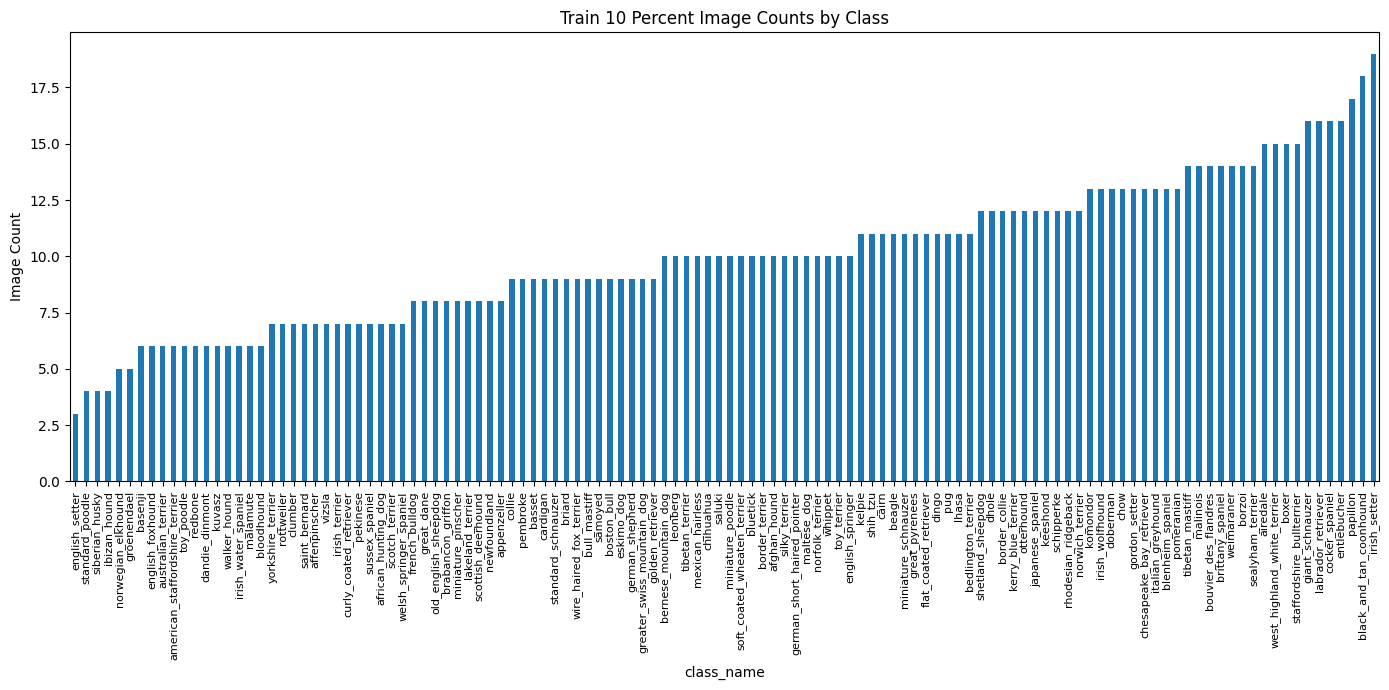

In [ ]:
# Visualizar la distribución del conjunto de datos de datos del 10% de entrenamiento
plt.figure(figsize=(14, 7))
train_10_percent_image_class_counts_df.plot(kind="bar",
                     x="class_name",
                     y="image_count",
                     legend=False,
                     ax=plt.gca()) # plt.gca() = "obtener el eje actual", obtener el plt que configuramos arriba y colocar los datos allí

# Añadir personalización
plt.title("Train 10 Percent Image Counts by Class")
plt.ylabel("Image Count")
plt.xticks(rotation=90, # Rotar para mejor visualización
           fontsize=8) # Hacer el tamaño de fuente más pequeño
plt.tight_layout()
plt.show()

¡Excelente! La distribución del conjunto de datos de entrenamineto del 10% se parece a la del conjunto de entrenamiento original.

Sin embargo, podría ser mejor.

Si realmente lo deseáramos, podríamos recrear el conjunto de datos `train_10_percent` tomando el 10% de las imágenes de cada clase en lugar del 10% de las imágenes globalmente.

> **Extensión:** ¿Cómo crearías la división de datos `train_10_percent` con el 10% de las imágenes de cada clase? Por ejemplo, cada carpeta tendría al menos 10 imágenes de una raza de perro específica.

## 5. Convertir conjuntos de datos en TensorFlow Dataset(s)

Bien, hemos dedicado bastante tiempo a organizar nuestras imágenes de perros en diferentes carpetas.

Pero, ¿cómo llevamos las imágenes de estas carpetas a un modelo de machine learning?

Al igual que en otros modelos de machine learning, necesitamos una forma de convertir nuestras imágenes en números.

Específicamente, vamos a [convertir nuestras imágenes en **tensores**](https://www.tensorflow.org/tutorials/load_data/images).

De hecho, la "T" en **TensorFlow** viene de "tensor".

Un [**tensor**](https://en.wikipedia.org/wiki/Tensor) es una forma de representar algo numéricamente (donde ese algo puede ser casi cualquier cosa que puedas imaginar: texto, imágenes, audio, filas y columnas).

### Cómo cargar datos en TensorFlow
Hay varias formas de cargar datos en TensorFlow, pero la fórmula es la misma para todos los tipos de datos:
1. **Tener datos.**
2. **Usar TensorFlow para convertirlos en tensores.**

El motivo por el cual dedicamos tiempo a estructurar nuestros datos en un formato estándar para clasificación de imágenes (donde el nombre de la carpeta es el nombre de la clase) es porque TensorFlow incluye varias funciones de utilidad para cargar datos desde este formato de directorios.

### Funciones de carga de datos en TensorFlow

| Function | Description |
| :----- | :----- |
| [`tf.keras.utils.image_dataset_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) | Crea un [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) a partir de archivos de imágenes en un directorio. |
| [`tf.keras.utils.audio_dataset_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/audio_dataset_from_directory) | Crea un `tf.data.Dataset` a partir de archivos de audio en un directorio. |
| [`tf.keras.utils.text_dataset_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/text_dataset_from_directory) | Crea un `tf.data.Dataset` a partir de archivos de texto en un directorio |
| [`tf.keras.utils.timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array) | Crea un dataset de ventanas deslizantes sobre una serie temporal proporcionada como arreglo. |

### ¿Qué es un [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)?

Es la forma eficiente de TensorFlow para almacenar un conjunto potencialmente grande de elementos.

Como los conjuntos de datos de machine learning pueden llegar a ser bastante grandes, necesitas una forma eficiente de almacenarlos y cargarlos. Esto es lo que proporciona la API `tf.data.Dataset`.

### Creación de un `tf.data.Dataset` para imágenes

Como estamos trabajando con imágenes, usaremos la función `tf.keras.utils.image_dataset_from_directory()`.

**Parámetros que utilizaremos:**
1. **`directory`**: El directorio objetivo que queremos convertir en un `tf.data.Dataset`.
2. **`label_mode`**: El tipo de etiquetas que queremos usar. En nuestro caso, será `"categorical"`, ya que estamos tratando con un problema de clasificación multiclase (usaríamos `"binary"` si fuera un problema de clasificación binaria).
3. **`batch_size`**: El número de imágenes que queremos que nuestro modelo procese a la vez. Generalmente, [32 es un buen valor inicial](https://x.com/ylecun/status/989610208497360896?s=20). Esto significa que nuestro modelo verá 32 imágenes en cada lote (este número es flexible).
4. **`image_size`**: El tamaño al que queremos ajustar nuestras imágenes antes de alimentarlas al modelo (alto x ancho).
5. **`shuffle`**: Si queremos que nuestro conjunto de datos se mezcle para aleatorizar el orden.
6. **`seed`**: Si estamos mezclando el orden de forma aleatoria, ¿queremos que sea reproducible?

> **Nota:** Parámetros como `batch_size` y `image_size` se conocen como **hiperparámetros**, lo que significa que son valores sobre los que podemos decidir cómo configurarlos. El mejor valor para un hiperparámetro específico depende del conjunto de datos con el que trabajes, el problema que estés resolviendo y las capacidades de cómputo disponibles. ¡Lo mejor es experimentar!

Crearemos tres conjuntos de datos en TensorFlow:
1. **`train_10_percent_ds`**: Conjunto de datos de entrenamiento reducido (10% de las imágenes de entrenamiento).
2. **`train_ds`**: Conjunto de datos completo de entrenamiento.
3. **`test_ds`**: Conjunto de datos de prueba.

In [ ]:
import tensorflow as tf

# Crear constantes
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
SEED = 42

# Crear train 10% dataset
train_10_percent_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_10_percent_dir,
    label_mode="categorical", # convierte las etiquetas en representaciones one-hot (por ejemplo, [0, 0, 1, ..., 0, 0])
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True, # mezclar conjuntos de datos de entrenamiento para evitar el aprendizaje del orden
    seed=SEED
)

# Crear dataset de entrenamiento completo
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=SEED
)

# Crear dataset de prueba
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=False, # no es necesario mezclar el conjunto de datos de prueba (esto facilita las evaluaciones)
    seed=SEED
)

Found 1200 files belonging to 120 classes.
Found 12000 files belonging to 120 classes.
Found 8580 files belonging to 120 classes.


> **Nota:** Si estás trabajando con estilos de datos similares (por ejemplo, todas las fotos de perros), es una buena práctica **mezclar conjuntos de datos de entrenamiento** para evitar que el modelo aprenda cualquier orden en los datos, no es necesario mezclar conjuntos de datos de prueba (esto facilita la evaluación).

`tf.data.Dataset`s creado!

Echemos un vistazo a uno de ellos.

In [ ]:
train_10_percent_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.float32, name=None))>

Verás que auí suceden algunas cosas.

Básicamente, tenemos una colección de tuplas:
1. Los tensores de imagen - `TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)` donde `(None, 224, 224, 3)` es la forma del tensor de imagen ("Ninguno" es el tamaño del lote, "(224, 224)" es el "IMG_SIZE" que configuramos y `3` es el número de canales de color, como en [rojo, verde, azul o RGB] (https://en.wikipedia.org/wiki/RGB_color_model) ya que nuestras imágenes están en color).
2. Los tensores de etiquetas - `TensorSpec(shape=(None, 120), dtype=tf.float32, name=None)` donde `Ninguno` es el tamaño del lote y `120` es el número de etiquetas que tenemos. re usando.

El tamaño del lote suele aparecer como "Ninguno", ya que es flexible y puede cambiar sobre la marcha.

Cada lote de imágenes está asociado a un lote de etiquetas.

En lugar de hablar de ello, veamos cómo se ve un solo lote.

Podemos hacerlo convirtiendo `tf.data.Dataset` en un iterable con el [`iter()`] integrado de Python (https://docs.python.org/3/library/functions.html#iter). y luego obtener el "siguiente" lote con [`next()`](https://docs.python.org/3/library/functions.html#next).

In [ ]:
# What does a single batch look like?
image_batch, label_batch = next(iter(train_ds))
image_batch.shape, label_batch.shape

(TensorShape([16, 224, 224, 3]), TensorShape([16, 120]))

Genial!

Recuperamos un único lote de imágenes y etiquetas.

Parece que un solo `image_batch` tiene la forma `[32, 224, 224, 3]` (`[batch_size, height, width, colour_channels]`).

Y nuestras etiquetas tienen la forma de `[32, 120]` (`[batch_size, etiquetas]`).

¡Estas son representaciones numéricas de nuestras imágenes y etiquetas de datos!

> **Nota:** La forma de un tensor no refleja necesariamente los valores dentro de un tensor. La forma sólo refleja la dimensionalidad de un tensor. Por ejemplo, `[32, 224, 224, 3]` es un tensor de 4 dimensiones. Los valores dentro de un tensor pueden ser cualquier número (positivo, negativo, 0, flotante, entero, etc.) que represente casi cualquier tipo de datos.

Podemos inspeccionar más a fondo nuestros datos observando una sola muestra.

In [ ]:
# Obtener una única muestra de un único lote
print(f"Single image tensor:\n{image_batch[0]}\n")
print(f"Single label tensor: {label_batch[0]}") # observa que 1 es el índice de la etiqueta target (nuestras etiquetas están codificadas en one-hot)
print(f"Single sample class name: {dog_names[tf.argmax(label_batch[0])]}")

Single image tensor:
[[[196.61607  174.61607  160.61607 ]
  [197.84822  175.84822  161.84822 ]
  [200.       178.       164.      ]
  ...
  [ 60.095097  79.75804   45.769207]
  [ 61.83293   71.22575   63.288315]
  [ 77.65755   83.65755   81.65755 ]]

 [[196.       174.       160.      ]
  [197.83876  175.83876  161.83876 ]
  [199.07945  177.07945  163.07945 ]
  ...
  [ 94.573715 110.55229   83.59694 ]
  [125.869865 135.26268  127.33472 ]
  [122.579605 128.5796   126.579605]]

 [[195.73691  173.73691  159.73691 ]
  [196.896    174.896    160.896   ]
  [199.       177.       163.      ]
  ...
  [ 26.679413  38.759026  20.500835]
  [ 24.372307  31.440136  26.675896]
  [ 20.214453  26.214453  24.214453]]

 ...

 [[ 61.57369   70.18976  104.72547 ]
  [189.91965  199.61607  213.28572 ]
  [247.26637  255.       252.70387 ]
  ...
  [113.40158   83.40158   57.40158 ]
  [110.75214   78.75214   53.752136]
  [107.37048   75.37048   50.370483]]

 [[ 61.27007   69.88614  104.42185 ]
  [188.93079  19

¡Vaya!

¡Tenemos una representación numérica de la imagen de un perro (en forma de valores de píxeles rojos, verdes y azules)!

Este es exactamente el tipo de formato que querrá nuestro modelo.

¿Podemos hacer lo contrario?

En lugar de imagen -> números, ¿podemos pasar de números -> imagen?

Puedes apostar.

### Visualizando imágenes de nuestro conjunto de datos de TensorFlow

Sigamos el lema del explorador de datos una vez más y *¡visualice, visualice, visualice!*

¿Qué tal si convertimos nuestra muestra única del formato tensorial al formato de imagen?

Podemos hacerlo pasando el tensor de imagen de muestra única a [`plt.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) de matplotlib (también necesita convertir su tipo de datos de `float32` a `uint8` para evitar problemas con la gama de colores de matplotlib).

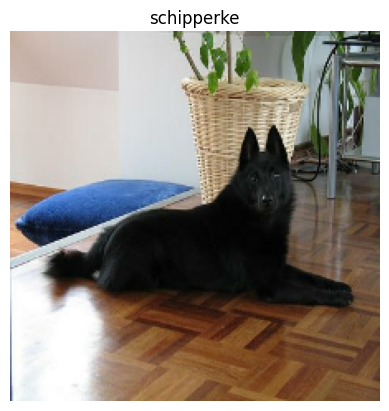

In [ ]:
plt.imshow(image_batch[0].numpy().astype("uint8")) # convert tensor to uint8 to avoid matplotlib colour range issues
plt.title(dog_names[tf.argmax(label_batch[0])])
plt.axis("off");

¿Qué tal si trazamos varias imágenes?

Podemos hacerlo configurando primero una trama con múltiples subtramas.

Y luego podemos iterar a través de nuestro conjunto de datos con [`tf.data.Dataset.take(count=1)`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) lo que "tomar" `1` lote de datos (en nuestro caso, un lote son 32 muestras) que luego podemos indexar para cada subtrama.

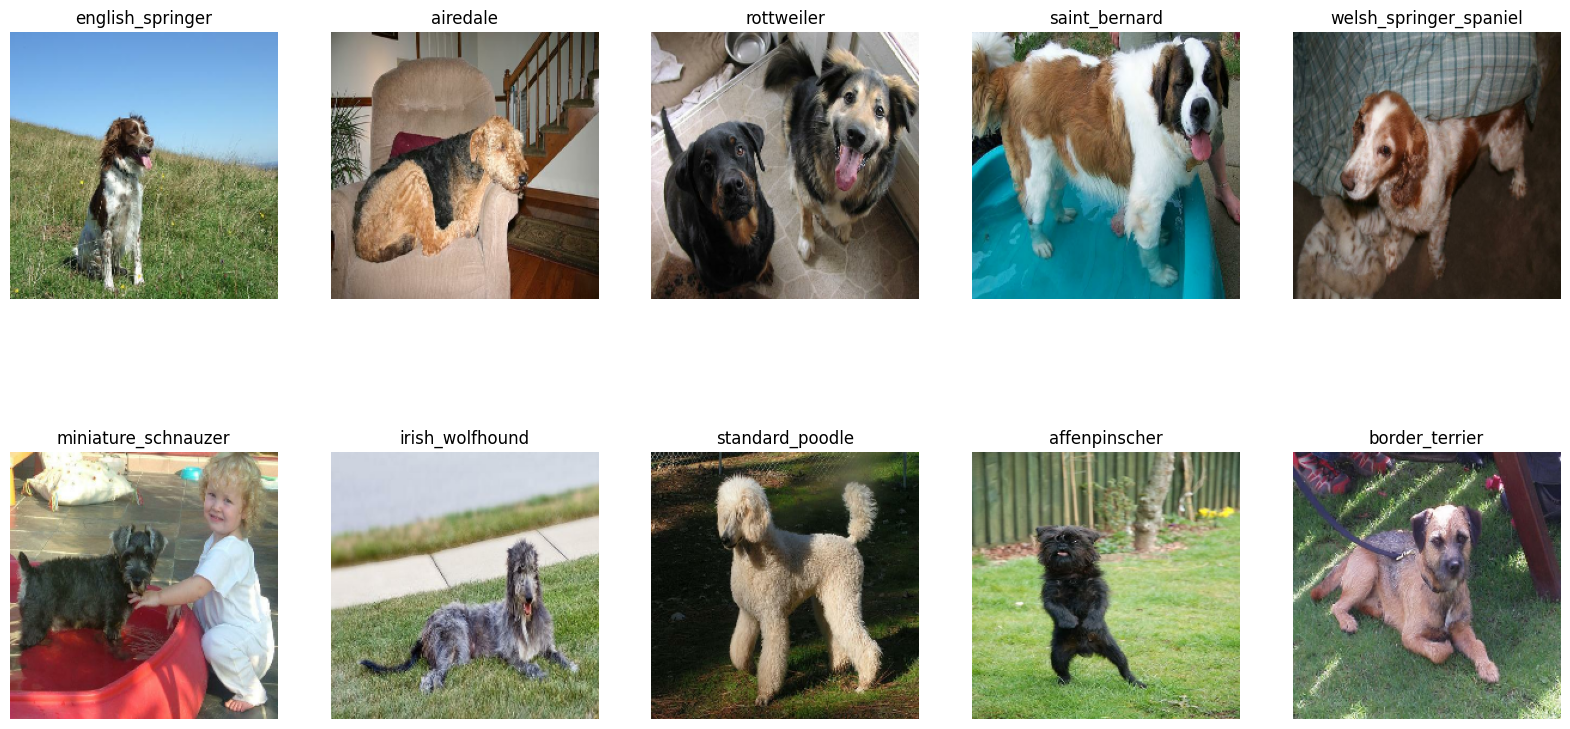

In [ ]:
# Crear múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# Iterar a través de un solo lote y trazar imágenes
for images, labels in train_ds.take(count=1): # nota: debido a que nuestros datos de entrenamiento están mezclados, cada "toma" será diferente
  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].numpy().astype("uint8"))
    ax.set_title(dog_names[tf.argmax(labels[i])])
    ax.axis("off")

Aren't those good looking dogs!

### Obtener etiquetas de nuestro conjunto de datos de TensorFlow

Dado que nuestros datos ahora están en formato `tf.data.Dataset`, hay un par de atributos importantes que podemos extraer de ellos si es necesario.

La primera es la colección de rutas de archivos asociadas con un `tf.data.Dataset`.

Se puede acceder a ellos mediante el atributo `.file_paths`.

> **Nota:** A menudo puedes ver una lista de métodos y atributos asociados de una variable/clase en Google Colab (u otros IDE) presionando TAB después (por ejemplo, escribe `variable_name.` + TAB).

In [ ]:
# Get the first 5 file paths of the training dataset
train_ds.file_paths[:5]

['images_split/train/boston_bull/n02096585_1753.jpg',
 'images_split/train/kerry_blue_terrier/n02093859_855.jpg',
 'images_split/train/border_terrier/n02093754_2281.jpg',
 'images_split/train/rottweiler/n02106550_11823.jpg',
 'images_split/train/airedale/n02096051_5884.jpg']

También podemos obtener los nombres de clases asociados con un conjunto de datos usando `.class_names` (TensorFlow los ha leído de los nombres de nuestras carpetas de destino en el directorio `images_split`).

In [ ]:
# Obtenga los nombres de clases que TensorFlow ha leído del directorio de destino
class_names = train_ds.class_names
class_names[:5]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier']

Y podemos asegurarnos de que los nombres de las clases sean los mismos en todos nuestros conjuntos de datos comparándolos.

In [ ]:
assert set(train_10_percent_ds.class_names) == set(train_ds.class_names) == set(test_ds.class_names)

## Configurando nuestros conjuntos de datos para un mejor rendimiento

Hay un último paso que realizaremos antes de construir nuestro primer modelo de TensorFlow: **configurar nuestros conjuntos de datos para un mejor rendimiento**.

Más específicamente, seguiremos la guía de TensorFlow para [*Mejor rendimiento con la API `tf.data`*](https://www.tensorflow.org/guide/data_performance).

**¿Por qué es importante?**

La carga de datos es uno de los mayores cuellos de botella en machine learning.

- Las GPUs modernas pueden realizar cálculos (como multiplicaciones de matrices) para encontrar patrones en los datos de manera muy rápida.
- Sin embargo, para que la GPU realice estos cálculos, los datos deben estar disponibles.

La buena noticia es que si seguimos las [mejores prácticas de `tf.data` de TensorFlow](https://www.tensorflow.org/guide/data_performance#best_practice_summary), TensorFlow se encargará de estas optimizaciones y aprovechará la aceleración por hardware.

### Métodos para optimizar un dataset

Llamaremos a tres métodos en nuestro conjunto de datos para optimizarlo:

1. **[`cache()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache):**
   - Almacena en caché los elementos del dataset en memoria o en una carpeta objetivo.
   - Esto acelera la carga de datos.

2. **[`shuffle()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle):**
   - Mezcla un número fijo de muestras para preparar la carga.
   - Por ejemplo, establecer `shuffle(buffer_size=1000)` prepara y mezcla 1000 elementos de datos a la vez.
   - Esto asegura que tanto las muestras como los lotes de muestras estén mezclados.

3. **[`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch):**
   - Prepara el siguiente lote de datos mientras se procesa el lote actual.
   - Puede escalar a múltiples lotes dependiendo de la disponibilidad de hardware.
   - Podemos configurar automáticamente cuántos elementos/batches prefetchar usando `prefetch(buffer_size=tf.data.AUTOTUNE)`.

> **Recurso:** Para más consejos sobre rendimiento al cargar datasets en TensorFlow, consulta la [guía de consejos de rendimiento para datasets](https://www.tensorflow.org/datasets/performances).

### Aplicación en nuestros datasets

1. **Llamar a `cache()`**:  
   Usaremos este método para guardar las muestras cargadas en memoria.

2. **Llamar a `shuffle()`**:
   - Mezclaremos los datos de entrenamiento:
     - Para el conjunto de entrenamiento reducido al 10%, usaremos `buffer_size=10*BATCH_SIZE`.
     - Para el conjunto de entrenamiento completo, usaremos `buffer_size=100*BATCH_SIZE`.

   **¿Por qué estos números?**
   - Son valores que decidimos usar mediante experimentación.
   - Si tu conjunto de datos no es demasiado grande, lo ideal sería mezclar todas las muestras posibles. TensorFlow tiene un método para encontrar el número de muestras en un dataset llamado [`tf.data.Dataset.cardinality()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cardinality).

   Nota: No llamaremos a `shuffle()` en el conjunto de prueba porque no es necesario.

3. **Llamar a `prefetch(buffer_size=tf.data.AUTOTUNE)`**:
   - Usaremos este método en todos nuestros datasets para cargar y preparar automáticamente un número de lotes de datos.


> Configurar nuestros datasets con estos métodos optimiza el rendimiento y reduce los tiempos de entrenamiento al asegurar que los datos estén listos para ser procesados antes de que se necesiten. ¡Este es un paso crucial para trabajar eficientemente con TensorFlow!

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE # let TensorFlow find the best values to use automatically

# Shuffle and optimize performance on training datasets
# Note: these methods can be chained together and will have the same effect as calling them individually
train_10_percent_ds = train_10_percent_ds.cache().shuffle(buffer_size=10*BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.cache().shuffle(buffer_size=100*BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

# Don't need to shuffle test datasets (for easier evaluation)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

¡Rendimiento del conjunto de datos optimizado!

Dedicamos más tiempo aquí porque los conjuntos de datos son muy importantes para el aprendizaje automático y los flujos de trabajo de aprendizaje profundo; siempre que pueda hacerlos más rápidos, debería hacerlo.

¡Es hora de crear nuestra primera red neuronal con TensorFlow!

## 6. Crear una red neuronal con TensorFlow

¡Hemos pasado mucho tiempo preparando los datos!

Esto se debe a que, a menudo, la parte más importante de un problema de aprendizaje automático es preparar los datos para un modelo de aprendizaje automático.

Gracias a frameworks modernos como TensorFlow, una vez que sus datos están en orden, construir un modelo de aprendizaje profundo para encontrar patrones en sus datos puede ser uno de los pasos más fáciles del proceso.

Cuando escuchas a la gente hablar de aprendizaje profundo, a menudo se refieren a las redes neuronales.

Las redes neuronales son uno de los modelos de aprendizaje automático más flexibles que existen.

Puedes crear una red neuronal para adaptarse a casi cualquier tipo de datos.

El "profundo" en aprendizaje profundo se refiere a las muchas capas que pueden contenerse dentro de una red neuronal.

Una red neuronal a menudo sigue la siguiente estructura:

Capa de entrada -> Capa(s) intermedia(s) -> Capa de salida.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-anatomy-of-a-neural-network.png?raw=true" width=750 alt="This image illustrates a simple neural network diagram with one input layer, one hidden layer, and one output layer. The input layer has 2 neurons, the hidden layer has 3 neurons, and the output layer has 1 neuron. The diagram shows connections between neurons across layers. There are annotations indicating that the neural network can be customized for almost any kind of input and output, and although the number and type of hidden layers are infinitely customizable, there is often a practical upper limit. The output layer represents learned data or prediction probabilities. The overall theme conveys the flexibility and adaptability of neural network architectures."/>

*Anatomía general de una red neuronal. Las redes neuronales son casi infinitamente personalizables. La premisa principal es que los datos ingresan por un extremo, se manipulan mediante muchas pequeñas funciones en un intento de aprender patrones/pesos que representan los datos para producir salidas útiles. Tenga en cuenta que "patrones" es un término arbitrario, a menudo escuchará "incrustación", "pesos", "representación de características", "representación", todos refiriéndose a cosas similares.*

Donde la capa de entrada recibe los datos, la(s) capa(s) intermedia(s) realizan cálculos sobre los datos y (con suerte) aprenden patrones (también llamados pesos/sesgos) para representar los datos y la capa de salida realiza una transformación final en los patrones aprendidos para hacerlos utilizables en aplicaciones humanas.

¿Qué entra en la(s) capa(s) intermedia(s)?

Esa es una excelente pregunta.

Porque hay tantas opciones diferentes.

Pero dos de los tipos más populares de redes neuronales modernas son las Redes Neuronales Convolucionales (CNN) y los Transformadores (el "T" en GPT, Generative Pretrained Transformer).

| Arquitectura  | Descripción | Capas de ejemplo Layers | Ejemplos de problemas |
|:----- |:-----|:-----|:-----|
| [Transformer](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)) | Una combinación de capas fully connected y capas basadas en la atención (attention-based layers).                                       | [`tf.keras.layers.Attention`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Attention), [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) | NLP, Machine Translation, Computer Vision  |
| [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) | Una combinación de capas fully connected y capas basadas en convolucionales (convolutional-based layers).                                   | [`tf.keras.layers.Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) | Computer Vision, Audio Processing |

Como nuestro problema está relacionado con el ámbito informático, vamos a utilizar una Red Neuronal Convolucional (CNN).

Y en lugar de crear nuestra propia CNN desde cero, tomaremos un modelo CNN existente y lo aplicaremos a nuestro propio problema, aprovechando la maravillosa superpotencia del aprendizaje por transferencia.

> **Nota:** Puedes construir y usar redes neuronales funcionales con TensorFlow sin conocer los intrincados detalles de su funcionamiento interno (en eso nos estamos centrando). Para tener una idea de las operaciones matemáticas que hacen que las redes neuronales funcionen, te recomiendo que veas la serie de [YouTube sobre redes neuronales de 3Blue1Browns](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi).



### La magia del aprendizaje por transferencia

El **aprendizaje por transferencia** es el proceso de tomar un modelo existente que ya funciona y ajustarlo a tu propio problema.

Esto funciona particularmente bien con redes neuronales.

#### Beneficios principales del aprendizaje por transferencia

El beneficio principal del aprendizaje por transferencia es la capacidad de obtener mejores resultados en menos tiempo y con menos datos.

**¿Cómo?**

Un modelo existente puede tener las siguientes características:

* **Entrenado con grandes cantidades de datos:** En el caso de visión por computadora, los modelos existentes a menudo están preentrenados en **ImageNet**, un conjunto de datos con más de 1 millón de imágenes. Esto significa que ya han aprendido patrones en una gran variedad de imágenes.

* **Creado por investigadores expertos:** Grandes universidades y empresas como Google y Meta suelen publicar modelos de alta calidad como código abierto para que otros los prueben y utilicen.

* **Entrenado en hardware computacional potente:** Los modelos más grandes y los datasets más extensos requieren una gran cantidad de poder computacional. No todos tienen acceso a decenas, cientos o miles de GPUs.

* **Probado en múltiples estudios:** Esto significa que el modelo ha demostrado su efectividad en una tarea específica y tiene una alta probabilidad de funcionar bien en tu problema si es similar.

#### ¿Dónde encontrar modelos preentrenados?

¡Buenas noticias! Hay muchos lugares para encontrar modelos preentrenados:

| Recurso | Descripción |
| :--- | :--- |
| [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications) | Un módulo integrado en TensorFlow y Keras con una serie de modelos preentrenados listos para usar. |
| [KerasNLP](https://keras.io/keras_nlp/) and [KerasCV](https://keras.io/keras_cv/) | Bibliotecas dedicadas a NLP (procesamiento de lenguaje natural) y CV (visión por computadora). |
| [Hugging Face Models Hub](https://huggingface.co/models) | Una gran colección de modelos preentrenados para tareas que van desde visión por computadora hasta procesamiento de audio. |
| [Kaggle Models](https://www.kaggle.com/models) | Una enorme colección de modelos preentrenados para múltiples tareas. |

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-places-to-find-pretrained-models.png?raw=true" width=750 alt="Four browser windows are open displaying web pages from Keras, TensorFlow, HuggingFace Hub, and Kaggle. Each window is showing documentation or listings related to machine learning models and applications. The sources are displayed prominently at the bottom of each window: keras.io for KerasCV and KerasNLP, tensorflow.org for tf.keras.applications, huggingface.co for HuggingFace Hub, and kaggle.com for Kaggle Models."/>

*Diferentes ubicaciones para encontrar modelos previamente entrenados. Esta lista se expande constantemente a medida que el aprendizaje automático se vuelve cada vez más de código abierto.*

> **Nota:** Para la mayoría de los problemas nuevos en machine learning, si buscas obtener buenos resultados rápidamente, lo ideal es encontrar un modelo preentrenado que sea similar a tu problema y usar aprendizaje por transferencia para adaptarlo a tu dominio.

#### Nuestro enfoque: TensorFlow/Keras

Como estamos enfocados en TensorFlow/Keras, utilizaremos un modelo preentrenado de `tf.keras.applications`.

Más específicamente, usaremos el modelo [`tf.keras.applications.efficientnet_v2.EfficientNetV2B0()`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2B0) del artículo de investigación de Google Research de 2021: [*EfficientNetV2: Smaller Models and Faster Training*](https://arxiv.org/abs/2104.00298).

#### Detalles del modelo EfficientNetV2B0

**Entrado en [ImageNet1k](https://en.wikipedia.org/wiki/ImageNet)**: Contiene más de 1 millón de imágenes distribuidas en 1000 clases diversas.
(También existe una versión llamada ImageNet22k con más de 14 millones de imágenes en 22,000 categorías).

**Capacidad de generalización:** Este modelo tiene un buen entendimiento de patrones en imágenes de dominios variados, lo que lo convierte en una excelente base para ajustar a nuestro problema de clasificación de imágenes de perros.

Ajustaremos ligeramente los patrones aprendidos por el modelo para adaptarlos a nuestras imágenes de perros.

Creemos una instancia de este modelo y llamémosla `base_model`.

In [ ]:
from tensorflow.keras.applications import EfficientNetV2B0

# Crea la forma de entrada a nuestro modelo.
INPUT_SHAPE = (*IMG_SIZE, 3)

base_model = EfficientNetV2B0(
    include_top=True, # ¿quieres incluir la capa superior? (ImageNet tiene 1000 clases, por lo que la capa superior está formulada para esto; queremos crear nuestra propia capa superior)
    include_preprocessing=True, # ¿queremos que la red preprocese nuestros datos en el formato correcto para nosotros? (forks)
    weights="imagenet", # ¿queremos que la red venga con pesas previamente entrenadas? (forks)
    input_shape=INPUT_SHAPE # ¿cuál es la forma de entrada de nuestros datos que vamos a pasar a la red? (224, 224, 3) -> (alto, ancho, color_channels)
)

¡Modelo base creado!

Podemos conocer información sobre nuestro modelo base llamando a `base_model.summary()`.

In [ ]:
# Note: Uncomment to see full output
# base_model.summary()

Salida truncada de `base_model.summary()`:

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-effnetv2b0-model-summary.png?raw=true" width=750 alt="Screenshot of a text-based neural network model summary for 'efficientnetv2-b0'. The display lists layers, output shapes, parameter counts, and connectivity in a structured table with dashed lines separating columns. Visible layers include InputLayer, Rescaling, Normalization, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dropout, and Dense, along with their corresponding specifications. A note indicates 90% of the layers are omitted for brevity."/>

¡Guau! Mire todas esas capas... ¡esto es lo que significa "profundo" en el aprendizaje profundo! Un número *profundo* de capas.

¿Qué tal si contamos el número de capas?

In [ ]:
# Contar el número de capas
print(f"Número de capas en base_model: {len(base_model.layers)}")

Número de capas en base_model: 273


¡273 capas!

Cuando comenzamos en deep learning, **no necesitamos** saber qué ocurre en cada capa de un modelo para poder utilizarlo.

Por ahora, nos enfocaremos en algunos puntos clave:

- La **capa de entrada** (la primera capa): Su forma de entrada nos dice qué formato espera el modelo para los datos de entrada.
- La **capa de salida** (la última capa): Su forma de salida nos indica el formato de los datos que el modelo generará como salida.
- El **número de parámetros** del modelo: Estos son los números "aprendibles" (también llamados pesos) que el modelo utiliza para derivar patrones y representar los datos. Generalmente, mientras más parámetros tenga un modelo, mayor capacidad de aprendizaje tiene.
- El **número de capas** del modelo: En general, mientras más capas tiene un modelo, mayor es su capacidad de aprendizaje (cada capa aprende patrones progresivamente más profundos a partir de los datos). Sin embargo, esta capacidad alcanza un límite en cierto rango.

Vamos a analizar cada uno de estos puntos.


### Formas de entrada y salida del modelo

Uno de los pasos prácticos más importantes en el uso de un modelo de aprendizaje profundo son las formas de entrada y salida.

Hay que plantearse dos preguntas:

* ¿Cuál es la forma de mis datos de entrada?
* ¿Cuál es la forma ideal de mis datos de salida?

Preguntamos por las formas porque en todos los modelos de aprendizaje profundo los datos de entrada y salida vienen en forma de tensores.

Esto es válido para texto, audio, imágenes y mucho más.

Los datos en bruto se convierten primero en una representación numérica antes de pasarlos a un modelo.

En nuestro caso, nuestros datos de entrada tienen la forma de `[(32, 224, 224, 3)]` o `[(batch_size, height, width, colour_channels)]`.

Y nuestra forma de salida ideal será `[(32, 120)]` o `[(batch_size, number_of_dog_classes)]`.

Las formas de entrada y salida variarán en función del problema y de los datos con los que trabajes.

Pero a medida que te adentres en el mundo del aprendizaje automático (y del aprendizaje profundo), te darás cuenta de que las formas de entrada y salida son uno de los errores más comunes.

Podemos comprobar las formas de entrada y salida de nuestro modelo con los atributos `.input_shape` y `.output_shape`.


In [ ]:
# Check the input shape of our model
base_model.input_shape

(None, 224, 224, 3)

Muy bien. Parece que la forma de entrada de nuestro modelo está donde queremos (recuerda que `None` en este caso equivale a una dimensión comodín, lo que significa que podría ser cualquier valor, pero hemos fijado el nuestro en `32`).

Esto se debe a que el modelo que hemos elegido,  `tf.keras.applications.efficientnet_v2.EfficientNetV2B0`, ha sido entrenado con imágenes del mismo tamaño que las nuestras.

Si nuestro modelo tuviera una forma de entrada diferente, tendríamos que asegurarnos de procesar nuestras imágenes para que tuvieran la misma forma.

Ahora vamos a comprobar la forma de salida.

In [ ]:
# Comprobar la forma de salida del modelo
base_model.output_shape

(None, 1000)

¿Es esto lo que buscamos?

Dado que tenemos 120 clases de perros, nos gustaría una forma de salida de `(None, 120)`.

¿Por qué es por defecto `(None, 1000)`?

Esto se debe a que el modelo ya ha sido entrenado en ImageNet, un conjunto de datos de más de 1.000.000 de imágenes con 1000 clases (de ahí el `1000` en la forma de salida).

¿Cómo podemos cambiar esto?

Volvamos a crear una instancia de `modelo_base`, pero esta vez cambiaremos el parámetro `classes` a 120.


In [ ]:
# Crear un modelo base con 120 clases de salida (output classes)
'''
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    classes=len(dog_names)
)

base_model.output_shape
'''

'\nbase_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(\n    include_top=True,\n    include_preprocessing=True,\n    weights="imagenet",\n    input_shape=INPUT_SHAPE,\n    classes=len(dog_names)\n)\n\nbase_model.output_shape\n'

Oh no!

Tenemos un error:

> `ValueError: If using weights as 'imagenet' with include_top as true, classes should be 1000 Received: classes=120`

Lo que esto está diciendo es que si queremos utilizar los pesos preentrenados `'imagenet'` (lo que hacemos para aprovechar los patrones visuales / características de un modelo ya ha aprendido en ImageNet, tenemos que cambiar los parámetros de `base_model`.

Lo que vamos a hacer es crear nuestras propias capas superiores.

Podemos hacerlo estableciendo `include_top=False`.

Esto significa que utilizaremos la mayoría de las capas existentes del modelo para extraer características y patrones de nuestras imágenes y luego adaptaremos las últimas capas a nuestro propio problema.

Este tipo de aprendizaje por transferencia suele denominarse **extracción de características**.

Se trata de una configuración en la que se utilizan los pesos preentrenados de un modelo existente para extraer características (o patrones) de los datos personalizados.

A continuación, puede utilizar las características extraídas y adaptarlas a su propio caso de uso.

Vamos a crear una instancia de `base_model` sin una capa superior.


In [ ]:
# Crear modelo base sin capa superior
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False, # no incluir capa superior (queremos crear nuestra propia capa superior)
    include_preprocessing=True,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
)

# Verificar la forma de salida
base_model.output_shape

(None, 7, 7, 1280)

Hmm, ¿qué es esta forma de salida?

Esto todavía no es lo que queremos (buscamos `(None, 120)` para nuestro número de clases de perros).

¿Qué tal si volvemos a comprobar el número de capas?

In [ ]:
# Contar el número de capas
print(f"Número de capas en base_model: {len(base_model.layers)}")

Número de capas en base_model: 270


Parece que nuestro nuevo `base_model` tiene menos capas que el anterior.

Esto se debe a que hemos utilizado `include_top=False`.

Esto significa que todavía tenemos 270 capas de base para extraer características y patrones de nuestras imágenes, sin embargo, también significa que podemos **personalizar las capas de salida a nuestro gusto**.

Volveremos a esto en breve.

### Parámetros del modelo

En la programación tradicional, se escribe una lista de reglas para que las entradas entren, se manipulen de alguna manera predefinida y luego salgan las salidas.

Sin embargo, como hemos visto, el aprendizaje automático cambia el orden.

Se introducen entradas y salidas ideales (por ejemplo, imágenes de perros y sus etiquetas correspondientes) y salen reglas.

Los **parámetros** de un modelo son las reglas aprendidas.

Y *aprendidas* es lo importante.

En una configuración ideal, nunca le decimos al modelo qué parámetros debe aprender, los aprende por sí mismo conectando los datos de entrada con las etiquetas en el aprendizaje supervisado y agrupando muestras similares en el aprendizaje no supervisado.

> **Nota:** Los parámetros son valores aprendidos por un modelo, mientras que los hiperparámetros (por ejemplo, el batch size o tamaño del lote) son valores establecidos por un ser humano.
>
> Los parámetros también se denominan «pesos», «patrones», «características aprendidas» o «representaciones aprendidas».

Generalmente, cuantos más parámetros tiene un modelo, más capacidad tiene para aprender.

Cada capa de un modelo de aprendizaje profundo tendrá un número específico de parámetros (que varían en función de la capa que se utilice).

La ventaja de utilizar un modelo preconstruido y el aprendizaje por transferencia es que alguien más ha hecho el trabajo duro de encontrar qué combinación de capas conduce a un buen conjunto de parámetros (un gran agradecimiento a estas maravillosas personas).

Podemos contar el número de parámetros de un modelo/capa mediante el método [`.count_params()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#count_params).

In [ ]:
# Verificar el número de parámetros del modelo
base_model.count_params()

5919312

¡Santo cielo!

Nuestro modelo tiene 5.919.312 parámetros.

Eso significa que cada vez que una imagen pasa por nuestro modelo, se verá influida de alguna manera por 5.919.312 números.

Cada uno de ellos es una oportunidad potencial de aprendizaje (excepto los parámetros que no son entrenables, pero a eso también llegaremos pronto).

Puede que estés pensando que más de 5 millones de parámetros parecen muchos.

Y lo son.

Sin embargo, muchos modelos modernos a gran escala, como [GPT-3 (175B)](https://arxiv.org/abs/2005.14165) y GPT-4 (¿200B+? el número real de parámetros nunca se dio a conocer) manejan miles de millones de parámetros (nota: esto está escrito en 2024, así que si estás leyendo esto en el futuro, los recuentos de parámetros pueden estar en los billones).

En general, cuantos más parámetros, mejores modelos.

Sin embargo, siempre hay compensaciones.

Más parámetros significa más potencia de cálculo para ejecutar los modelos.

En la práctica, si la potencia de cálculo es limitada (por ejemplo, una sola GPU en Google Colab), lo mejor es empezar con modelos más pequeños e ir aumentando el tamaño gradualmente cuando sea necesario.

Podemos obtener los parámetros entrenables y no entrenables de nuestro modelo con los atributos [`trainable_weights`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) y [`non_trainable_weights`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) (recuerda que los parámetros también se denominan pesos)

> **Nota:** Los pesos entrenables son parámetros del modelo que se actualizan por [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) durante el entrenamiento (se cambian para ajustarse mejor a los datos) mientras que los pesos no entrenables son parámetros del modelo que *no* se actualizan por backpropagation durante el entrenamiento (están fijos en su sitio).

Escribamos una función para contar los parámetros entrenables, no entrenables y entrenables de un modelo.

In [ ]:
import numpy as np

def count_parameters(model, print_output=True):
  """
  Counts the number of trainable, non-trainable and total parameters of a given model.
  """
  trainable_parameters = np.sum([np.prod(layer.shape) for layer in model.trainable_weights])
  non_trainable_parameters = np.sum([np.prod(layer.shape) for layer in model.non_trainable_weights])
  total_parameters = trainable_parameters + non_trainable_parameters
  if print_output:
    print(f"Model {model.name} parameter counts:")
    print(f"Total parameters: {total_parameters}")
    print(f"Trainable parameters: {trainable_parameters}")
    print(f"Non-trainable parameters: {non_trainable_parameters}")
  else:
    return total_parameters, trainable_parameters, non_trainable_parameters

count_parameters(model=base_model, print_output=True)

Model efficientnetv2-b0 parameter counts:
Total parameters: 5919312
Trainable parameters: 5858704
Non-trainable parameters: 60608


¡Muy bien! Parece que nuestra función ha funcionado.

La mayoría de los parámetros de nuestro modelo son entrenables.

Esto significa que se irán ajustando a medida que vean más imágenes de perros.

Sin embargo, una práctica habitual en el aprendizaje por transferencia es congelar las capas base de un modelo y sólo entrenar las capas superiores personalizadas para adaptarlas a su problema.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-our-dog-vision-model.png?raw=true" width=750 alt="
A diagram illustrating a dog breed classification model using transfer learning. It shows input data comprising various dog images, which are fed into an EfficientNetB0 architecture, pretrained on ImageNet and kept frozen. The final layers are customized, featuring a linear classifier layer with an output corresponding to 120 classes (dog breeds), depicted by dog illustrations with a check mark indicating successful classification. The diagram cites sources for the EfficientNetB0 model and its implementation in TensorFlow's tf.keras.applications module."/>

*Ejemplo de cómo podemos tomar un modelo preentrenado y adaptarlo a nuestro propio caso de uso. Este tipo de flujo de trabajo de aprendizaje por transferencia suele denominarse flujo de trabajo de extracción de características, ya que las capas base se congelan (no cambian durante el entrenamiento) y sólo se entrenan las capas superiores. Nota: En esta imagen se muestra la arquitectura EfficientNetB0, pero nosotros vamos a utilizar la arquitectura EfficientNetV2B0, que es ligeramente diferente. He utilizado la imagen de la arquitectura más antigua del trabajo de investigación porque no había disponible una más reciente.*

En otras palabras, mantener los patrones que un modelo existente ha aprendido en un problema similar (si son buenos) para formar una representación base de una muestra de entrada y luego manipular esa representación base para adaptarla a nuestras necesidades.

¿Por qué hacer esto?

Es más rápido.

Cuantos menos parámetros entrenables, más rápido será el entrenamiento de tu modelo, más rápidos serán tus experimentos.

¿Pero cómo sabremos que esto funciona?

Vamos a hacer experimentos para probarlo.

Vale, ¿cómo congelamos los parámetros de nuestro `modelo_base`?

Podemos establecer su atributo [`.trainable`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) en `False`.

In [ ]:
# Freeze the base model
base_model.trainable = False
base_model.trainable

False

¡`base_model` cogelado!

Ahora vamos a verificar el número de parámetros entrenables y no entrenables.

In [ ]:
count_parameters(model=base_model, print_output=True)

Model efficientnetv2-b0 parameter counts:
Total parameters: 5919312.0
Trainable parameters: 0.0
Non-trainable parameters: 5919312


¡Genial!

Mira como todos los parámetros de like `base_model` son ahora no-entrenables (congelados).

This means they won't be updated during training.

### Pasar datos a través de nuestro modelo

Hemos hablado un par de veces de que nuestro `base_model` es un «extractor de características» o «extractor de patrones».

Pero, ¿qué significa esto?

Significa que cuando una muestra de datos pasa por el `base_model`, sus números se manipulan en un conjunto comprimido de características.

En otras palabras, cada una de las capas del modelo realiza un cálculo sobre la muestra, lo que conduce finalmente a un tensor de salida con los patrones que el modelo ha considerado más importantes.

A menudo se habla de un espacio de características comprimido.

Es una de las ideas centrales del aprendizaje profundo.

Tome una entrada grande (por ejemplo, un tensor de imagen de forma `[224, 224, 3]`) y comprímala en una salida más pequeña (por ejemplo, un [**vector de características**](https://en.wikipedia.org/wiki/Feature_(machine_learning)#Feature_vectors) de forma [1280]) que capture una representación útil de la entrada.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-feature-vector-extraction.png?raw=true" width=750 alt="A visual representation of feature extraction from an input image using a neural network model. The process starts with an input image of a dog with dimensions 224 by 224 pixels and 3 color channels (totaling 150,528 data points). The image is processed by the model, symbolized by a network diagram, to produce a learned feature vector or embedding. The resulting tensor is displayed with a shape of [1, 1280], containing 1280 data points, which signifies an 117x reduction in the dimensionality from the original image data."/>

*Ejemplo de cómo un modelo puede tomar un dato de entrada y comprimir su representación en un vector de características con una dimensionalidad mucho menor que los datos originales.*

> **Nota:** Un vector de características también se denomina [**embedding**](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture), una representación comprimida de una muestra de datos que la hace útil. El concepto de embeddings (incrustación) no se limita a las imágenes, sino que abarca todos los tipos de datos (texto, imágenes, vídeo, audio, etc.).


Podemos ver esto en acción pasando una sola imagen a través de nuestro `base_model`.

In [ ]:
# Extract features from a single image using our base model
# feature_extraction = base_model(image_batch[0])
# feature_extraction

¡Oh, no!

Otro error...

> `ValueError: La entrada 0 de la capa «efficientnetv2-b0» es incompatible con la capa: expected shape=(None, 224, 224, 3), found shape=(224, 224, 3)`

Nos hemos topado con uno de los errores más comunes en el aprendizaje automático, los errores de forma.

En nuestro caso, la forma de los datos que intentamos introducir en el modelo no coincide con la forma de entrada que espera el modelo.

La forma de nuestros datos de entrada es `(224, 224, 3)` (`(altura, anchura, canales_color)`), sin embargo, nuestro modelo espera `(None, 224, 224, 3)` (`(batch_size, altura, anchura, canales_color)`).

Podemos corregir este error añadiendo una única dimensión `batch_size` *(tamaño de lote)* a nuestra entrada y convertirla así en `(1, 224, 224, 3)` (un `batch_size` de `1` para una única muestra).

Para ello, podemos utilizar `tf.expand_dims(input=target_sample, axis=0)` donde `muestra_objetivo` es nuestro tensor de entrada y `axis=0` significa que queremos expandir la primera dimensión.

In [ ]:
# Current image shape
shape_of_image_without_batch = image_batch[0].shape

# Add a batch dimension to our single image
shape_of_image_with_batch = tf.expand_dims(input=image_batch[0], axis=0).shape

print(f"Forma de la imagen sin batch (lote): {shape_of_image_without_batch}")
print(f"Forma de la imagen con batch (lote): {shape_of_image_with_batch}")

Forma de la imagen sin batch (lote): (224, 224, 3)
Forma de la imagen con batch (lote): (1, 224, 224, 3)


Perfecto.

Ahora pasemos esta imagen con una dimensión de lote a nuestro `base_model`.

In [ ]:
# Extracción de características desde una sola imagen usando nuestro modelo base
feature_extraction = base_model(tf.expand_dims(image_batch[0], axis=0))
feature_extraction

<tf.Tensor: shape=(1, 7, 7, 1280), dtype=float32, numpy=
array([[[[-2.19177082e-01, -3.44185606e-02, -1.40321627e-01, ...,
          -1.44454509e-01, -2.73809791e-01, -7.41251782e-02],
         [-8.69670585e-02, -6.48750588e-02, -2.14547202e-01, ...,
          -4.57206406e-02, -2.77900130e-01, -8.20886344e-02],
         [-2.76872933e-01, -8.26781392e-02, -3.85151207e-02, ...,
          -2.72129059e-01, -2.52802223e-01, -2.28106007e-01],
         ...,
         [-1.01603933e-01, -3.55146267e-02, -2.23026931e-01, ...,
          -2.26227745e-01, -8.61772522e-02, -1.60451025e-01],
         [-5.87607436e-02, -4.65544593e-03, -1.06193364e-01, ...,
          -2.87548564e-02, -9.06914845e-02, -1.82624385e-01],
         [-6.27618283e-02, -1.38620916e-03,  1.52700013e-02, ...,
          -7.85450079e-03, -1.84584662e-01, -2.62404889e-01]],

        [[-2.17334077e-01, -1.10280894e-01, -2.74605244e-01, ...,
          -2.22405359e-01, -2.74738282e-01, -1.01998910e-01],
         [-1.40700579e-01, -1.6

¡Woah! ¡Mira todos esos números!

Después de pasar por ~270 capas, ésta es la representación numérica que nuestro modelo ha creado de nuestra imagen de entrada.

Puede que estés pensando, vale, hay muchas cosas aquí, ¿cómo voy a entenderlas todas?

Bueno, con el suficiente esfuerzo, podrías.

Sin embargo, estos números son más comprensibles para un modelo/ordenador que para un ser humano.

No nos detengamos aquí, vamos a comprobar la forma de nuestra `feature_extraction`.

In [ ]:
# Verificar la forma de feature_extraction
feature_extraction.shape

TensorShape([1, 7, 7, 1280])

Ok, parece que nuestro modelo ha comprimido nuestra imagen de entrada en un espacio de características de menor dimensión.

> **Nota:** El espacio de características *(feature space)* (o espacio latente - *latent space* - o espacio de incrustación - *embedding space*) es una región numérica en la que los datos están representados por tensores de varias dimensiones. El espacio de características es difícil de imaginar para los humanos, ya que podría tener miles de dimensiones (los humanos sólo somos capaces de imaginar 3-4 dimensiones como máximo). Pero se puede pensar en el espacio de características como una zona en la que las representaciones numéricas de elementos similares estarán muy próximas entre sí. Si el espacio de características fuera una tienda de comestibles, una raza de perros podría estar en un pasillo (números similares), mientras que otra raza de perros podría estar en el pasillo de al lado. Puede ver un ejemplo de representación de un gran espacio de incrustación de [8M Stack Overflow questions on Nomic Atlas](https://atlas.nomic.ai/map/edaff028-12b5-42a0-8e8b-6430c9b8222b/bcb42818-3581-4fb5-ac30-9883d01f98ec).

Comparemos la nueva forma con la forma de entrada.

In [ ]:
num_input_features = 224*224*3
feature_extraction_features = 1*7*7*1280

# Calcular el ratio de compresión
num_input_features / feature_extraction_features

2.4

Parece que nuestro modelo ha comprimido la representación numérica de nuestra imagen de entrada en 2,4x hasta ahora.

Pero habrás notado que nuestro `feature_extraction` sigue siendo un tensor.

¿Qué tal si lo convertimos en un vector y comprimimos aún más la representación?

Podemos hacerlo tomando nuestro tensor `feature_extraction` y juntando las dimensiones internas.

Por agrupar, me refiero a tomar los valores medios o máximos.

¿Por qué?

Porque una red neuronal a menudo produce una gran cantidad de valores de características aprendidas, pero muchos de ellos pueden ser insignificantes en comparación con otros.

Así que tomar la media o el máximo de todos ellos nos ayuda a comprimir aún más la representación, conservando al mismo tiempo las características más importantes.

Este proceso suele denominarse
* **Average pooling** - Tomar la media a través de las dimensiones dadas de un tensor, se puede realizar con [`tf.keras.layers.GlobalAveragePooling2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D).
* **Max pooling** - Toma el valor máximo a través de las dimensiones dadas de un tensor, se puede realizar con [`tf.keras.layers.MaxPooling2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D).

Intentemos aplicar *average pooling* (pooling promedio) a nuestra extracción de características y veamos qué ocurre.

In [ ]:
# Convertir feature extraction en un vector de características (feature vector)
feature_vector = tf.keras.layers.GlobalAveragePooling2D()(feature_extraction) # pass feature_extraction to the pooling layer
feature_vector

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[-0.115219  , -0.04476556, -0.1247655 , ..., -0.09118074,
        -0.08420829, -0.07769412]], dtype=float32)>

Parece que hemos comprimido nuestro tensor `feature_extraction` en un vector de características (fíjate en la nueva forma de `(1, 1280)`).

Ahora bien, si no estás seguro de lo que todos estos números significan, eso está bien. Yo tampoco lo sé.

Se supone que un vector de características (también llamado embedding) es una representación numérica que tiene sentido para los ordenadores.

Vamos a realizar algunas transformaciones más en él antes de que sea reconocible para nosotros.

Veamos su forma.

In [ ]:
# Echar un vistazo a la forma del vector de características
feature_vector.shape

TensorShape([1, 1280])

Hemos reducido la forma de `feature_extraction` de `(1, 7, 7, 1280)` a `(1, 1280)` (hemos pasado de un tensor con múltiples dimensiones a un vector con una dimensión de tamaño 1280).

Nuestra red neuronal ha realizado cálculos sobre nuestra imagen y ahora está representada por 1280 números.

Este es uno de los principales objetivos del aprendizaje profundo, reducir la información de mayor dimensión a un espacio de menor dimensión pero aún representativo.

Calculemos cuánto hemos reducido la dimensionalidad de nuestra única imagen de entrada.

In [ ]:
# Comparar la reducción
num_input_features = 224*224*3
feature_extraction_features = 1*7*7*1280
feature_vector_features = 1*1280

print(f"Input -> feature extraction reduction factor: {num_input_features / feature_extraction_features}")
print(f"Feature extraction -> feature vector reduction factor: {feature_extraction_features / feature_vector_features}")
print(f"Input -> feature extraction -> feature vector reduction factor: {num_input_features / feature_vector_features}")

Input -> feature extraction reduction factor: 2.4
Feature extraction -> feature vector reduction factor: 49.0
Input -> feature extraction -> feature vector reduction factor: 117.6


Una reducción de 117,6 veces desde nuestra imagen original hasta su representación vectorial.

¿Por qué comprimir así la representación?

Porque representar nuestros datos en un formato comprimido pero con números significativos (para un ordenador) significa que se necesitan menos cálculos para reutilizar los patrones.

Por ejemplo, imagine que tiene que volver a aprender a deletrear palabras cada vez que las utiliza.

¿Sería eficiente?

En absoluto.

En lugar de eso, te tomas un tiempo para aprenderlas al principio y luego reutilizas continuamente este conocimiento a lo largo del tiempo.

Lo mismo ocurre con un modelo de aprendizaje profundo.

Aprende patrones representativos en los datos, calcula las conexiones ideales entre entradas y salidas y luego las reutiliza a lo largo del tiempo en forma de pesos numéricos.

### Pasar de imagen a vector de características (práctica)

Hemos cubierto bastante en las últimas secciones.

Así que vamos a practicar.

Lo importante es que uno de los principales objetivos del aprendizaje profundo es crear un modelo que sea capaz de tomar algún tipo de datos de alta dimensión (por ejemplo, un tensor de imagen, un tensor de texto, un tensor de audio) y extraer patrones significativos en él mientras se comprime a una forma de menor dimensión (por ejemplo, un vector de características o incrustación).

A continuación, podemos utilizar esta forma de menor dimensión para nuestros casos de uso específicos.

Una de las formas más potentes de hacerlo es mediante el aprendizaje por transferencia.

Tomar un modelo existente de un dominio similar al suyo y aplicarlo a su propio problema.

Para practicar la conversión de una muestra de datos en un vector de características, vamos a empezar por recrear una instancia `base_model`.

Esta vez, podemos añadir una capa de agrupación automáticamente utilizando `pooling=«avg»` o `pooling=«max»`.

> **Nota:** He demostrado el uso de la capa [`tf.keras.layers.GlobalAveragePooling2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2B0) porque no todos los modelos preentrenados tienen incorporada la funcionalidad de una capa de pooling.

In [ ]:
# Crear un modelo base sin parte superior y con una capa de agrupación incorporada.
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling="avg", # can also use "max"
    include_preprocessing=True,
)

# Compruebar el resumen (opcional)
# base_model.summary()

# comprobar la forma de salida
base_model.output_shape

(None, 1280)

¡Boom!

Obtenemos la misma forma de salida del `modelo_base` que cuando lo usamos con una capa de pooling gracias al uso de `pooling="avg"`.

Ahora vamos a congelar estos pesos base, por lo que no son entrenables.

In [ ]:
# Congelar los pesos del modelo base
base_model.trainable = False

# Contar los parámetros
count_parameters(model=base_model, print_output=True)

Model efficientnetv2-b0 parameter counts:
Total parameters: 5919312.0
Trainable parameters: 0.0
Non-trainable parameters: 5919312


Y ahora podemos pasar una imagen a través de nuestro modelo base y obtener de ella un vector de características.

In [ ]:
# Obtenga un vector de características de una sola imagen (no olvide añadir una dimensión de lote)
feature_vector_2 = base_model(tf.expand_dims(image_batch[0], axis=0))
feature_vector_2

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[-0.115219  , -0.04476556, -0.1247655 , ..., -0.09118074,
        -0.08420829, -0.07769412]], dtype=float32)>

¡Estupendo!

¿Es lo mismo que nuestro `vector_características` original?

Podemos averiguarlo comparando `feature_vector` y `feature_vector_2` y viendo si todos los valores son iguales con [`np.all()`](https://numpy.org/doc/stable/reference/generated/numpy.all.html).

In [ ]:
# Comparar los dos vectores de características
np.all(feature_vector == feature_vector_2)

True

Perfecto.

Juntémoslo todo y creemos un modelo completo para nuestro problema de visión canina.

### Creación de un modelo personalizado para nuestro problema de visión canina

Los pasos principales a la hora de crear cualquier tipo de modelo de deep learning desde cero son:

1. Definir la capa o capas de entrada.
2. Definir la(s) capa(s) intermedia(s).
3. Definir la(s) capa(s) de salida.

Esto suena amplio porque lo es. Los modelos de aprendizaje profundo son casi infinitamente personalizables.

La buena noticia es que, gracias al aprendizaje por transferencia, todas nuestras capas intermedias están definidas por `base_model` (se podría argumentar que la capa de entrada también está creada).

Así que ahora nos toca a nosotros definir nuestras capas de entrada y salida.

TensorFlow/Keras tienen dos formas principales de conectar capas para formar un modelo.

1. [**El modelo secuencial**](https://www.tensorflow.org/guide/keras/sequential_model) (`tf.keras.Sequential`) - Útil para hacer modelos simples con un tensor de entrada y otro de salida, no apto para modelos complejos.
2. [**The Functional API**](https://www.tensorflow.org/guide/keras/functional_api) - Útil para hacer modelos más complejos y de varios pasos, pero también se puede utilizar para modelos simples.

Empecemos con el modelo Secuencial.

Toma una lista de capas y pasará datos a través de ellas secuencialmente.

Nuestro `base_model` serán las capas de entrada e intermedias y usaremos una capa [`tf.keras.layers.Dense()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) como salida (hablaremos de esto en breve).

### Creación de un modelo con la API Secuencial

La API Secuencial es la forma más directa de crear un modelo.

Su modelo se presenta en forma de una lista de capas, desde la entrada hasta la salida, pasando por las capas intermedias.

Cada capa se ejecuta secuencialmente.

In [ ]:
# Create a sequential model
tf.random.set_seed(42)
sequential_model = tf.keras.Sequential([base_model, # input and middle layers
                                        tf.keras.layers.Dense(units=len(dog_names), # output layer
                                                              activation="softmax")])
sequential_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)       │ (None, 1280)                │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         153,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

Genial.

Ahora tenemos un modelo con 6.073.032 parámetros, pero sólo 153.720 de ellos (los de la capa densa) son entrenables.

Nuestra capa densa (también llamada capa totalmente conectada o capa de avance) toma las salidas del modelo base y realiza más cálculos sobre ellas para asignarlas al número de clases que necesitamos (120 para el número de razas de perros).

Utilizamos `activation="softmax"` (la [función Softmax](https://en.wikipedia.org/wiki/Softmax_function)) para obtener **probabilidades de predicción**, valores entre 0 y 1 que representan en qué medida nuestro modelo "cree" que una imagen específica está relacionada con una determinada clase.

Hay otra función de activación común llamada Sigmoide. Si sólo tuviéramos dos clases, por ejemplo, "perro" o "gato", nos inclinaríamos por utilizar esta función.

La siguiente tabla resume algunos casos de uso.

| Función de activación | Casos de uso | Código |
|:-----|:-----|:----- |
| Sigmoide  | - Cuando tienes dos opciones (como sí o no, verdadero o falso). <br> - En clasificación binaria, donde decides entre una cosa u otra (como si un correo electrónico es spam o no). <br> - Cuando deseas que la salida sea una probabilidad entre 0 y 1. | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) o `activation="sigmoid"` |
| Softmax  | - Cuando tienes más de dos opciones. <br> - En clasificación de clases múltiples, como si estuvieras tratando de decidir si una imagen es de un perro, un gato, un caballo o un pájaro. <br> - cuando desea comparar las probabilidades entre diferentes opciones y elegir la más probable. | [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) o `activation="softmax"` |

Ahora que nuestro modelo está construido, verifiquemos nuestras formas de entrada y salida.

In [ ]:
# Verificar forma de entrada
sequential_model.input_shape

(None, 224, 224, 3)

In [ ]:
# Verificar forma de salida
sequential_model.output_shape

(None, 120)

¡Genial!

Nuestro modelo secuencial toma un tensor de imagen de tamaño `[None, 224, 224, 3]` y produce un vector de forma `[None, 120]` donde `None` es el tamaño de lote que especifiquemos.

Vamos a probar nuestro modelo secuencial con una sola imagen de entrada.

In [ ]:
# Obtener una sola imagen con un tamaño de lote de 1
single_image_input = tf.expand_dims(image_batch[0], axis=0)

# Pasar la imagen por nuestro modelo
single_image_output_sequential = sequential_model(single_image_input)

# Comprobar la salida
single_image_output_sequential

<tf.Tensor: shape=(1, 120), dtype=float32, numpy=
array([[0.00739369, 0.01007489, 0.00751212, 0.01037733, 0.00914727,
        0.01008707, 0.01617324, 0.01185679, 0.00503187, 0.00921297,
        0.01012353, 0.00688204, 0.00805084, 0.01020196, 0.00666245,
        0.00923445, 0.01081473, 0.01193087, 0.00912607, 0.00630283,
        0.0083983 , 0.00706253, 0.00451572, 0.00677444, 0.0090252 ,
        0.0114084 , 0.00605647, 0.00952479, 0.0048266 , 0.01249793,
        0.00576606, 0.00445981, 0.01085087, 0.00989168, 0.00493442,
        0.01055773, 0.00653175, 0.01026963, 0.00818802, 0.00829049,
        0.00495477, 0.00799628, 0.00694017, 0.00910843, 0.0062879 ,
        0.01003992, 0.00497214, 0.00914898, 0.00768118, 0.01054876,
        0.00986135, 0.01224062, 0.01172781, 0.00620302, 0.00845418,
        0.00493596, 0.0115492 , 0.01249467, 0.00354402, 0.00730537,
        0.00721891, 0.00927392, 0.00461553, 0.00538652, 0.01060425,
        0.01034137, 0.00852691, 0.01131643, 0.00986233, 0.00489516

Muy bien.

Nuestro modelo ha generado un tensor de probabilidades de predicción con la forma `[1, 120]`, un valor para cada una de nuestras clases de perros.

Gracias a la función softmax, todos estos valores están entre 0 y 1 y deberían sumar 1 (o casi).

In [ ]:
# Sumar la salida
np.sum(single_image_output_sequential)

1.0

¡Estupendo!

Ahora, ¿cómo averiguamos cuál de los valores es el más probable según nuestro modelo?

Tomamos el índice del valor más alto.

Podemos encontrar el índice del valor más alto utilizando [`tf.argmax()`](https://www.tensorflow.org/api_docs/python/tf/math/argmax) o [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

Obtendremos el valor más alto (no el índice) junto a él.

Probemos.

In [ ]:
# Encontrar el índice con el valor más alto
highest_value_index_sequential_model_output = np.argmax(single_image_output_sequential)
highest_value_sequential_model_output = np.max(single_image_output_sequential)

print(f"Índice con el valor más alto: {highest_value_index_sequential_model_output} ({dog_names[highest_value_index_sequential_model_output]})")
print(f"Probabilidad de predicción: {highest_value_sequential_model_output}")

Índice con el valor más alto: 6 (australian_terrier)
Probabilidad de predicción: 0.016173239797353745


> **Nota:** estos valores pueden cambiar cada vez debido a que el modelo/datos se initalizan aleatoriamente, no te preocupes demasiado por que sean diferentes, en el aprendizaje automático la aleatoriedad es algo bueno.

Este valor de probabilidad de predicción es bastante bajo.

El valor potencial más alto es `1.0`, lo que significa que el modelo no tiene mucha confianza en su predicción.

Comprobemos el valor de la etiqueta original de nuestra imagen.

In [ ]:
# Comprobar el valor de la etiqueta original de nuestra imagen
print(f"Valor Predicho: {highest_value_index_sequential_model_output}")
print(f"Valor Actual: {tf.argmax(label_batch[0]).numpy()}")

Valor Predicho: 6
Valor Actual: 95


¡Oh, no! Parece que nuestro modelo predijo la etiqueta equivocada (o si acertó, fue por pura casualidad).

Era de esperar.

Aunque nuestro modelo viene con parámetros preentrenados de ImageNet, la capa densa que añadimos al final se inicializa con parámetros aleatorios.

Así que, en esencia, nuestro modelo está adivinando aleatoriamente cuál debería ser la etiqueta.

¿Cómo solucionarlo?

Podemos entrenar el modelo para que ajuste sus parámetros entrenables a los datos con los que trabajamos.

Para completar, veamos la etiqueta basada en texto que predijo nuestro modelo frente a la etiqueta original.

In [ ]:
# Índice de class_names con la mayor probabilidad de predicción de nuestro modelo
sequential_model_predicted_label = class_names[tf.argmax(sequential_model(tf.expand_dims(image_batch[0], axis=0)), axis=1).numpy()[0]]

# Obtener etiqueta verdadera
single_image_ground_truth_label = class_names[tf.argmax(label_batch[0])]

# Imprima las etiquetas previstas y las verdaderas
print(f"Etiqueta predicha por el modelo secuencial: {sequential_model_predicted_label}")
print(f"Etiqueta verdadera: {single_image_ground_truth_label}")

Etiqueta predicha por el modelo secuencial: australian_terrier
Etiqueta verdadera: schipperke


### Creación de un modelo con la API Funcional

Como se mencionó anteriormente, la [Keras Functional API](https://www.tensorflow.org/guide/keras/functional_api) es una forma/patrón de diseño para crear modelos más complejos.

Puede incluir múltiples pasos de modelado diferentes.

Pero también se puede utilizar para modelos simples.

Y es la forma en la que construiremos nuestros modelos de Dog Vision en adelante.

Vamos a recrear nuestro `sequential_model` utilizando la API Funcional.

Seguiremos el mismo proceso mencionado anteriormente:
1. 1. Definir la(s) capa(s) de entrada.
2. 2. Definir la(s) capa(s) intermedia(s)/oculta(s).
3. 3. Defina la(s) capa(s) de salida.
4. Bonus: Conectar las entradas y salidas dentro de una instancia de [`tf.keras.Model()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

In [ ]:
# 1. Crear la capa de entrada
inputs = tf.keras.Input(shape=INPUT_SHAPE)

# 2. Crear capa oculta
x = base_model(inputs, training=False)

# 3. Create the output layer
outputs = tf.keras.layers.Dense(units=len(class_names), # one output per class
                                activation="softmax",
                                name="output_layer")(x)

# 4. Connect the inputs and outputs together
functional_model = tf.keras.Model(inputs=inputs,
                                  outputs=outputs,
                                  name="functional_model")

# Get a model summary
functional_model.summary()

Model: "functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 1280)                │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 120)                 │         153,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

¡Modelo funcional creado!

Vamos a probarlo.

Funciona de la misma manera que nuestro `sequential_model`.

In [ ]:
# Pasar una sola imagen a través de nuestro functional_model
single_image_output_functional = functional_model(single_image_input)

# Encontrar el índice con el valor más alto
highest_value_index_functional_model_output = np.argmax(single_image_output_functional)
highest_value_functional_model_output = np.max(single_image_output_functional)

highest_value_index_functional_model_output, highest_value_functional_model_output

(51, 0.0179923)

Muy bien.

Parece que tenemos un valor ligeramente diferente para nuestro `sequential_model` (o podrían ser el mismo si la aleatoriedad no fuera tan aleatoria).

¿Por qué?

Porque nuestro `functional_model` fue inicializado con una capa aleatoria `tf.keras.layers.Dense` también.

Así que las salidas de nuestro `functional_model` son esencialmente aleatorias también (las redes neuronales comienzan con números aleatorios y los ajustan para representar mejor los patrones en los datos).

No hay que temer, arreglaremos esto pronto cuando entrenemos nuestro modelo.

Ahora mismo hemos creado nuestro modelo con unas pocas líneas de código dispersas.

¿Qué tal si funcionalizamos la creación del modelo para poder repetirlo más adelante?

### Funcionalizar la creación de modelos

Hasta ahora hemos creado dos tipos diferentes de modelos.

Cada uno de los cuales utiliza las mismas capas.

Excepto que uno fue con la API Secuencial de Keras y el otro fue con la API Funcional de Keras.

Sin embargo, sería bastante tedioso reescribir ese código de modelado cada vez que quisiéramos crear un nuevo modelo.

Así que vamos a crear una función llamada `create_model()` para replicar el paso de creación del modelo con la API Funcional.

> **Nota:** Nos centramos en la API Funcional ya que requiere un poco más de práctica que la API Secuencial.

In [ ]:
def create_model(include_top: bool = False,
                 num_classes: int = 1000,
                 input_shape: tuple[int, int, int] = (224, 224, 3),
                 include_preprocessing: bool = True,
                 trainable: bool = False,
                 dropout: float = 0.2,
                 model_name: str = "model") -> tf.keras.Model:
  """
  Crea un modelo extractor de características EfficientNetV2 B0 con una capa clasificadora personalizada.

  Args:
      include_top (bool, opcional): Si se incluyen las capas superiores (clasificadoras) del modelo.
      num_classes (int, opcional): Número de clases de salida para la capa clasificadora.
      input_shape (tupla[int, int, int], opcional): Forma de entrada para las imágenes del modelo (altura, anchura, canales).
      include_preprocessing (bool, opcional): Si se incluyen capas de preprocesamiento para la normalización de la imagen.
      trainable (bool, opcional): Si se desea que el modelo base sea entrenable.
      dropout (float, opcional): Tasa de abandono para la capa de agrupación de promedios globales.
      model_name (cadena, opcional): Nombre del modelo creado.

  Devuelve:
      tf.keras.Model: Un modelo TensorFlow Keras con la configuración especificada.
  """
  # Crear modelo base
  base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=include_top,
    weights="imagenet",
    input_shape=input_shape,
    include_preprocessing=include_preprocessing,
    pooling="avg" # Puedes usar esto en lugar de añadir tf.keras.layers.GlobalPooling2D() al model
    # pooling="max" # Puedes usar esto en lugar de añadir tf.keras.layers.MaxPooling2D() al modelo
  )

  # Congelar modelo base (si es necesario)
  base_model.trainable = trainable

  # Crear capa de entrada
  inputs = tf.keras.Input(shape=input_shape, name="input_layer")

  # Crear la columna vertebral del modelo (capas medias/ocultas)
  x = base_model(inputs, training=trainable)
  # x = tf.keras.layers.GlobalAveragePooling2D()(x) # nota: debes incluir pooling aquí si no usas `pooling="avg"`
  # x = tf.keras.layers.Dropout(0.2)(x) # capa de regularización opcional (busque «dropout» para más información)

  # Crear capa de salida (también conocida como capa "clasificadora")
  outputs = tf.keras.layers.Dense(units=num_classes,
                                  activation="softmax",
                                  name="output_layer")(x)

  # Conectar la capa de entrada con la capa de salida
  model = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name=model_name)

  return model

Vamos a probar la función.

In [ ]:
# Crear un modelo
model_0 = create_model(num_classes=len(class_names))
model_0.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 1280)                │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 120)                 │         153,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

Parece que ha funcionado.

Ahora, ¿qué tal si inspeccionamos cada una de las capas y si son entrenables?

In [ ]:
for layer in model_0.layers:
  print(layer.name, layer.trainable)

input_layer True
efficientnetv2-b0 False
output_layer True


Bien, parece que nuestro `modelo_base` (`efficientnetv2-b0`) está congelado (no es entrenable).

Y nuestra `capa_de_salida` es entrenable.

Esto significa que reutilizaremos los patrones aprendidos en el `modelo_base` para alimentar nuestra `capa_de_salida` y personalizaremos esos parámetros para adaptarlos a nuestro problema.

## 7. Modelo 0 - Entrenar un modelo en el 10% de los datos de entrenamiento

Hemos visto a nuestro modelo hacer un par de predicciones sobre nuestros datos.

Y hasta ahora no lo ha hecho muy bien.

Sin embargo, esto es de esperar.

Nuestro modelo predice esencialmente valores de clase aleatorios dada una imagen.

Vamos a cambiar eso.

¿Cómo?

Entrenando la última capa de nuestro modelo para que reconozca imágenes de perros.

Podemos hacerlo a través de cinco pasos:

1. **Crear el modelo** - Ya lo hemos hecho ✅.
2. **Compilar el modelo** - Aquí es donde le diremos al modelo cómo mejorarse a sí mismo y cómo medir su rendimiento.
3. **Ajustar el modelo** - Aquí es donde mostraremos al modelo ejemplos de lo que nos gustaría que aprendiera (por ejemplo, lotes de muestras que contengan pares de imágenes de perros y su raza).
4. **Evaluación del modelo** - Una vez que nuestro modelo ha sido entrenado con los datos de entrenamiento, podemos evaluarlo con los datos de prueba (datos que el modelo nunca ha visto).
5. **Por último, la mejor forma de probar un modelo de aprendizaje automático es ver cómo funciona con datos personalizados. Aquí es donde vamos a tratar de hacer una predicción en nuestras propias imágenes personalizadas de perros.

Trabajaremos con cada una de ellas en las siguientes secciones.

Para empezar, vamos a crear un modelo.

Para ello, podemos utilizar nuestra función `create_model()` que hicimos anteriormente.

In [ ]:
# 1. Create model
model_0 = create_model(num_classes=len(class_names),
                       model_name="model_0")

model_0.summary()

Model: "model_0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 1280)                │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 120)                 │         153,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

¡Modelo creado!

¿Qué tal si lo compilamos?

### Compilar un modelo

Después de crear un modelo, el siguiente paso es compilarlo.

Si crear un modelo es juntar bloques de aprendizaje, compilar un modelo es tener esos bloques de aprendizaje listos para aprender.

Podemos compilar nuestro `model_0` usando el método [`tf.keras.Model.compile()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile).

Hay muchas opciones que podemos pasar al método `compile()`, sin embargo, las principales en las que nos centraremos son:
1. **El optimizador** - esto le dice al modelo cómo mejorar basándose en el valor de pérdida.
2. **La función de pérdida** - mide lo equivocado que está el modelo (por ejemplo, lo lejos que están sus predicciones de la verdad, un valor de pérdida ideal es 0, lo que significa que el modelo está prediciendo perfectamente los datos).
3. **La(s) métrica(s)**: se trata de un valor legible para el ser humano que muestra el rendimiento del modelo; por ejemplo, la precisión (accuracy) se utiliza a menudo como métrica de evaluación.

Estos tres parámetros funcionan conjuntamente para ayudar a mejorar un modelo.

### ¿Qué optimizador debo utilizar?

Un optimizador le dice a un modelo cómo mejorar sus parámetros internos (pesos) para mejorar un valor de pérdida.

En la mayoría de los casos, mejorar la pérdida significa minimizarla (un valor de pérdida es una medida de lo *erróneas* que son las predicciones de su modelo, un modelo perfecto tendrá un valor de pérdida de 0).

Esto se consigue mediante un proceso llamado [**descenso de gradiente (gradient descent)**](https://en.wikipedia.org/wiki/Gradient_descent).

Los gradientes necesarios para el descenso de gradiente se calculan mediante [**backpropagation**](https://en.wikipedia.org/wiki/Backpropagation), un método que calcula el gradiente de la función de pérdida con respecto a cada peso del modelo.

Una vez calculados los gradientes, el optimizador intenta actualizar los pesos del modelo para que se muevan en la dirección opuesta al gradiente (si bajas el gradiente de una función, reduces su valor).

Si nunca has oído hablar de los procesos anteriores, no pasa nada.

TensorFlow implementa muchos de ellos entre bastidores.

Por ahora, lo principal es que las redes neuronales aprenden de la siguiente manera:

Empezar con patrones/pesos aleatorios -> Mirar los datos (forward pass) -> Intentar predecir los datos (con los pesos actuales) -> Medir el rendimiento de las predicciones (función de pérdida, backpropagation calcula los gradientes de la pérdida con respecto a los pesos) -> Actualizar los patrones/pesos (optimizador, gradient descent ajusta los pesos en la dirección opuesta a los gradientes para minimizar la pérdida) -> Mirar los datos (forward pass) -> Intentar predecir los datos (con los pesos actualizados) -> Medir el rendimiento (función de pérdida) -> Actualizar los patrones/pesos (optimizador) -> Repetir todo lo anterior X veces.


<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-how-a-neural-network-learns-on-dog-images-classification.png?raw=true" alt="A schematic representation of a machine learning process for classifying dog breeds. The image displays a four-step cycle beginning with 'Inputs' of stylized dog images, moving to 'Numerical encoding' of the images' color values, then to a neural network diagram labeled 'Learns representation (patterns/features/weights),' and finally showing 'Representation outputs' with probabilities leading to classified outputs of dog breeds such as Great Dane, Labrador, and Boxer. The cycle completes with 'Repeat with more examples X times' indicating iterative learning." width=750/>

*Ejemplo de cómo aprende una red neuronal (en resumen). Observa la naturaleza cíclica del aprendizaje. Puedes verlo como un gran juego de adivinar y comprobar, en el que las suposiciones (con suerte) mejoran con el tiempo.

Dejaré las complejidades del descenso gradiente y la retropropagación para tu propia investigación extracurricular.

Vamos a centrarnos en el uso de las herramientas que TensorFlow ofrece para implementar este proceso.

En cuanto a las funciones del optimizador, hay dos opciones principales para empezar:ns, there are two main options to get started:

| **Optimizador** | **Código** |
| :----- | :----- |
| [Descenso Gradiente Estocástico](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (SGD) | [`tf.keras.optimizers.SGD()`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) o `"sgd"` para abreviar. |
| [Adam](https://arxiv.org/abs/1412.6980) | [`tf.keras.optimizers.Adam()`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) o `"adam"` para abreviar. |

¿Por qué estos dos?

Porque son los más utilizados en la práctica (puedes verlo en el número de artículos sobre aprendizaje automático que hacen referencia a cada uno de ellos en [paperswithcode.com](https://paperswithcode.com/methods/category/optimization)).

Hay muchos más optimizadores disponibles en el módulo [`tf.keras.optimizers`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).

Lo bueno de usar un optimizador prefabricado de `tf.keras.optimizers` es que normalmente vienen con buenas configuraciones iniciales.

Uno de los principales es el valor de `learning_rate`.

El `learning_rate` es uno de los hiperparámetros más importantes a establecer en la configuración de entrenamiento de una red neuronal.

Determina cuánto de un cambio de paso el optimizador ajustará los pesos de sus modelos en cada iteración.

Si es demasiado bajo, el modelo no aprenderá.

Y si es demasiado alto, el modelo intentará dar pasos demasiado grandes.

Por defecto, TensorFlow establece la tasa de aprendizaje del optimizador Adam a 0.001 (`tf.keras.optimizers.Adam(learning_rate=0.001)`) que es una buena configuración para muchos problemas con los que empezar.

También podemos establecer este valor por defecto con el atajo `optimizer="adam"`.

Para más información sobre cómo encontrar la tasa de aprendizaje óptima, intenta buscar "finding the optimal learning rate for neural networks".

In [ ]:
# Create optimizer (short version)
optimizer = "adam"

# The above line is the same as below
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer

### ¿Qué función de pérdida debo utilizar?

Una función de pérdida mide lo *erróneas* que son las predicciones de su modelo.

Un modelo con predicciones pobres en comparación con los datos reales tendrá un valor de pérdida alto.

En cambio, un modelo con predicciones perfectas (es decir, que acierta todas las predicciones) tendrá un valor de pérdida de 0.

Diferentes problemas tienen diferentes funciones de pérdida.

Algunas de las más comunes son:

| **Loss Function** | **Tipo de problema** | **Código** |
| :----- | :----- | :----- |
| [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) | Regression (predicting a number) | [`tf.keras.losses.MeanAbsoluteError`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanAbsoluteError) o `"mae"` para abreviar |
| [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE) | Regression (predicting a number) | [`tf.keras.losses.MeanSquaredError`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError) |
| [Binary Cross Entropy](https://en.wikipedia.org/wiki/Cross-entropy) (BCE) | Binary classification | [`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) |
| Categorical Cross Entropy | Multi-class classification | [`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) si tus etiquetas son are one-hot encoded (e.g. `[0, 0, 0, 0, 1, 0...]`) o<br> [`tf.keras.losses.SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) si tus etiquetas son enteros (e.g. `[[1], [23], [43], [16]...]`) |

En nuestro caso, ya que estamos trabajando con la clasificación multi-clase (múltiples razas de perros diferentes) y nuestras etiquetas están codificadas en un solo punto, vamos a utilizar `tf.keras.losses.CategoricalCrossentropy`.

Podemos dejar todos los parámetros por defecto como están también.

Sin embargo, si no tuviéramos `activation=«softmax»` en la capa final de nuestro modelo, tendríamos que cambiar `from_logits=False` a `from_logits=True` ya que la función de activación softmax hace esta conversión por nosotros.

Hay más funciones de pérdida que las que hemos comentado y puedes ver muchas de ellas en [paperswithcode.com](https://paperswithcode.com/methods/category/loss-functions).

TensorFlow también tiene muchas más implementaciones de funciones de pérdida disponibles en [`tf.keras.losses`](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

Vamos a comprobar una sola muestra de nuestras etiquetas para asegurarnos de que están codificadas de una sola vez.

In [ ]:
# Check that our labels are one-hot encoded
label_batch[0]

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)>

¡Excelente! Parece que nuestras etiquetas están codificadas de una sola vez.

Ahora vamos a crear nuestra función de pérdida como `tf.keras.losses.CategoricalCrossentropy(from_logits=False)` o `"categorical_crossentropy"` para abreviar.

Establecemos `from_logits=False` (este es el valor por defecto) porque nuestro modelo utiliza `activation="softmax"` en la capa final por lo que es la salida de las probabilidades de predicción en lugar de logits (sin `activation="softmax"` las salidas de nuestro modelo se conoce como [logits](https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean), voy a dejar esto para la investigación extra-curricular).


In [ ]:
# Create our loss function
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False) # use from_logits=False if using an activation function in final layer of model (default)
loss

### ¿Qué métricas debo utilizar?

La métrica de evaluación es un valor legible que se utiliza para ver el rendimiento del modelo.

Un concepto ligeramente confuso es que la métrica de evaluación y la función de pérdida pueden ser la misma ecuación.

Sin embargo, la principal diferencia entre una función de pérdida y una métrica de evaluación es que la función de pérdida será normalmente [diferenciable](https://en.wikipedia.org/wiki/Differentiable_function) (hay algunas excepciones a la regla, pero en la mayoría de los casos, la función de pérdida será diferenciable).

En cambio, la métrica de evaluación no tiene por qué ser diferenciable.

En el caso de la regresión (predicción de un número), la función de pérdida y la métrica de evaluación podrían ser el error cuadrático medio (ECM).

Mientras que en el caso de la clasificación, su función de pérdida será generalmente binaria crossentropy (para dos clases) o categórica crossentropy (para múltiples clases) y su evaluación métrica (s) podría ser la exactitud, F1-score, precisión y / o recuperación.

TensorFlow proporciona muchas métricas pre-construidas en el módulo `tf.keras.metrics`.

| **Métrica de evaluación** | **Tipo de problema** | **Código** |
| :----- | :----- | :----- |
| [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) | Clasificación | [`tf.keras.metrics.Accuracy`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) or `"accuracy"` para abreviar |
| [Precision](https://en.wikipedia.org/wiki/Precision_and_recall) | Clasificación | [`tf.keras.metrics.Precision`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| [Recall](https://en.wikipedia.org/wiki/Precision_and_recall) | Clasificación | [`tf.keras.metrics.Recall`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| [F1 Score](https://en.wikipedia.org/wiki/F-score) | Clasificación | [`tf.keras.metrics.F1Score`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/F1Score) |
| [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE) | Regresión | [`tf.keras.metrics.MeanSquaredError`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanSquaredError) o `"mse"` para abreviar |
| [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) | Regresión | [`tf.keras.metrics.MeanAbsoluteError`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError) o `"mae"` |
| [Area Under the ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) (AUC-ROC) | Clasificación binaria | [`tf.keras.metrics.AUC`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC) con `curve='ROC'` |

El método `tf.keras.Model.compile()` espera la entrada del parámetro `metrics` como una lista.

Dado que estamos trabajando con un problema de clasificación, vamos a configurar nuestra métrica de evaluación como precisión.



In [ ]:
# Crear una lista de métricas de evaluación
metrics = ["accuracy"]

### Más información sobre cómo aprende un modelo

Hemos tocado brevemente los optimizadores, las funciones de pérdida, el descenso de gradiente y la retropropagación, la columna vertebral del aprendizaje de redes neuronales, sin embargo, para una mirada más profunda en cada uno de estos, me gustaría ver lo siguiente:

* [3Blue1Brown's series on Neural Networks](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=dRn5zUjq0YzmJTkA) - una fantástica serie de 4 partes en vídeo sobre cómo se construyen las redes neuronales y cómo aprenden a través del descenso de gradiente y la retropropagación.
* [The Little Book of Deep Learning](https://fleuret.org/francois/lbdl.html) de François Fleuret - un folleto gratuito de ~150 páginas sobre los entresijos del aprendizaje profundo. La notación puede intimidar al principio, pero con la práctica empezarás a entenderla.

### Ponerlo todo junto y compilar nuestro modelo.

¡Uf!

Ya hemos dado todos los pasos necesarios para compilar un modelo:

1. 1. Creación del optimizador.
2. 2. Creación de la función de pérdida.
3. 3. Creación de las métricas de evaluación.

Ahora vamos a poner todo lo que hemos hecho juntos y compilar nuestro `model_0`.

Primero lo haremos con atajos (por ejemplo, `"accuracy"`) y luego lo haremos con clases específicas.

In [ ]:
# Modelo de compilación con shortcuts (más rápido para escribir código, pero menos personalizable)
model_0.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

# Compilar modelo con clases (hará lo mismo que arriba)
model_0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=["accuracy"])

### Ajustar un modelo a los datos

¡Modelo creado y compilado!

Es hora de ajustarlo a los datos.

Esto significa que vamos a pasar todos los datos que tenemos (imágenes de perros y sus etiquetas asignadas) a través de nuestro modelo y pedirle que intente aprender la relación entre las imágenes y las etiquetas.

El ajuste del modelo es el paso 3 de nuestra lista:

1. **Crear el modelo** - Ya lo hemos hecho ✅.
2. **Compilar el modelo** - Ya lo hemos hecho ✅.
3. **Ajustar el modelo** - Aquí es donde mostraremos al modelo ejemplos de lo que nos gustaría que aprendiera (por ejemplo, la relación entre una imagen de un perro y su raza).
4. **Evaluación del modelo** - Una vez que nuestro modelo está entrenado con los datos de entrenamiento, podemos evaluarlo con los datos de prueba (datos que el modelo nunca ha visto).
5. **Por último, la mejor forma de probar un modelo de aprendizaje automático es ver cómo funciona con datos personalizados. Aquí es donde vamos a tratar de hacer una predicción en nuestras propias imágenes personalizadas de perros.

Podemos ajustar nuestra instancia `model_0` con el método [`tf.keras.Model.fit()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit).

Los principales parámetros del método `fit()` a los que prestaremos atención son:

* `x` = ¿Con qué datos desea *entrenar* el modelo?
* `y` = ¿Con qué etiquetas quiere que su modelo aprenda los patrones de sus datos?
* `batch_size` = El número de muestras que tu modelo mirará por cada actualización de gradiente (por ejemplo, 32 muestras a la vez antes de actualizar sus patrones internos).
* `epochs` = ¿Cuántas veces quiere que el modelo pase por todas las muestras (por ejemplo, `epochs=5` significa mirar todos los datos 5 veces)?
* `validation_data` = ¿Con qué datos quiere *evaluar* el aprendizaje de su modelo?

Hay muchas más opciones en la documentación de TensorFlow/Keras para el método `fit()`.

Sin embargo, estas opciones serán más que suficientes para nosotros.

En nuestro caso, vamos a mantener nuestros experimentos rápido y establecer lo siguiente:
* `x=train_10_percent_ds` - Como hemos creado un `tf.data.Dataset`, nuestros valores `x` e `y` se combinan en uno solo. También empezaremos entrenando con el 10% de los datos para una experimentación más rápida (si las cosas funcionan con un subconjunto más pequeño de los datos, siempre podemos aumentarlo).
* `epochs=5` - Cuantas más épocas hagas, más oportunidades tendrá tu modelo de aprender patrones, sin embargo, también prolonga el entrenamiento.
* `validation_data=test_ds` - Evaluaremos el aprendizaje del modelo en el conjunto de datos de prueba (muestras que nunca ha visto antes).

Vamos allá.

¡Es hora de entrenar nuestra primera red neuronal y dar vida a Dog Vision 🐶👁️!

> **Nota:** Si no tienes una GPU aquí, es probable que el entrenamiento tarde bastante tiempo. Puedes activar una GPU en Google Colab yendo a Runtime -> Change runtime type -> Hardware accelerator -> GPU. Tenga en cuenta que cambiar el tipo de runtime significará que tendrá que reiniciar su runtime y volver a ejecutar todas las celdas anteriores.

In [ ]:
# Entrenar model_0 para 5 épocas
epochs = 5
history_0 = model_0.fit(x=train_10_percent_ds,
                        epochs=epochs,
                        validation_data=test_ds)

Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 68s 534ms/step - accuracy: 0.1761 - loss: 4.2635 - val_accuracy: 0.5801 - val_loss: 2.5084
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.7850 - loss: 1.7694 - val_accuracy: 0.7381 - val_loss: 1.4183
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.9186 - loss: 0.7946 - val_accuracy: 0.7930 - val_loss: 1.0021
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.9511 - loss: 0.4907 - val_accuracy: 0.8063 - val_loss: 0.8316
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - accuracy: 0.9800 - loss: 0.3208 - val_accuracy: 0.8113 - val_loss: 0.7464


¡¡¡Woah!!!

Parece que nuestro modelo ha funcionado extraordinariamente bien.

Alcanzando una precisión de validación de ~80% después de sólo 5 épocas de entrenamiento.

Esto es *mucho mejor* que los resultados originales [Stanford Dogs paper](http://vision.stanford.edu/aditya86/ImageNetDogs/) del 22% de precisión.

¿Cómo?

Es el poder del aprendizaje por transferencia (y una serie de actualizaciones modernas de arquitecturas de redes neuronales, hardware y regímenes de entrenamiento).

Pero esto no son más que números en una página.

En breve profundizaremos más en las evaluaciones.

Por ahora, recapitulemos los 3 pasos que hemos practicado: crear, compilar, ajustar.

## 8. Ponerlo todo junto: crear, compilar, ajustar

Vamos a practicar lo que hemos hecho hasta ahora para entrenar nuestra primera red neuronal.

En concreto, vamos a:

1. Crear un modelo (usando nuestra función `create_model()`).
2. Compilar nuestro modelo (seleccionando nuestro optimizador, función de pérdida y métrica de evaluación).
3. Ajustar nuestro modelo (hacer que descubra los patrones entre las imágenes y las etiquetas).

Y más adelante, llegaremos a los otros pasos de la evaluación y la realización de predicciones personalizadas.

In [ ]:
# 1. Create a model
model_0 = create_model(num_classes=len(dog_names))

# 2. Compile the model
model_0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

# 3. Fit the model
epochs = 5
history_0 = model_0.fit(x=train_10_percent_ds,
                        epochs=epochs,
                        validation_data=test_ds)

Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 284ms/step - accuracy: 0.1706 - loss: 4.2548 - val_accuracy: 0.6115 - val_loss: 2.4883
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - accuracy: 0.8074 - loss: 1.7077 - val_accuracy: 0.7445 - val_loss: 1.4040
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.9266 - loss: 0.7907 - val_accuracy: 0.7948 - val_loss: 0.9966
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.9489 - loss: 0.4809 - val_accuracy: 0.8075 - val_loss: 0.8342
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.9822 - loss: 0.3184 - val_accuracy: 0.8185 - val_loss: 0.7410


¡Qué bien! ¡Acabamos de entrenar nuestra segunda red neuronal!

Practicamos estos pasos porque formarán parte de muchos de tus futuros flujos de trabajo de aprendizaje automático.

Como extensión, podrías crear una función llamada `create_and_compile()` que haga los dos primeros pasos de una sola vez.

Ahora que tenemos un modelo entrenado, vamos a evaluarlo.

### Evaluar el Modelo 0 en los datos de prueba

Muy bien, el siguiente paso en nuestro viaje es evaluar nuestro modelo entrenado.

De hecho, evaluar un modelo es tan importante como entrenarlo.

Hay varias maneras de evaluar un modelo:
* Mirar las métricas (como la accuracy).
* Trazar las curvas de pérdidas.
* Realizar predicciones en el conjunto de pruebas y compararlas con las etiquetas de verdad.
* Hacer predicciones en muestras personalizadas (no incluidas en los conjuntos de entrenamiento o prueba).

Hemos hecho lo primero, ya que estas métricas eran los resultados del entrenamiento de nuestro modelo.

Ahora vamos a centrarnos en las dos siguientes.

Trazar curvas de pérdida y hacer predicciones en el conjunto de prueba.

Más adelante hablaremos de las imágenes personalizadas.

¿Qué son las [**curvas de pérdida**](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic)?

Las curvas de pérdida son una visualización de cómo se comporta el valor de pérdida de su modelo a lo largo del tiempo.

Decimos «curvas» de pérdida porque puede tener una curva de pérdida para cada conjunto de datos, entrenamiento, validación y prueba.

Una curva de pérdidas ideal comenzará alta y se moverá hacia cero (un modelo perfecto tendrá un valor de pérdidas de cero).

¿Cómo se obtiene una curva de pérdidas?

Podemos trazar manualmente los valores de pérdida resultantes del entrenamiento de nuestro modelo.

O podríamos obtener los valores mediante programación gracias al objeto [`History` object](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History).

Este objeto es devuelto por el método [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) de las instancias `tf.keras.Model`.

¡Y ya tenemos uno!

Está guardado en `history_0` (el historial del modelo para `model_0`).

El atributo `History.history` contiene un registro de los valores de pérdidas de entrenamiento y métricas de evaluación para cada época.

Vamos a comprobarlo.

In [ ]:
# Inspect History.history attribute for model_0
history_0.history

{'accuracy': [0.3333333432674408,
  0.8075000047683716,
  0.9158333539962769,
  0.9566666483879089,
  0.9775000214576721],
 'loss': [3.652599573135376,
  1.5072808265686035,
  0.7537360787391663,
  0.45694687962532043,
  0.32238057255744934],
 'val_accuracy': [0.6115384697914124,
  0.7445221543312073,
  0.794755220413208,
  0.8074592351913452,
  0.8185314536094666],
 'val_loss': [2.4883086681365967,
  1.4039838314056396,
  0.9965517520904541,
  0.8342455625534058,
  0.741037905216217]}

¡Maravilloso!

Tenemos un historial de la formación de nuestros modelos a lo largo del tiempo.

Parece que todo va en la dirección correcta.

Las pérdidas disminuyen y la precisión aumenta.

¿Qué tal si seguimos el lema del explorador de datos y escribimos una función para *visualizar, visualizar, visualizar!*?

Llamaremos a la función `plot_model_loss_curves()` y tomará un objeto `History.history` como entrada y luego trazará las curvas de pérdida y precisión usando `matplotlib`.

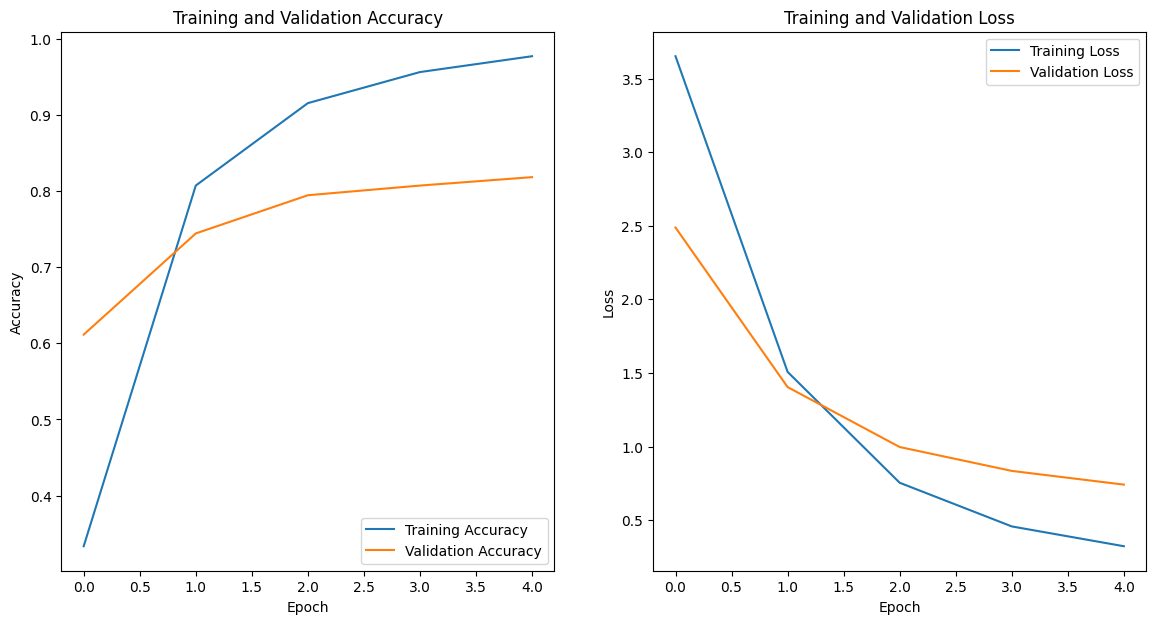

In [ ]:
def plot_model_loss_curves(history: tf.keras.callbacks.History) -> None:
  """Takes a History object and plots loss and accuracy curves."""

  # Get the accuracy values
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  # Get the loss values
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  # Get the number of epochs
  epochs_range = range(len(acc))

  # Create accuracy curves plot
  plt.figure(figsize=(14, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label="Training Accuracy")
  plt.plot(epochs_range, val_acc, label="Validation Accuracy")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")

  # Create loss curves plot
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label="Training Loss")
  plt.plot(epochs_range, val_loss, label="Validation Loss")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.show()

plot_model_loss_curves(history=history_0)

¡Woohoo! Qué curvas más bonitas.

Nuestro modelo está haciendo exactamente lo que nos gustaría.

La precisión aumenta y las pérdidas disminuyen.

### Overfitting (sobreajuste) y Underfitting (infraajuste) (cuando el modelo no funciona como nos gustaría)

Puede que te preguntes por qué hay un hueco entre las curvas de pérdidas de entrenamiento y validación.

Idealmente, las dos líneas deberían seguirse de cerca.

En nuestro caso, la pérdida de validación no disminuye tanto como la pérdida de entrenamiento.

Esto se conoce como [**sobreajuste**](https://developers.google.com/machine-learning/crash-course/generalization/peril-of-overfitting), un problema común en el aprendizaje automático en el que un modelo aprende muy bien los datos de entrenamiento pero no generaliza a otros datos no vistos.

Es como si un estudiante universitario memorizara los materiales del curso pero no pudiera aplicar esos conocimientos a problemas que no están en los materiales del curso (problemas del mundo real).

El reverso del Overfitting es el [**Underfitting**](https://developers.google.com/machine-learning/glossary), que es cuando un modelo no consigue aprender nada útil. Por ejemplo, nunca consigue aumentar la precisión o reducir las pérdidas.

La buena noticia es que nuestro modelo no está infraajustado (tiene una precisión del 80% en datos no vistos).

Dejaré «[ways to fix overfitting](https://developers.google.com/machine-learning/glossary#overfitting)» como extensión.

Pero una de las mejores formas es utilizar más datos.

¿Y adivina qué?

¡Tenemos muchos más!

Recordemos que estos resultados se obtuvieron utilizando sólo el 10% de los datos de entrenamiento.

Antes de entrenar un modelo con más datos, hay otra forma de evaluar rápidamente nuestro modelo en un conjunto de datos dado.

Y es utilizando el método [`tf.keras.Model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate).

¿Qué tal si lo probamos con nuestro `model_0`?

Guardaremos los resultados en la variable `model_0_results` para poder utilizarlos más tarde.

In [ ]:
# Evaluar model_0, ver: https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
model_0_results = model_0.evaluate(x=test_ds)
model_0_results

537/537 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8332 - loss: 0.7156


[0.741037905216217, 0.8185314536094666]

¡Precioso!

La evaluación de nuestro modelo en los datos de prueba muestra que está funcionando con una precisión de ~80% a pesar de ver sólo el 10% de los datos de entrenamiento.

También podemos obtener las métricas utilizadas por nuestro modelo con el atributo `metrics_names`.

In [ ]:
# Obtener el nombre de las métricas de nuestros modelo
model_0.metrics_names

['loss', 'compile_metrics']

## 9. Modelo 1 - Entrenar un modelo con el 100% de los datos de entrenamiento

Es hora de dar un paso más.

Hemos entrenado un modelo en el 10% de los datos de entrenamiento (para ver si funciona, ¡y funcionó!), ahora vamos a entrenar un modelo en el 100% de los datos de entrenamiento y ver qué pasa.

Pero antes...

¿Qué crees que ocurrirá?

Si nuestro modelo sólo funcionó bien con el 10% de los datos, ¿cómo crees que funcionará con el 100% de los datos?

Es bueno plantearse este tipo de preguntas en el mundo del aprendizaje automático.

Al fin y al cabo, por eso el lema del aprendizaje automático es *experimenta, experimenta, experimenta*.

Sigamos los tres pasos de antes:

1. Crear un modelo (usando nuestra función `create_model()`).
2. Compilar nuestro modelo (seleccionando nuestro optimizador, función de pérdida y métrica de evaluación).
3. Ajustar nuestro modelo (esta vez en el 100% de los datos durante 5 épocas).

> **Nota:** Ajustar nuestro modelo a una cantidad tan grande de datos llevará mucho tiempo sin una GPU. Si utilizas Google Colab, puedes acceder a una GPU a través de Runtime -> Change runtime type -> Hardware accelerator -> GPU.

In [ ]:
print(train_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.float32, name=None))>


In [ ]:
# Verificar el estado de memoria
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       3.6Gi       158Mi       8.0Gi       8.9Gi       785Mi
Swap:             0B          0B          0B


In [ ]:
# 1. Crear model_1 (la siguiente iteración de model_0)
model_1 = create_model(num_classes=len(class_names),
                       model_name="model_1")

# 2. Compilar modelo
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

# 3. Entrenar modelo
epochs=5
steps_per_epoch = 1000 // 8  # Procesar solo 1000 imágenes por época
history_1 = model_1.fit(x=train_ds,
                        epochs=epochs,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=test_ds)

Epoch 1/5


¡Guau!

¿Fue correcta tu intuición?

¿Sucedió realmente lo que pensaba que pasaría?

Parece que todos esos datos adicionales ayudaron bastante a nuestro modelo, ¡ahora funciona con una precisión cercana al 90 % en el conjunto de prueba!

> <details>
  <summary><b>Pregunta:</b> <i>¿Cuántas épocas debería entrenar?</i></summary>
  <p>Por lo general, con el aprendizaje por transferencia se pueden obtener resultados bastante buenos con bastante rapidez, sin embargo, es posible que desee mirar en el entrenamiento durante más tiempo (más épocas) como un experimento para ver si su modelo mejora o no. Lo que hemos realizado es una técnica de aprendizaje de transferencia llamada extracción de características, sin embargo, es posible que desee profundizar en <a href=«https://en.wikipedia.org/wiki/Fine-tuning_(deep_learning)»>fine-tuning</a> (entrenar todo el modelo con tu propio conjunto de datos) todo el modelo y utilizar callbacks (funciones que tienen lugar durante el entrenamiento del modelo) como <a href=«https://en.wikipedia.org/wiki/Early_stopping»>Early Stopping</a> para evitar que el modelo se entrene tanto tiempo que su rendimiento comience a degradarse.</p>
</details>

### Evaluar el modelo 1 en los datos de prueba

¿Qué tal si evaluamos nuestro `modelo_1`?

Primero vamos a trazar curvas de pérdidas con los datos contenidos en `history_1`.

In [ ]:
# Plot model_1 loss curves
plot_model_loss_curves(history=history_1)

Hmm, parece que nuestro modelo funcionó bien, sin embargo la precisión de validación y la pérdida parecieron aplanarse.

En cambio, la precisión y la pérdida de entrenamiento parecen seguir mejorando.

Esto es un signo de sobreajuste (el modelo funciona mucho mejor en el conjunto de entrenamiento que en el conjunto de validación/prueba).

Sin embargo, dado que nuestro modelo parece funcionar bastante bien, dejaré este problema de sobreajuste como un proyecto de investigación extracurricular.

Por ahora, vamos a evaluar nuestro modelo en el conjunto de datos de prueba utilizando el método `evaluate()`.

In [ ]:
# Evaluate model_1
model_1_results = model_1.evaluate(test_ds)

¡Genial!

Parece que esos datos adicionales aumentaron el rendimiento de nuestros modelos de ~80% en el conjunto de pruebas a ~90% en el conjunto de pruebas (nota: las cifras exactas pueden variar debido a la aleatoriedad inherente a los modelos de aprendizaje automático).

> <details>
  <summary><b>Extensión:</b> <i>Ponerlo todo junto</i></summary>
  <p>Como una extensión potencial, es posible que desee probar la práctica de poner todos los pasos que hemos pasado hasta ahora juntos. Es decir, cargar los datos, crear el modelo, compilar el modelo, ajustar el modelo y evaluar el modelo. Esta es una de las mejores maneras de aprender problemas de ML, replicando un sistema de principio a fin.
</p>
</details>


## 10. Hacer y evaluar predicciones del mejor modelo

Ahora que hemos entrenado un modelo, ¡es hora de hacer predicciones con él!

Ese es el objetivo del aprendizaje automático.

Entrenar un modelo sobre datos existentes, para hacer predicciones sobre nuevos datos.

Se supone que nuestros datos de prueba simulan datos nuevos, datos que nuestro modelo nunca ha visto antes.

Podemos hacer predicciones con el método [`tf.keras.Model.predict()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict), pasándole nuestra variable `test_ds` (abreviatura de test dataset).

In [ ]:
# This will output logits (as long as softmax activation isn't in the model)
test_preds = model_1.predict(test_ds)

# Note: If not using activation="softmax" in last layer of model, may need to turn them into prediction probabilities (easier to understand)
# test_preds = tf.keras.activations.softmax(tf.constant(test_preds), axis=-1)

Inspeccionemos nuestro `test_preds` comprobando primero su forma.

In [ ]:
test_preds.shape

Bien, parece que nuestra variable `test_pred` contiene 8580 valores (uno por cada muestra de prueba) con 120 elementos (un valor por cada clase de perro).

Inspeccionemos una sola predicción de prueba y veamos qué aspecto tiene.

In [ ]:
# Get a "random" variable between all of the test samples
random.seed(42)
random_test_index = random.randint(0, test_preds.shape[0] - 1)
print(f"[INFO] Random test index: {random_test_index}")

# Inspect a single test prediction sample
random_test_pred_sample = test_preds[random_test_index]

print(f"[INFO] Random test pred sample shape: {random_test_pred_sample.shape}")
print(f"[INFO] Random test pred sample argmax: {tf.argmax(random_test_pred_sample)}")
print(f"[INFO] Random test pred sample label: {dog_names[tf.argmax(random_test_pred_sample)]}")
print(f"[INFO] Random test pred sample max prediction probability: {tf.reduce_max(random_test_pred_sample)}")
print(f"[INFO] Random test pred sample prediction probability values:\n{random_test_pred_sample}")

Vale parece que cada muestra individual de nuestras predicciones de prueba es un tensor de probabilidades de predicción.

En esencia, cada elemento es una probabilidad entre 0 y 1 en cuanto a la confianza que nuestro modelo tiene en que la predicción sea correcta o no.

Una probabilidad de predicción de 1 significa que el modelo está seguro al 100% de que la muestra pertenece a esa clase.

Una probabilidad de predicción de 0 significa que el modelo no asigna ningún valor a esa clase en absoluto.

Y todos los demás valores se encuentran en el medio.

> **Nota:** El hecho de que la probabilidad de predicción de un modelo para una muestra concreta esté más cerca de 1 en una clase determinada (por ejemplo, 0,9999) no significa que sea *correcta*. Una predicción puede tener una probabilidad alta y, sin embargo, ser incorrecta. Veremos esto más adelante en la sección «más incorrecta».

El valor *máximo* de nuestro tensor de probabilidades de predicción es lo que el modelo considera que es la predicción más probable dada la muestra específica.

Tomamos el índice del valor máximo (utilizando `tf.argmax`) y el índice de la lista de nombres de perros para obtener el nombre de la clase predicha.

> **Nota:** [`tf.argmax`](https://www.tensorflow.org/api_docs/python/tf/math/argmax) o «argmax» para abreviar obtiene el índice de donde se produce el valor máximo en un tensor a lo largo de una dimensión especificada. Podemos utilizar [`tf.reduce_max`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_max) para obtener el valor máximo.

Para que nuestras predicciones sean más fáciles de comparar con el conjunto de datos de prueba, vamos a descomponer nuestro objeto `test_ds` en dos matrices separadas llamadas `test_ds_images` y `test_ds_labels`.

Podemos hacerlo recorriendo las muestras de nuestro objeto `test_ds` y añadiendo cada una de ellas a una lista (lo haremos con una comprensión de listas).

A continuación, podemos unir esas listas en una matriz con [`np.concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).


In [ ]:
import numpy as np

# Extract test images and labels from test_ds
test_ds_images = np.concatenate([images for images, labels in test_ds], axis=0)
test_ds_labels = np.concatenate([labels for images, labels in test_ds], axis=0)

# How many images and labels do we have?
len(test_ds_images), len(test_ds_labels)

Perfecto.

Ahora tenemos una forma de comparar nuestras predicciones sobre una imagen dada (en `test_ds_images`) con su etiqueta apropiada en `test_ds_labels`.

Esta es una de las principales razones por las que no barajamos el conjunto de datos de prueba.

Porque ahora nuestro tensor de predicciones tiene los mismos índices que nuestras matrices `test_ds_images` y `test_ds_labels`.

Lo que significa que si elegimos comparar la muestra número `42`, todo se alineará.

De hecho, vamos a intentarlo.

In [ ]:
# Set target index
target_index = 42 # try changing this to another value and seeing how the model performs on other samples

# Get test image
test_image = test_ds_images[target_index]

# Get truth label (index of max in test label)
test_image_truth_label = class_names[tf.argmax(test_ds_labels[target_index])]

# Get prediction probabilities
test_image_pred_probs = test_preds[target_index]

# Get index of class with highest prediction probability
test_image_pred_class = class_names[tf.argmax(test_image_pred_probs)]

# Plot the image
plt.figure(figsize=(5, 4))
plt.imshow(test_image.astype("uint8"))

# Create sample title with prediction probability value
title = f"""True: {test_image_truth_label}
Pred: {test_image_pred_class}
Prob: {np.max(test_image_pred_probs):.2f}"""

# Colour the title based on correctness of pred
plt.title(title,
          color="green" if test_image_truth_label == test_image_pred_class else "red")
plt.axis("off");

¡¡Woohoo!! ¡Mira esto!

Parece que nuestro modelo acertó en la predicción, según los datos de prueba, la muestra número `42` es de hecho un Affenpinscher.

Haciendo una rápida [búsqueda en Google de Affenpinscher](https://g.co/kgs/yxteUU2) parece que también aparecen perros de aspecto similar.

Nuestro modelo funciona.

Al menos para la muestra `42`...

Como ejercicio, podría intentar cambiar el índice objetivo anterior, quizás por su número favorito, y ver cómo funciona el modelo.

Pero también podríamos escribir algún código para probar varias muestras diferentes a la vez.

### Visualización de predicciones de nuestro modelo mejor entrenado

Podríamos sentarnos a mirar predicciones de una sola imagen de perros todo el día.

O podríamos escribir código para ver varias a la vez...

Hagamos esto último.

In [ ]:
# Choose a random 10 indexes from the test data and compare the values
import random

random.seed(42) # try changing the random seed or commenting it out for different values
random_indexes = random.sample(range(len(test_ds_images)), 10)

# Create a plot with multiple subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# Loop through the axes of the plot
for i, ax in enumerate(axes.flatten()):
  target_index = random_indexes[i] # get a random index (this is another reason we didn't shuffle the test set)

  # Get relevant target image, label, prediction and prediction probabilities
  test_image = test_ds_images[target_index]
  test_image_truth_label = class_names[tf.argmax(test_ds_labels[target_index])]
  test_image_pred_probs = test_preds[target_index]
  test_image_pred_class = class_names[tf.argmax(test_image_pred_probs)]

  # Plot the image
  ax.imshow(test_image.astype("uint8"))

  # Create sample title
  title = f"""True: {test_image_truth_label}
  Pred: {test_image_pred_class}
  Prob: {np.max(test_image_pred_probs):.2f}"""

  # Colour the title based on correctness of pred
  ax.set_title(title,
               color="green" if test_image_truth_label == test_image_pred_class else "red")
  ax.axis("off")

Woah, ¡parece que nuestro modelo lo hace bastante bien!

Intenta comentar la línea `random.seed()` e inspecciona unas cuantas fotos de perros más, ¡puede que te des cuenta de que el modelo no se equivoca demasiado!

### Finding the accruacy per class

La precisión global de nuestro modelo es de ~90%.

Se trata de un resultado sobresaliente.

Pero, ¿qué hay de la precisión por clase?

Por ejemplo, ¿cómo se comportó la clase «boxeador»?

¿O el `australian_terrier`?

En el sitio web original [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/), los autores indican la precisión por clase de cada una de las razas de perros. La clase con mejores resultados, «African_hunting_dog», obtuvo una precisión cercana al 60% (alrededor del 58% si no me equivoco al leer el gráfico).

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-stanford-dogs-dataset-results.png?raw=true" width=750 alt="
An image displaying a chart from the Stanford Dogs Dataset Paper (2011). The chart shows a range of accuracies for different dog breeds with two sets of training data, 15 and 100 instances, represented in purple and red bars, respectively. There are annotations indicating a mean accuracy of 22% and a maximum accuracy of approximately 58%. A text box suggests that replicating or improving a research paper is a good practice for machine learning and AI, stating 'Our goal: Let's try and beat it!' The chart and annotations are surrounded by a dotted green line with arrows pointing to the key areas."/>

*Resultados del documento original Stanford Dogs Dataset (2011). Veamos si el modelo que hemos entrenado obtiene mejores resultados que este.

¿Qué tal si intentamos replicar el mismo gráfico con nuestros propios resultados?

En primer lugar, vamos a crear un DataFrame con información sobre nuestras predicciones de prueba y muestras de prueba.

Empezaremos obteniendo el argmax de las predicciones de prueba, así como las etiquetas de prueba.

A continuación, obtendremos las probabilidades máximas de predicción de cada muestra.

Y lo pondremos todo en un DataFrame.

In [ ]:
# Get argmax labels of test predictions and test ground truth
test_preds_labels = test_preds.argmax(axis=-1)
test_ds_labels_argmax = test_ds_labels.argmax(axis=-1)

# Get highest prediction probability of test predictions
test_pred_probs_max = tf.reduce_max(test_preds, axis=-1).numpy() # extract NumPy since pandas doesn't handle TensorFlow Tensors

# Create DataFram of test results
test_results_df = pd.DataFrame({"test_pred_label": test_preds_labels,
                                "test_pred_prob": test_pred_probs_max,
                                "test_pred_class_name": [class_names[test_pred_label] for test_pred_label in test_preds_labels],
                                "test_truth_label": test_ds_labels_argmax,
                                "test_truth_class_name": [class_names[test_truth_label] for test_truth_label in test_ds_labels_argmax]})

# Create a column whether or not the prediction matches the label
test_results_df["correct"] = test_results_df["test_pred_class_name"] == test_results_df["test_truth_class_name"]

test_results_df.head()

¡Qué DataFrame más chulo!

Ahora podemos realizar más análisis.

Por ejemplo, obtener la precisión por clase.

Podemos hacerlo agrupando el `test_results_df` mediante la columna `«test_truth_class_name»` y luego tomando la media de la columna `«correct»`.

A continuación, podemos crear un nuevo DataFrame basado en esta vista y ordenar los valores por corrección (por ejemplo, las clases con el rendimiento más alto deben estar en la parte superior).

In [ ]:
# Calculate accuracy per class
accuracy_per_class = test_results_df.groupby("test_truth_class_name")["correct"].mean()

# Create new DataFrame to sort classes by accuracy
accuracy_per_class_df = pd.DataFrame(accuracy_per_class).reset_index().sort_values("correct", ascending=False)
accuracy_per_class_df.head()

¡Vaya! Parece que tenemos unas cuantas clases de perros con una precisión cercana (o exacta) al 100%.

¡Eso es sobresaliente!

Ahora vamos a recrear el gráfico de barras horizontales utilizado en la página original del trabajo de investigación sobre perros de Stanford.

In [ ]:
# Let's create a horizontal bar chart to replicate a similar plot to the original Stanford Dogs page
plt.figure(figsize=(10, 17))
plt.barh(y=accuracy_per_class_df["test_truth_class_name"],
         width=accuracy_per_class_df["correct"])
plt.xlabel("Accuracy")
plt.ylabel("Class Name")
plt.title("Dog Vision Accuracy per Class")
plt.ylim(-0.5, len(accuracy_per_class_df["test_truth_class_name"]) - 0.5)  # Adjust y-axis limits to reduce white space
plt.gca().invert_yaxis()  # This will display the first class at the top
plt.tight_layout()
plt.show()

Parece que nuestro modelo funciona increíblemente bien en la gran mayoría de las clases.

Si lo comparamos con el [gráfico de barras horizontales de Stanford Dogs](http://vision.stanford.edu/aditya86/ImageNetDogs/bar_graph_full.png) original, podemos ver que su clase con *mejor* rendimiento obtuvo una precisión cercana al 60%.

Sin embargo, sólo cuando echamos un vistazo a nuestras *peores* clases vemos un puñado de clases por debajo del 60% de precisión.

In [ ]:
# Inspecting our worst performing classes (note how only a couple of classes perform at ~55% accuracy or below)
accuracy_per_class_df.tail()

¡Qué resultado tan asombroso!

Hemos reproducido e incluso mejorado enormemente un trabajo de investigación de Stanford.

Deberíais estar orgullosos.

Ahora que hemos visto lo bien que funciona nuestro modelo, ¿qué tal si comprobamos dónde funciona mal?

### Encontrar los ejemplos más erróneos

Una buena forma de inspeccionar los errores de sus modelos es encontrar los ejemplos en los que la predicción tenía una alta probabilidad pero la predicción fue errónea.

Esto suele denominarse los ejemplos «más erróneos».

Es decir, el modelo tenía mucha confianza, pero se equivocó.

Filtremos las 100 más erróneas ordenando las predicciones incorrectas por la columna `«test_pred_prob»`.

Traducción realizada con la versión gratuita del traductor DeepL.com

In [ ]:
# Get most wrong
top_100_most_wrong = test_results_df[test_results_df["correct"] == 0].sort_values("test_pred_prob", ascending=False)[:100]
top_100_most_wrong.head()

Una forma de inspeccionar estas predicciones más erróneas sería repasar las distintas razas una por una y ver por qué el modelo las habría confundido.

Por ejemplo, comparando el `pinscher_miniatura` con el `doberman` (dos razas de perro de aspecto bastante similar).

Otra posibilidad es tomar 10 muestras al azar y trazarlas para ver qué aspecto tienen.

Hagamos esto último.

In [ ]:
# Obtener 10 índices aleatorios de predicciones «más erróneas
top_100_most_wrong.sample(n=10).index

¿Qué tal si trazamos estos índices?

In [ ]:
# Elegir al azar 10 índices de los datos de prueba y compara los valores
import random

random_most_wrong_indexes = top_100_most_wrong.sample(n=10).index

# Iterar a través de los resultados de la prueba y trazarlos
# Nota: Por eso no barajamos los datos de la prueba, para que estén en el orden original cuando los evaluemos.
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  target_index = random_most_wrong_indexes[i]

  # Obtener la imagen de destino relevante, la etiqueta, la predicción y las probabilidades de predicción
  test_image = test_ds_images[target_index]
  test_image_truth_label = class_names[tf.argmax(test_ds_labels[target_index])]
  test_image_pred_probs = test_preds[target_index]
  test_image_pred_class = class_names[tf.argmax(test_image_pred_probs)]

  # Trazar la imagen
  ax.imshow(test_image.astype("uint8"))

  # Crear el título de la muestra
  title = f"""True: {test_image_truth_label}
  Pred: {test_image_pred_class}
  Prob: {np.max(test_image_pred_probs):.2f}"""

  # Colorear el título en función de la correción de pred
  ax.set_title(title,
               color="green" if test_image_truth_label == test_image_pred_class else "red",
               fontsize=10)
  ax.axis("off")

Inspeccionando los ejemplos "más erróneos", es fácil ver dónde se confundió el modelo.

Estos ejemplos pueden mostrarnos dónde podríamos querer recopilar más datos o corregir las etiquetas de nuestros datos.

Hablando de confusión, ¿qué tal si hacemos una matriz de confusión para una evaluación posterior?

### Crear una matriz de confusión

Una matriz de confusión ayuda a visualizar qué clases predijo un modelo en comparación con las clases que debería haber predicho (verdad frente a predicciones).

Podemos crear una usando [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) de Scikit-Learn y pasando nuestros valores `y_true` y `y_pred`.

Y luego podemos mostrarla usando [`sklearn.metrics.ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).

> **Nota:** Como tenemos 120 clases diferentes, ejecutar el código de abajo para mostrar la matriz de confusión puede tardar un minuto o así en cargarse (¡es un gráfico bastante grande!).

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear matriz de confusión
confusion_matrix_dog_preds = confusion_matrix(y_true=test_ds_labels_argmax, # exige que todas las etiquetas tengan el mismo formato (por ejemplo, que no sean one-hot)
                                              y_pred=test_preds_labels)
# Crear gráfico de la matriz de confusión
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dog_preds,
                                                  display_labels=class_names)
fig, ax = plt.subplots(figsize=(25, 25))
ax.set_title("Dog Vision Confusion Matrix")
confusion_matrix_display.plot(xticks_rotation="vertical",
                              cmap="Blues",
                              colorbar=False,
                              ax=ax);

Esto sí que es una matriz de confusión.

Parece que la mayoría de las casillas azules más oscuras están en la diagonal central (como nos gustaría).

Pero hay algunos casos en los que el modelo confunde clases como [`scottish_deerhound`](https://www.google.com/search?q=scottish+deerhound) y [`irish_wolfhound`](https://www.google.com/search?q=irish+wolfhound).

Y buscando esas dos razas podemos ver que son visualmente similares.

## 11. Guardar y cargar el mejor modelo

Hemos cubierto mucho terreno, desde la carga de datos hasta el entrenamiento y la evaluación de un modelo.

Pero, ¿y si quisieras utilizar ese modelo en otro lugar?

¿Por ejemplo, en un sitio web o en una aplicación?

El primer paso es guardarlo en un archivo.

Podemos guardar nuestro modelo utilizando el método [`tf.keras.Model.save()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#save) y especificando los parámetros `filepath` y `save_format`.

Utilizaremos `filepath="dog_vision_model.keras"` y `save_format="keras'` para guardar nuestro modelo en el nuevo y versátil formato `.keras`.

Vamos a guardar nuestro mejor modelo `model_1`.

> **Nota:** También puedes ver modelos guardados con el formato `SavedModel` así como formatos `HDF5`, sin embargo, se recomienda utilizar el nuevo formato `.keras`. Consulta la documentación de TensorFlow sobre [guardar y cargar un modelo](https://www.tensorflow.org/tutorials/keras/save_and_load#new_high-level_keras_format) para más información.

In [ ]:
# Guarde el modelo en .keras
model_save_path = "dog_vision_model.keras"
model_1.save(filepath=model_save_path,
             save_format="keras")

¡Modelo guardado!

Y podemos cargarlo de nuevo usando el método [`tf.keras.models.load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/saving/load_model).

In [ ]:
# Cargar el modelo
loaded_model = tf.keras.models.load_model(filepath=model_save_path)

Y ahora podemos evaluar nuestro `loaded_model` para asegurarnos de que funciona bien en el conjunto de datos de prueba.

In [ ]:
# Evaluar el modelo cargado
loaded_model_results = loaded_model.evaluate(test_ds)

¿Qué tal si comprobamos si los `loaded_model_results` son los mismos que los `model_1_results`?

In [ ]:
assert model_1_results == loaded_model_results

¡Nuestro modelo entrenado y los resultados del modelo cargado son los mismos!

Ahora podemos utilizar nuestro archivo `dog_vision_model.keras` en una aplicación para predecir la raza de un perro basándonos en una imagen.

> **Nota:** Si estás usando Google Colab, recuerda que después de un periodo de tiempo si tu instancia de Google Colab se desconecta, borrará todos los archivos locales. Así que si quieres conservar tu `dog_vision_model.keras` asegúrate de descargarlo o copiarlo a Google Drive.

## 12. Hacer predicciones en imágenes personalizadas con el mejor modelo

Ahora, ¿qué gracia tendría que sólo hiciéramos predicciones sobre el conjunto de datos de prueba?

¿Qué tal si vemos cómo va nuestro modelo en imágenes del mundo real?

Ese es el objetivo del aprendizaje automático, ¿verdad? ¿Ver cómo funciona tu modelo en el mundo real?

Pues bien, ¡hagamos algunas predicciones con imágenes personalizadas!

En concreto, vamos a probar nuestro mejor modelo en imágenes de mis perros (Bella 🐶 y Seven 7️⃣, sí, Seven es su nombre real) y una imagen comodín extra.

Podemos descargar las fotos desde el [curso GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/images/dog-photos.zip).

In [ ]:
# Download a set of custom images from GitHub and unzip them
!wget -nc https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/images/dog-photos.zip
!unzip dog-photos.zip

Maravilloso. Podemos inspeccionar nuestras imágenes en el explorador de archivos y ver que están bajo el nombre `dog-photo-*.jpeg`.

¿Qué tal si iteramos a través de ellas y visualizamos cada una?

In [ ]:
# Crear una lista de rutas para imágenes de perros personalizadas
custom_image_paths = ["dog-photo-1.jpeg",
                      "dog-photo-2.jpeg",
                      "dog-photo-3.jpeg",
                      "dog-photo-4.jpeg"]

# Recorrer la lista de imágenes de perros y trazar cada una de ellas
fig, axes = plt.subplots(1, 4, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(plt.imread(custom_image_paths[i]))
  ax.axis("off")
  ax.set_title(custom_image_paths[i])

¿Qué?

Las tres primeras fotos tienen buena pinta, pero podemos ver que `dog-photo-4.jpeg` es una foto mía con una sudadera negra con capucha y una cara de [blue steel](https://www.google.com/search?q=blue+steel).

Más adelante veremos por qué.

Por ahora, utilicemos nuestro `loaded_model` para intentar hacer una predicción sobre la primera imagen del perro (`dog-photo-1.jpeg`).

Podemos hacerlo con el método `predict()`.

In [ ]:
# Intentar hacer una predicción sobre la primera imagen del perro
loaded_model.predict("dog-photo-1.jpeg")

¡Oh, no!

Tenemos un error:

`IndexError: tuple index out of range`

Esto es un poco difícil de entender. Pero podemos ver que el código está tratando de obtener la forma de nuestra imagen.

Sin embargo, no pasamos una imagen al método `predict()`.

Sólo pasamos una ruta de archivo.

Nuestro modelo espera entradas en el mismo formato en el que fue entrenado.

Así que vamos a cargar nuestra imagen y cambiar su tamaño.

Podemos hacerlo con [`tf.keras.utils.load_img()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img).

In [ ]:
# Cargar la imagen (en formato PIL)
custom_image = tf.keras.utils.load_img(
  path="dog-photo-1.jpeg",
  color_mode="rgb",
  target_size=IMG_SIZE, # (224, 224) or (img_height, img_width)
)

type(custom_image), custom_image

Excelente, hemos cargado nuestra primera imagen personalizada.

Pero ahora vamos a convertir nuestra imagen en un tensor (nuestro modelo fue entrenado en tensores de imagen, por lo que espera tensores de imagen como entrada).

Podemos convertir nuestra imagen de formato PIL a formato array con [`tf.keras.utils.img_to_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array).

In [ ]:
# Convertir la imagen en un tensor
custom_image_tensor = tf.keras.utils.img_to_array(custom_image)
custom_image_tensor.shape

¡Qué bien! Tenemos un tensor de imagen de forma `(224, 224, 3)`.

¿Qué tal si hacemos una predicción sobre él?

In [ ]:
# Make a prediction on our custom image tensor
loaded_model.predict(custom_image_tensor)

¿Qué?

Tenemos otro error...

`ValueError: Input 0 of layer «model_1» is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)`

Hmm.

Parece que nuestro modelo está esperando una dimensión de tamaño de lote en nuestro tensor de entrada.

Podemos hacerlo convirtiendo el tensor de entrada en una matriz de un solo elemento o utilizando [`tf.expand_dims(input, axis=0)`](https://www.tensorflow.org/api_docs/python/tf/expand_dims) para expandir la dimensión del tensor en el eje 0.

In [ ]:
# Opción 1: Añadir dimensión de lote a custom_image_tensor
print(f"Shape of custom image tensor: {np.array([custom_image_tensor]).shape}")
print(f"Shape of custom image tensor: {tf.expand_dims(custom_image_tensor, axis=0).shape}")

¡Genial! Ahora tenemos un tensor de imagen personalizado de forma `(1, 224, 224, 3)` (`(batch_size, img_height, img_width, colour_channels)`).

¡Intentemos predecir!

In [ ]:
# Obtenga las probabilidades de predicción de nuestro mdoel
pred_probs = loaded_model.predict(tf.expand_dims(custom_image_tensor, axis=0))
pred_probs

Funcionó.

Nuestro modelo produce un tensor de probabilidades de predicción.

Podemos encontrar la etiqueta predicha tomando el argmax del tensor `pred_probs`.

Y obtenemos el nombre de la clase predicha indexando en la lista `class_names` usando la etiqueta predicha.

In [ ]:
# Get the predicted class label
pred_label = tf.argmax(pred_probs, axis=-1).numpy()[0]

# Get the predicted class name
pred_class_name = class_names[pred_label]

print(f"Predicted class label: {pred_label}")
print(f"Predicted class name: {pred_class_name}")

¡Qué buena pinta!

En resumen, **un modelo quiere hacer predicciones sobre datos con la misma forma y formato con los que fue entrenado**.

Por tanto, si has entrenado un modelo en tensores de imagen con una forma y un tipo de datos determinados, tu modelo querrá hacer predicciones en el mismo tipo de tensores de imagen con la misma forma y tipo de datos.

¿Qué tal si intentamos hacer predicciones sobre varias imágenes?

Para ello, vamos a crear una función que reproduzca el flujo de trabajo anterior.

In [ ]:
def pred_on_custom_image(image_path: str,  # Path to the image file
                         model,  # Trained TensorFlow model for prediction
                         target_size: tuple[int, int] = (224, 224),  # Desired size of the image for input to the model
                         class_names: list = None,  # List of class names (optional for plotting)
                         plot: bool = True): # Whether to plot the image and predicted class
  """
  Carga una imagen, la preprocesa, hace una predicción usando un modelo proporcionado,
  y, opcionalmente, representa la imagen con la clase predicha.

  Args:
      ruta_imagen (str): Ruta al archivo de imagen.
      modelo: Modelo TensorFlow entrenado para la predicción.
      target_size (int, opcional): Tamaño deseado de la imagen para la entrada al modelo. Por defecto es 224.
      class_names (lista, opcional): Lista de nombres de clase para el trazado. Por defecto None.
      plot (bool, opcional): Si se traza la imagen y la clase predicha. Por defecto es True.

  Devuelve:
     str: La clase predicha.
  """

  # Prepare and load image
  custom_image = tf.keras.utils.load_img(
    path=image_path,
    color_mode="rgb",
    target_size=target_size,
  )

  # Turn the image into a tensor
  custom_image_tensor = tf.keras.utils.img_to_array(custom_image)

  # Add a batch dimension to the target tensor (e.g. (224, 224, 3) -> (1, 224, 224, 3))
  custom_image_tensor = tf.expand_dims(custom_image_tensor, axis=0)

  # Make a prediction with the target model
  pred_probs = model.predict(custom_image_tensor)

  # pred_probs = tf.keras.activations.softmax(tf.constant(pred_probs))
  pred_class = class_names[tf.argmax(pred_probs, axis=-1).numpy()[0]]

  # Plot if we want
  if not plot:
    return pred_class, pred_probs
  else:
    plt.figure(figsize=(5, 3))
    plt.imshow(plt.imread(image_path))
    plt.title(f"pred: {pred_class}\nprob: {tf.reduce_max(pred_probs):.3f}")
    plt.axis("off")

¡Qué función más bonita!

¿Qué tal si la probamos con `dog-photo-2.jpeg`?

In [ ]:
# Make prediction on custom dog photo 2
pred_on_custom_image(image_path="dog-photo-2.jpeg",
                     model=loaded_model,
                     class_names=class_names)

¡¡¡Woohoo!!! ¡Nuestra modelo ha acertado!

Repitamos el proceso para nuestras otras imágenes personalizadas.

In [ ]:
# Predict on multiple images
fig, axes = plt.subplots(1, 4, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  image_path = custom_image_paths[i]
  pred_class, pred_probs = pred_on_custom_image(image_path=image_path,
                                                model=loaded_model,
                                                class_names=class_names,
                                                plot=False)
  ax.imshow(plt.imread(image_path))
  ax.set_title(f"pred: {pred_class}\nprob: {tf.reduce_max(pred_probs):.3f}")
  ax.axis("off");

¡¡¡Épico!!!

Nuestro modelo Dog Vision 🐶👁 ¡ha cobrado vida!

Parece que nuestra modelo acertó en 3/4 de nuestras fotos de perros personalizadas (mis perros Bella y Seven son labradores retrievers, con una posible mezcla de algo más).

Pero el modelo también parecía pensar que la foto de mí era un [`soft_coated_wheaten_terrier`](https://www.google.com/search?q=soft+coated+wheaten+terrier) (**nota:** debido a la aleatoriedad del aprendizaje automático, tu resultado puede ser diferente aquí, si es así, por favor házmelo saber, me encantaría ver qué otros tipos de perros piensa el modelo que soy :D).

Quizá te preguntes por qué lo hace.

Porque nuestro modelo ha sido estrictamente entrenado para predecir *siempre* una raza de perro, independientemente de la imagen que reciba.

Así que no importa qué imagen pasemos a nuestro modelo, *siempre* predecirá una determinada raza de perro.

Puedes probarlo con tus propias imágenes.

¿Cómo solucionarlo?

Una forma sería entrenar otro modelo para predecir si la imagen de entrada es de un perro o *no* es de un perro.

Y luego sólo dejar que nuestro modelo Dog Vision 🐶👁 prediga en las imágenes que son de perros.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-combining-models-for-deployment.png?raw=true" width=750 alt="Two smartphones displaying apps that differentiate between food and non-food items. The left phone shows an app with a message 'No Food Detected' over an image of a computer mouse. The right phone displays a different app with a message 'Food Detected' above a photo of a breakfast plate with a Danish and a cup of coffee. Text emphasizes the need to combine models or workflows for accurate detection."/>

*Ejemplo de combinación de varios modelos de aprendizaje automático para crear un flujo de trabajo. Un modelo para detectar comida (Food Not Food) y otro para identificar qué comida hay en la imagen (FoodVision, similar a Dog Vision). Si una aplicación está diseñada para hacer fotos de comida, hacer fotos de objetos que no son comida y que se identifiquen como tal puede ser una mala experiencia para el cliente. Fuente: [Nutrify](https://nutrify.app/).*

Estos son algunos de los flujos de trabajo en los que tendrás que pensar cuando acabes desplegando tus propios modelos de aprendizaje automático.

Los modelos de aprendizaje automático suelen ser muy potentes.

Pero no son perfectos.

Implementar pautas y comprobaciones en torno a ellos sigue siendo un área de investigación muy activa.

## 13. Puntos clave

* **¡Datos, datos, datos!** En cualquier problema de aprendizaje automático, obtener un conjunto de datos y prepararlo para que esté en un formato utilizable será probablemente el primer paso y, a menudo, el más importante (de ahí que hayamos dedicado tanto tiempo a preparar los datos). También será un proceso continuo, ya que aunque hemos trabajado con miles de imágenes de perros, nuestros modelos aún pueden mejorarse. Y como vimos al pasar de entrenar con el 10% de los datos al 100% de los datos, una de las mejores formas de mejorar un modelo es con más datos. Explora tus datos pronto y con frecuencia.
* Para la mayoría de los nuevos problemas, por lo general hay que ver si existe un modelo preentrenado y ver si se puede adaptar a su caso de uso. Pregúntese: ¿En qué formato están mis datos? ¿Cuáles son mis entradas y salidas ideales? ¿Existe un modelo preentrenado para mi caso de uso?
* **TensorFlow y Keras proporcionan bloques de construcción** para redes neuronales, que son potentes modelos de aprendizaje automático capaces de aprender patrones en una amplia gama de datos, desde texto hasta audio o imágenes, entre otros.
* **TensorFlow and Keras provide building blocks** for neural networks which are powerful machine learning models capable of learning patterns in a wide range of data from text to audio to images and more.


## Extensiones y ejercicios

A continuación te ofrecemos una serie de ejercicios y ampliaciones que se basan en lo que hemos aprendido en este módulo.

Te recomiendo encarecidamente que repases cada uno de ellos y dediques tiempo a practicar lo que has aprendido.

Aquí es donde se construye el verdadero conocimiento. Prueba las cosas por ti mismo.

1. Pruebe una predicción con nuestro modelo entrenado en sus propias imágenes de perros y vea si el modelo es correcto.
2. Intenta entrenar otro modelo de `tf.keras.applications` (por ejemplo, [ConvNeXt](https://www.tensorflow.org/api_docs/python/tf/keras/applications/convnext)) y comprueba si funciona mejor que EfficientNetV2.
3. Intenta entrenar un modelo con tus propias imágenes en diferentes clases, por ejemplo, manzana vs. plátano vs. naranja. Puedes descargar imágenes de Internet y ordenarlas en diferentes carpetas y luego cargarlas como hemos hecho en la sección de carga de datos. O podrías tomar fotos propias y construir un modelo para diferenciarlas.
4. Para el entrenamiento de modelos más avanzados, es posible que desee mirar en el concepto de «Callbacks», estas son funciones que se ejecutan durante el entrenamiento del modelo. TensorFlow y Keras tienen una serie de callbacks incorporados que pueden ser útiles para el entrenamiento. Echa un vistazo a la documentación [`tf.keras.callbacks.Callback`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback) y mira cuáles pueden serte útiles.
5. Cuando entrenamos nuestro modelo, nos referimos al concepto de sobreajuste. Esto ocurre cuando un modelo funciona mucho mejor en el conjunto de entrenamiento que en el conjunto de prueba. El concepto de intentar evitar el sobreajuste se conoce como regularización. Dedica 20 minutos a investigar «formas de evitar el sobreajuste» y escribe una lista de 2 ó 3 técnicas y cómo podrían entrar en juego en el entrenamiento de nuestro modelo. Consejo: Una de las técnicas de regularización más comunes en visión por computador es [aumento de datos](https://www.tensorflow.org/tutorials/images/data_augmentation) (ver también el breve ejemplo a continuación).
6. Una de las partes más importantes del aprendizaje automático es disponer de buenos datos. La siguiente parte más importante es cargar esos datos de manera que puedan utilizarse para entrenar modelos de la forma más rápida y eficiente posible. Para más información sobre esto, recomiendo encarecidamente leer más sobre la [`tf.data` API](https://www.tensorflow.org/guide/data) (esta API está enfocada a TensorFlow, sin embargo, los conceptos se pueden aplicar a otras necesidades de carga de datos), así como revisar las [`tf.data` best practices](https://www.tensorflow.org/guide/data_performance) (mejor rendimiento con la API `tf.data`).
7. Ahora mismo nuestro modelo funciona bien, pero tenemos que escribir código para interactuar con él. Podrías convertirlo en una pequeña aplicación de aprendizaje automático utilizando [Gradio](https://www.gradio.app/) para que la gente pueda subir sus propias imágenes de perros y ver lo que predice el modelo. Mira el [ejemplo de clasificación de imágenes con TensorFlow y Keras](https://www.gradio.app/guides/image-classification-in-tensorflow) para tener una idea de lo que podrías construir. Vea un ejemplo de esto a continuación, así como una [demo de Dog Vision on Hugging Face](https://huggingface.co/spaces/mrdbourke/dog_vision).

En este proyecto sólo hemos arañado la superficie de lo que es posible con TensorFlow/Keras y el aprendizaje profundo.

Para una visión más completa de TensorFlow/Keras, consulte lo siguiente:
* [14-hour TensorFlow Tutorial on YouTube](https://youtu.be/tpCFfeUEGs8?si=HqWQ9BdLkV6YWgcF) (se trata de las primeras 14 horas del curso ZTM TensorFlow).
* [Zero to Mastery TensorFlow for Deep Learning course](https://dbourke.link/ZTMTFcourse) (un curso de más de 50 horas que profundiza en muchas aplicaciones de TensorFlow y aprendizaje profundo).


### Ejemplo de ampliación: aumento de datos

El aumento de datos es una técnica de regularización que ayuda a evitar el sobreajuste.

Está diseñada para alterar las imágenes de entrenamiento con el fin de aumentar artificialmente la diversidad del conjunto de datos de entrenamiento y, con un poco de suerte, ayudar a generalizar mejor las imágenes de prueba, así como las imágenes de la vida real.

Por ejemplo, queremos que nuestros modelos sean capaces de identificar la misma raza de perro en una imagen independientemente de si el perro mira a la izquierda o a la derecha.

Una técnica sencilla de aumento de datos consiste en girar la imagen horizontalmente de forma aleatoria para que el modelo aprenda a reconocer el mismo perro desde distintos puntos de vista.

Esto se puede repetir para muchos tipos diferentes de modificaciones de la imagen, como rotación, zona, alteraciones del color, etc.

El siguiente código es un breve ejemplo de cómo incorporar una capa de aumento de datos a un modelo (tenga en cuenta que, en la práctica, el aumento de datos sólo se aplica durante el tiempo de entrenamiento y no durante el tiempo de prueba/predicción, esto se establece automáticamente dentro de las capas destinadas al aumento de datos).

Para más información, consulte la [Guía TensorFlow sobre el aumento de datos](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [ ]:
from tensorflow.keras import layers

# Note: Could functionize all of this

# Setup hyperparameters
img_size = 224
num_classes = 120

# Create data augmentation layer
data_augmentation_layer = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"), # randomly flip image across horizontal axis
        layers.RandomRotation(factor=0.2), # randomly rotate image
        layers.RandomZoom(height_factor=0.2, width_factor=0.2) # randomly zoom into image
        # More augmentation can go here
    ],
    name="data_augmentation"
)

# Setup base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=(img_size, img_size, 3),
    include_preprocessing=True
)

# Freeze the base model
base_model.trainable = False

# Create new model
inputs = tf.keras.Input(shape=(224, 224, 3))

# Create data augmentation
x = data_augmentation_layer(inputs)

# Craft model
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(num_classes,
                                name="output_layer",
                                activation="softmax")(x) # Note: If you have "softmax" activation, use from_logits=False in loss function
model_2 = tf.keras.Model(inputs, outputs, name="model_2")

# Uncomment for full model summary with augmentation layers
# model_2.summary()

### Ejemplo de extensión: Gradio App Demo

Esta es una versión modificada del [Gradio Image Classification Tutorial with TensorFlow and Keras](https://www.gradio.app/guides/image-classification-in-tensorflow).

Puedes ver una [guía en Hugging Face](https://huggingface.co/blog/gradio-spaces) para saber cómo alojarlo en Hugging Face Spaces (un lugar donde puedes alojar y compartir tus apps de machine learning).

Primero [instalaremos Gradio](https://www.gradio.app/guides/quickstart).

In [ ]:
!pip install -q gradio
import gradio as gr

Luego descargaremos el modelo guardado (el mismo modelo que entrenamos durante el cuaderno Visión canina) junto con las etiquetas asociadas.

He almacenado mi modelo guardado, así como los nombres de las clases de Stanford Dogs en Hugging Face.

Puedes ver mis archivos en [`huggingface.co/spaces/mrdbourke/dog_vision`](https://huggingface.co/spaces/mrdbourke/dog_vision/tree/main).

In [ ]:
import tensorflow as tf

# Download saved model and labels from Hugging Face
!wget -q https://huggingface.co/spaces/mrdbourke/dog_vision/resolve/main/dog_vision_model_demo.keras
!wget -q https://huggingface.co/spaces/mrdbourke/dog_vision/resolve/main/stanford_dogs_class_names.txt

# Load model
model_save_path = "dog_vision_model_demo.keras"
loaded_model_for_demo = tf.keras.models.load_model(model_save_path)

# Load labels
with open("stanford_dogs_class_names.txt", "r") as f:
  class_names = [line.strip() for line in f.readlines()]

La función de predicción debe tomar una imagen y devolver un diccionario de clases y sus probabilidades de predicción.

In [ ]:
# Create prediction function
def pred_on_custom_image(image, # input image (preprocessed by Gradio's Image input to be numpy.array)
                         model: tf.keras.Model = loaded_model_for_demo,  # Trained TensorFlow model for prediction
                         target_size: int = 224,  # Desired size of the image for input to the model
                         class_names: list = class_names): # List of class names
  """
  Loads an image, preprocesses it, makes a prediction using a provided model,
  and returns a dictionary of prediction probabilities per class name.

  Args:
      image: Input image.
      model: Trained TensorFlow model for prediction.
      target_size (int, optional): Desired size of the image for input to the model. Defaults to 224.
      class_names (list, optional): List of class names for plotting. Defaults to None.

  Returns:
     Dict[str: float]: A dictionary of string class names and their respective prediction probability.
  """

  # Note: gradio.inputs.Image handles opening the image
  # # Prepare and load image
  # custom_image = tf.keras.utils.load_img(
  #   path=image_path,
  #   color_mode="rgb",
  #   target_size=target_size,
  # )

  # Create resizing layer to resize the image
  resize = tf.keras.layers.Resizing(height=target_size,
                                    width=target_size)

  # Turn the image into a tensor and resize it
  custom_image_tensor = resize(tf.keras.utils.img_to_array(image))

  # Add a batch dimension to the target tensor (e.g. (224, 224, 3) -> (1, 224, 224, 3))
  custom_image_tensor = tf.expand_dims(custom_image_tensor, axis=0)

  # Make a prediction with the target model
  pred_probs = model.predict(custom_image_tensor)[0]

  # Predictions get returned as a dictionary of {label: pred_prob}
  pred_probs_dict = {class_names[i]: float(pred_probs[i]) for i in range(len(class_names))}

  return pred_probs_dict

interface_title = "Dog Vision 🐶👁️"
interface_description = "Identify different dogs in images with deep learning. Model trained with TensorFlow/Keras."
interface = gr.Interface(fn=pred_on_custom_image,
                         inputs=gr.Image(),
                         outputs=gr.Label(num_top_classes=3),
                         examples=["dog-photo-1.jpeg",
                                    "dog-photo-2.jpeg",
                                    "dog-photo-3.jpeg",
                                    "dog-photo-4.jpeg"],
                         title=interface_title,
                         description=interface_description)

# Uncomment to launch the interface directly in a notebook
# interface.launch(debug=True)

Guarda el siguiente código en un archivo `app.py` para ejecutarlo en los espacios Hugging Face.

Por último, puedes ver la [demo en ejecución en Hugging Face](https://huggingface.co/spaces/mrdbourke/dog_vision).

Pruébalo con tus propias imágenes de perros y verás cómo Dog Vision 🐶👁️ cobra vida.

In [ ]:
from IPython.display import HTML

# Embed the Hugging Face Space as an iframe
html_string = """
<iframe src="https://mrdbourke-dog-vision.hf.space" frameborder="0" width="850" height="850"></iframe>
"""

display(HTML(html_string))

The following will write the whole cell to a Python file called `app.py`, this can uploaded to Hugging Face and run as a Space. As long as all available files (e.g. model file and class names file) are available.

In [ ]:
# %%writefile app.py
# import gradio as gr
# import tensorflow as tf

# # Load model
# model_save_path = "dog_vision_model_demo.keras"
# loaded_model_for_demo = tf.keras.models.load_model(model_save_path)

# # Load labels
# with open("stanford_dogs_class_names.txt", "r") as f:
#   class_names = [line.strip() for line in f.readlines()]

# # Create prediction function
# def pred_on_custom_image(image, # input image (preprocessed by Gradio's Image input to be numpy.array)
#                          model: tf.keras.Model =loaded_model_for_demo,  # Trained TensorFlow model for prediction
#                          target_size: int = 224,  # Desired size of the image for input to the model
#                          class_names: list = class_names): # List of class names
#   """
#   Loads an image, preprocesses it, makes a prediction using a provided model,
#   and returns a dictionary of prediction probabilities per class name.

#   Args:
#       image: Input image.
#       model: Trained TensorFlow model for prediction.
#       target_size (int, optional): Desired size of the image for input to the model. Defaults to 224.
#       class_names (list, optional): List of class names for plotting. Defaults to None.

#   Returns:
#      Dict[str: float]: A dictionary of string class names and their respective prediction probability.
#   """

#   # Note: gradio.inputs.Image handles opening the image
#   # # Prepare and load image
#   # custom_image = tf.keras.utils.load_img(
#   #   path=image_path,
#   #   color_mode="rgb",
#   #   target_size=target_size,
#   # )

#   # Create resizing layer to resize the image
#   resize = tf.keras.layers.Resizing(height=target_size,
#                                     width=target_size)

#   # Turn the image into a tensor and resize it
#   custom_image_tensor = resize(tf.keras.utils.img_to_array(image))

#   # Add a batch dimension to the target tensor (e.g. (224, 224, 3) -> (1, 224, 224, 3))
#   custom_image_tensor = tf.expand_dims(custom_image_tensor, axis=0)

#   # Make a prediction with the target model
#   pred_probs = model.predict(custom_image_tensor)[0]

#   # Predictions get returned as a dictionary of {label: pred_prob}
#   pred_probs_dict = {class_names[i]: float(pred_probs[i]) for i in range(len(class_names))}

#   return pred_probs_dict

# # Create Gradio interface
# interface_title = "Dog Vision 🐶👁️"
# interface_description = "Identify different dogs in images with deep learning. Model trained with TensorFlow/Keras."
# interface = gr.Interface(fn=pred_on_custom_image,
#                          inputs=gr.Image(),
#                          outputs=gr.Label(num_top_classes=3),
#                          examples=["dog-photo-1.jpeg",
#                                     "dog-photo-2.jpeg",
#                                     "dog-photo-3.jpeg",
#                                     "dog-photo-4.jpeg"],
#                          title=interface_title,
#                          description=interface_description)
# interface.launch(debug=True)